# PUBG绝地求生双排的获胜因素和获胜策略

数据来源：kaggle（PUBG官方API爬取）https://www.kaggle.com/c/pubg-finish-placement-prediction/data

<p>PUBG是由蓝洞开发并发行的一款射击游戏，大逃杀玩法是其红极一时的主要原因。在该游戏中,玩家从飞机上空降落到地图上的不同位置，从建筑物中寻找随机分布的武器、弹药、护甲和医疗用品，并向不断缩小的安全区内转移（安全区外会不断掉血）。在此过程中玩家需要保存自己、消灭对手，直到留下最后一个团队。

******

## 统计性描述
<p>导入单排、双排、四排样本数据集sampleSolo.csv、sampleDuo.csv、sampleSquad.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# 导入样本数据
data1 = pd.read_csv('sampleSolo_V2.csv')
data2 = pd.read_csv('sampleDuo_V2.csv')
data3 = pd.read_csv('sampleSquad_V2.csv')

# 新建数据集用于分块
data_cut1 = data1
data_cut2 = data2
data_cut3 = data3

### 1、matchDuration的基础统计描述

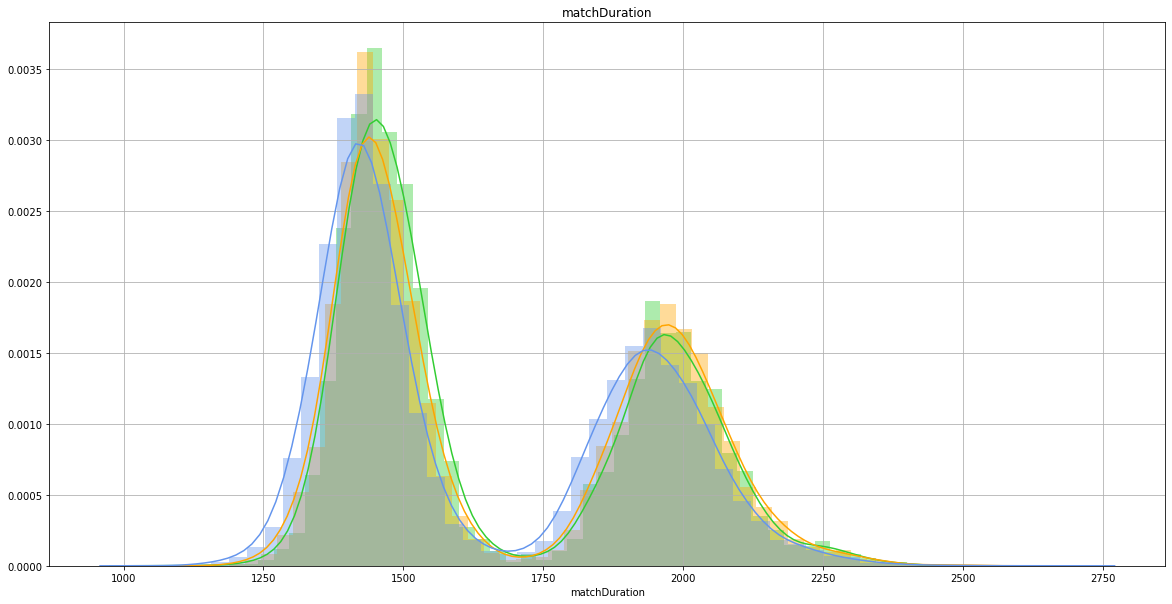

In [2]:
# 比赛时长matchDuration的分布情况
plt.figure(figsize=(20,10))
sns.distplot(data1['matchDuration'],color='limegreen')
sns.distplot(data2['matchDuration'],color='orange')
sns.distplot(data3['matchDuration'],color='cornflowerblue')
plt.title('matchDuration')
plt.grid()
plt.show()

In [3]:
# 由于赛局时长不是玩家个人可控因素，故而删去赛局时长
data1 = data1.drop(columns=['matchDuration'])
data2 = data2.drop(columns=['matchDuration'])
data3 = data3.drop(columns=['matchDuration'])

### 2、变量相关性

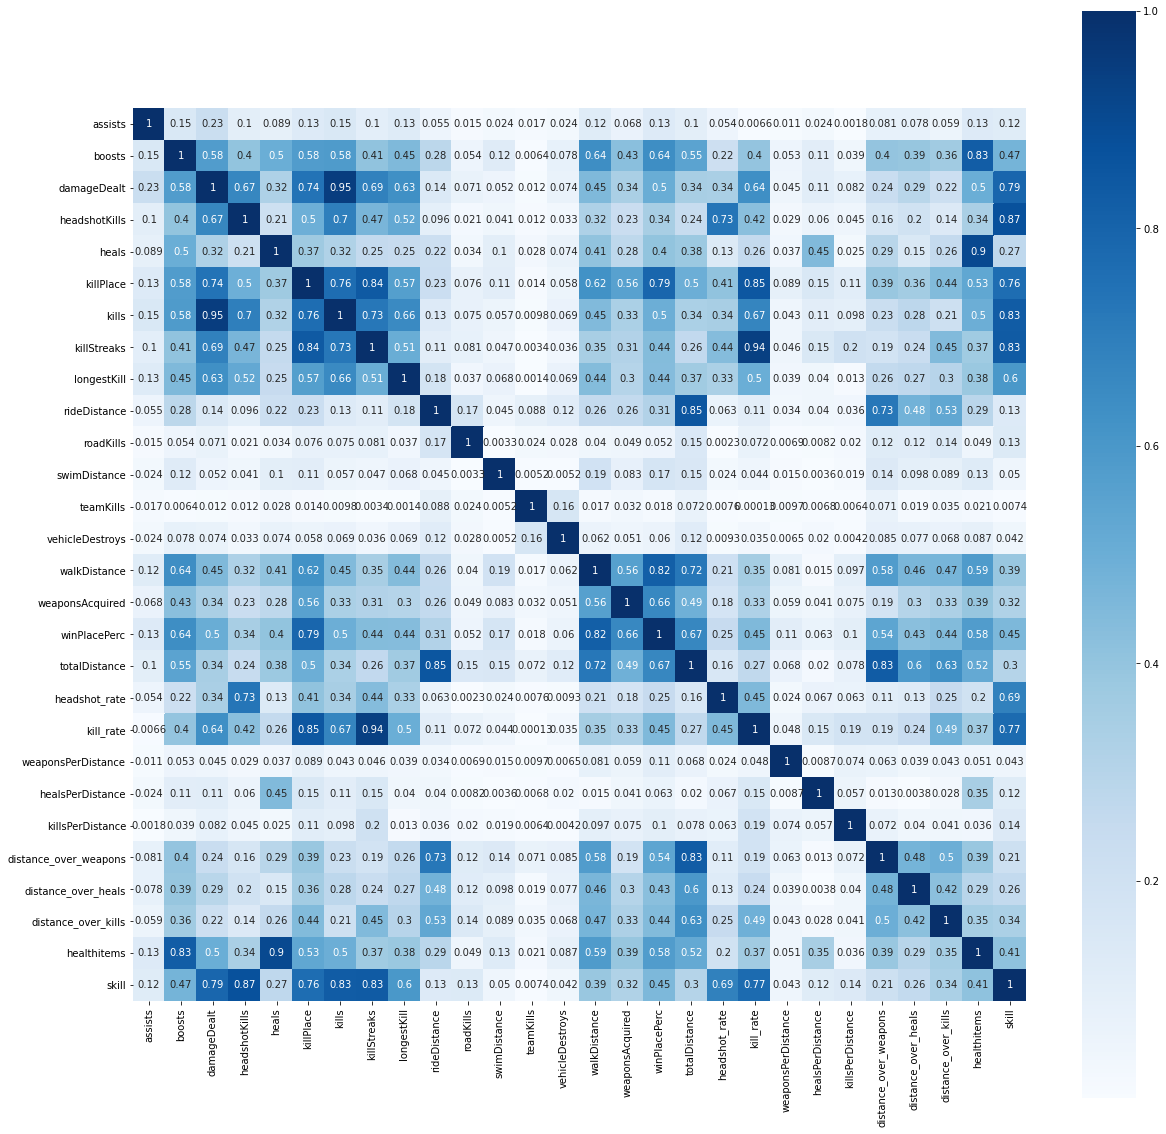

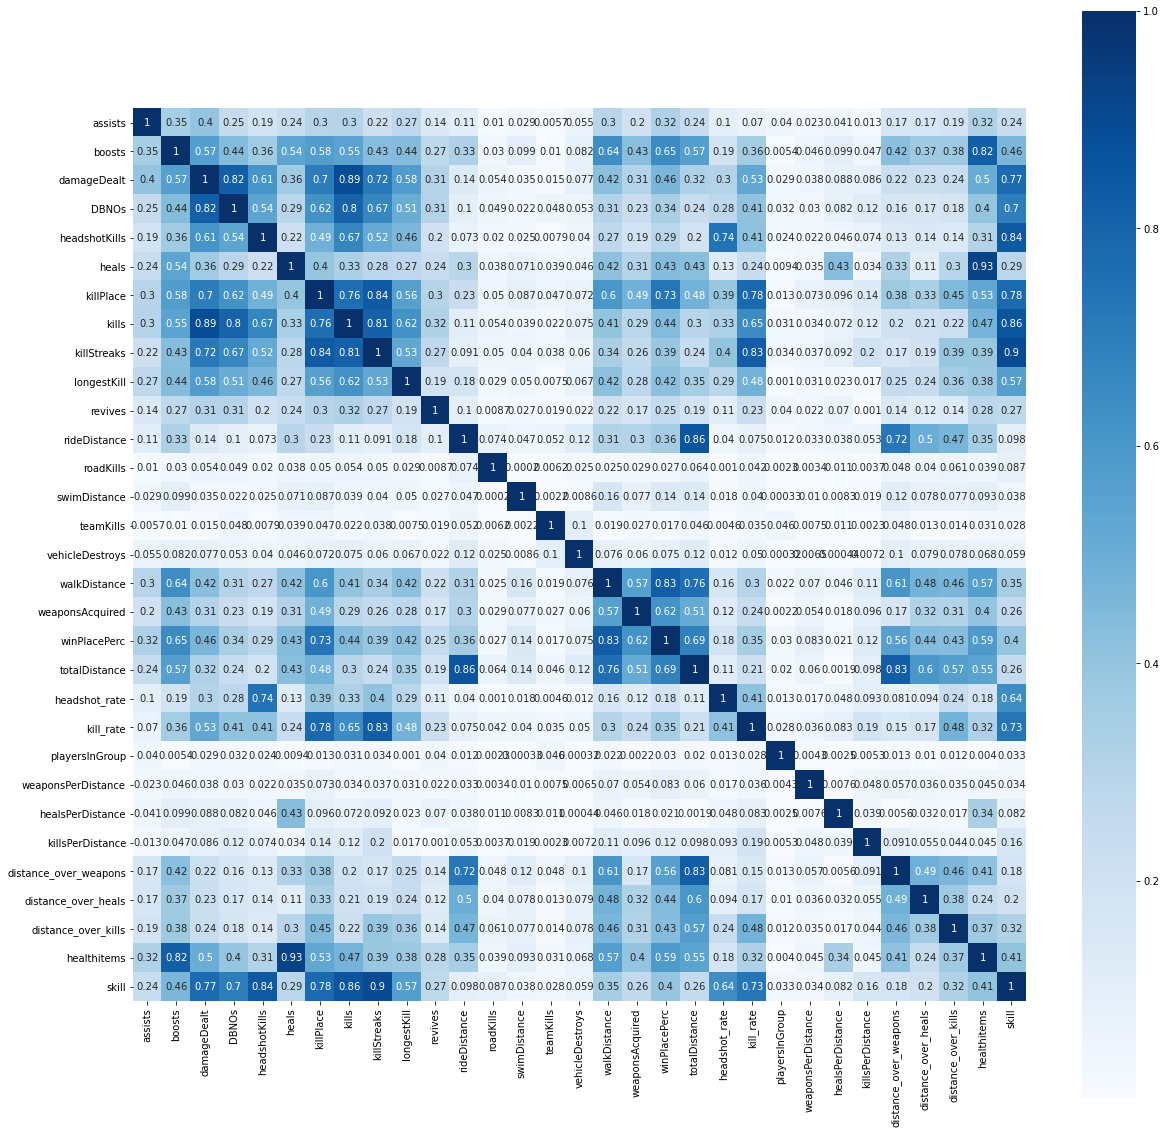

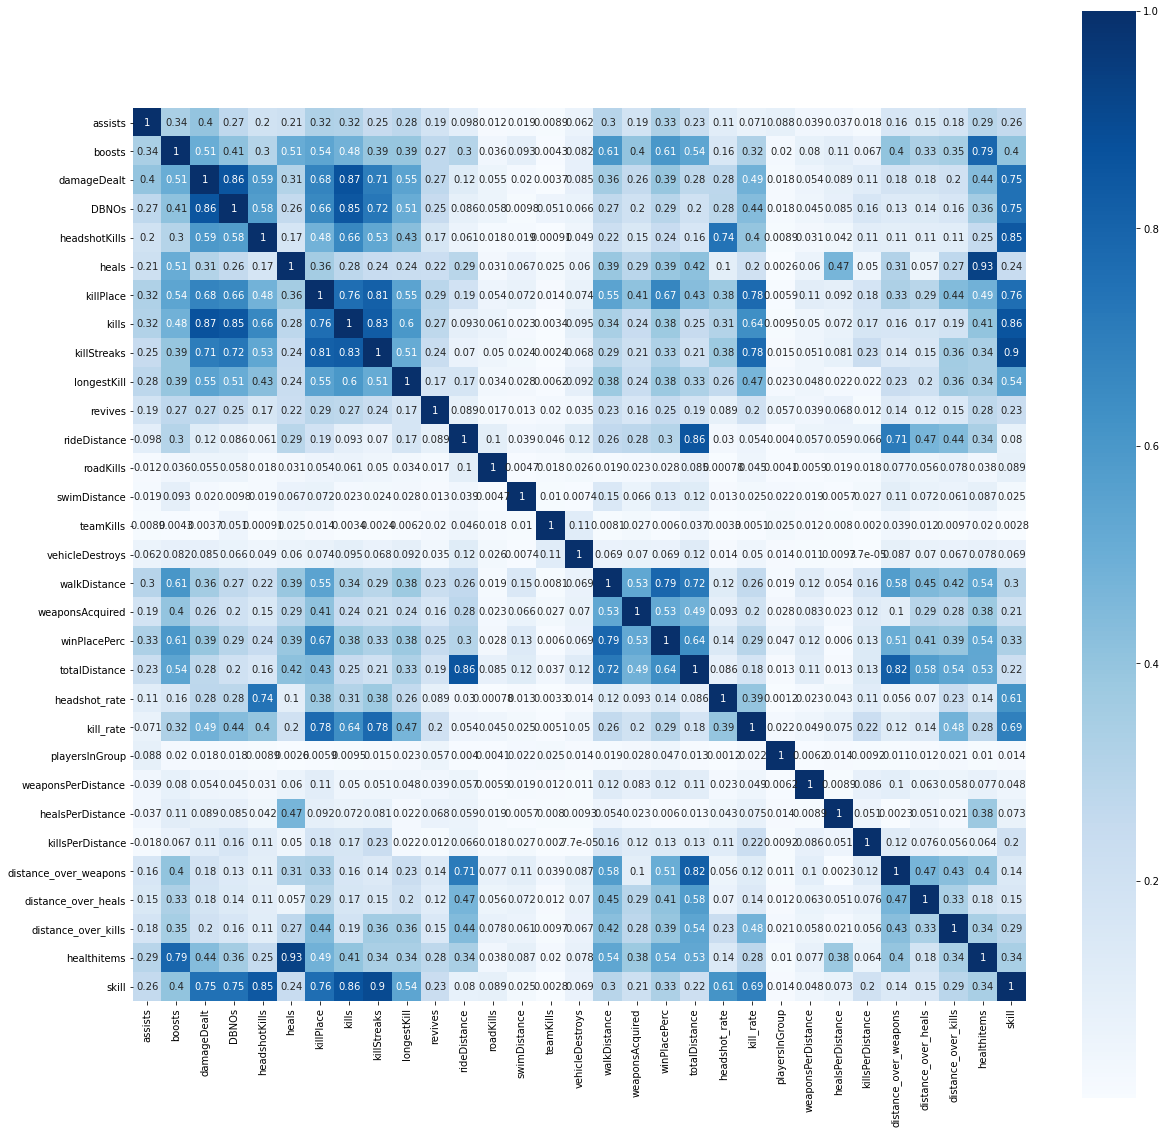

In [4]:
# 绘制变量相关性热力图
def corr_heat(df):
    dfData = abs(df.corr())
    plt.subplots(figsize=(20, 20)) # 设置画面大小
    sns.heatmap(dfData, annot=True, vmax=1, square=True, cmap="Blues")
    plt.show()
corr_heat(data1)
corr_heat(data2)
corr_heat(data3)

### 3、各变量的基础统计描述及其与目标列winPlacePerc之间的关系探究
<p>射击技术：headshotKills、longestKill、killStreaks、headshot_rate、kill_rate
<p>输出水平：DBNOs、kills、killPlace、assists、damageDealt、roadKills、killsPerDistance、distance_over_kills
<p>团队配合：revives、teamKills、playersInGroup
<p>物资：healthitems、heals、boosts、weaponsAcquired、weaponsPerDistance、healsPerDistance、distance_over_weapons、distance_over_heals
<p>移动距离：rideDistance、swimDistance、walkDistance、totalDistance
<p>载具损毁：vehicleDestroys
<p>技巧输出水平：skill
<p>预测目标：winPlacePerc

#### (1)射击技术
#### headshotKills
- 与winPlacePerc的散点图和回归拟合

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


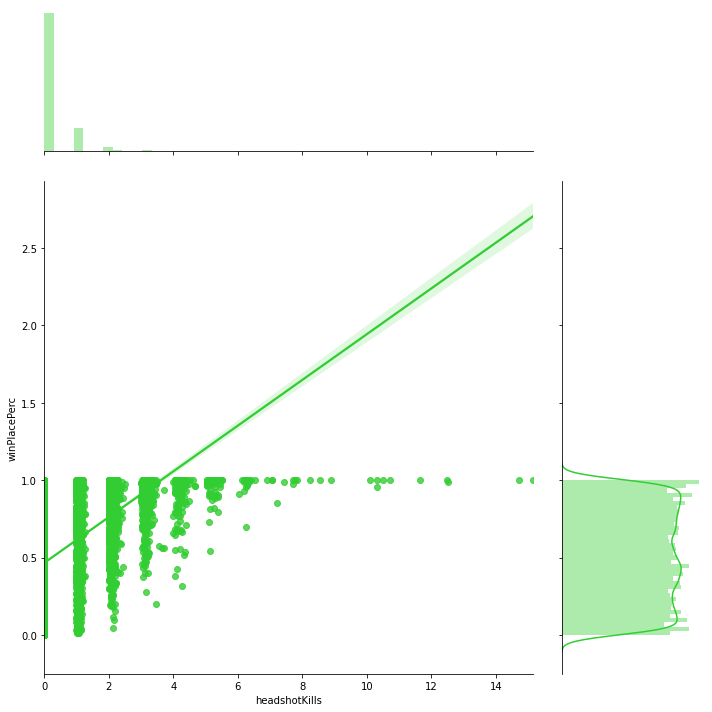

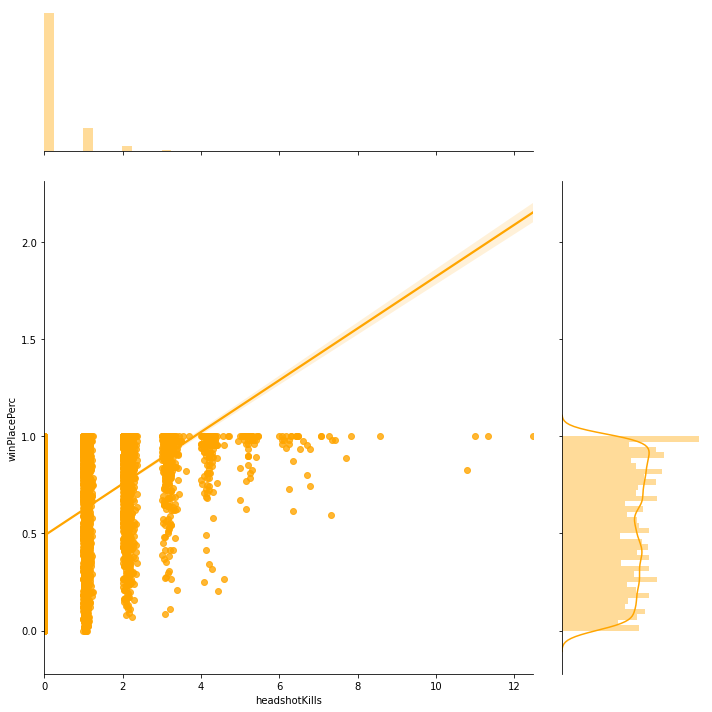

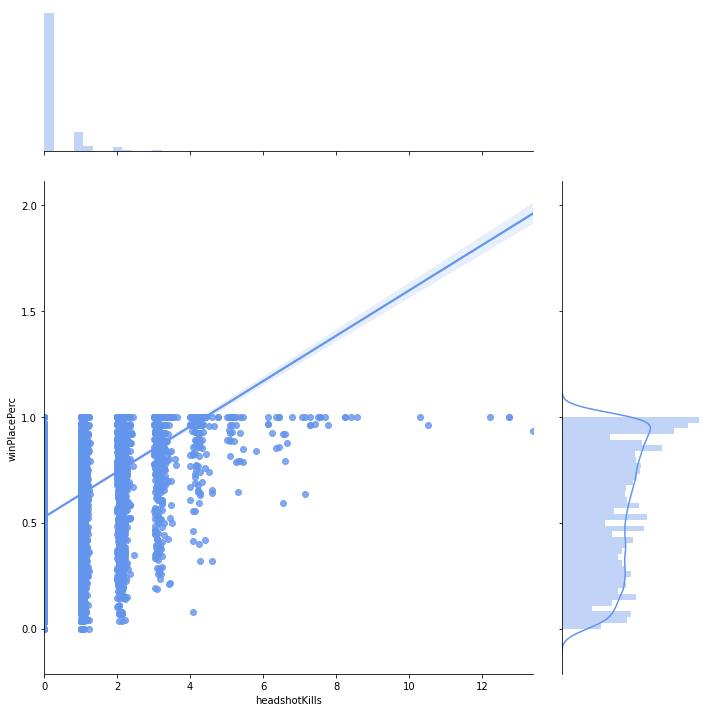

In [5]:
# headshotKills与winPlacePerc之间的关系
sns.jointplot(x="headshotKills", y="winPlacePerc", data=data1, height=10, ratio=3, color="limegreen",kind='reg')
sns.jointplot(x="headshotKills", y="winPlacePerc", data=data2, height=10, ratio=3, color="orange",kind='reg')
sns.jointplot(x="headshotKills", y="winPlacePerc", data=data3, height=10, ratio=3, color="cornflowerblue",kind='reg')
plt.show()

- 单排、双排、四排headshotKills的不同水平与winPlacePerc的关系对比

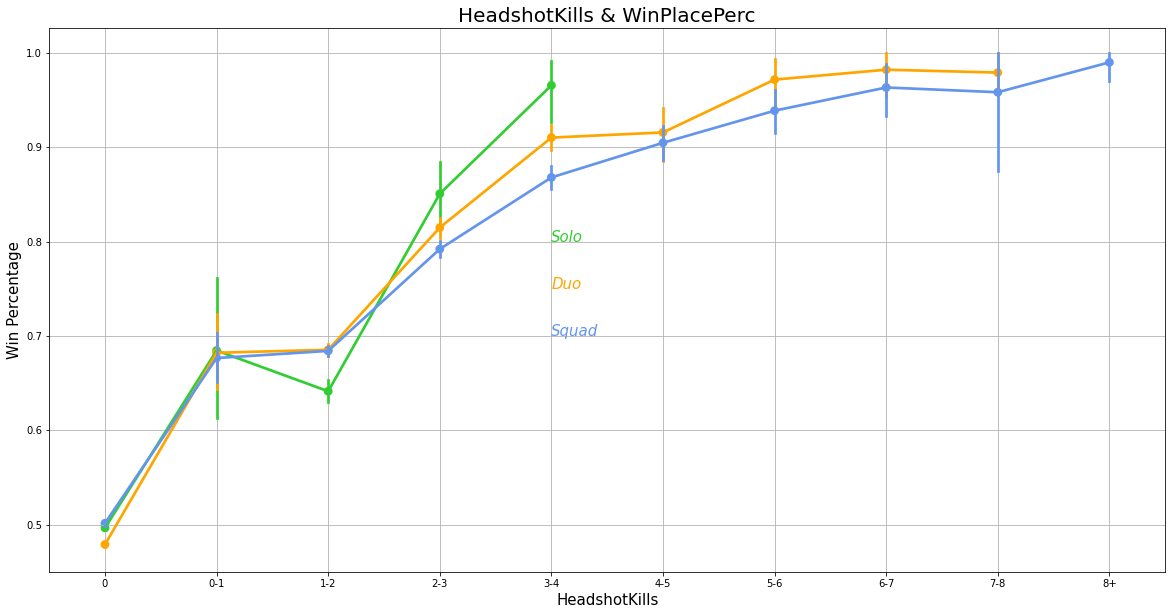

In [6]:
data_cut1['headshotKills_cut'] = pd.cut(data_cut1['assists'], [-1,0,1,2,3,4,5,6,7,8,30], labels=["0","0-1","1-2","2-3","3-4","4-5","5-6","6-7","7-8","8+"])
data_cut2['headshotKills_cut'] = pd.cut(data_cut2['assists'], [-1,0,1,2,3,4,5,6,7,8,30], labels=["0","0-1","1-2","2-3","3-4","4-5","5-6","6-7","7-8","8+"])
data_cut3['headshotKills_cut'] = pd.cut(data_cut3['assists'], [-1,0,1,2,3,4,5,6,7,8,30], labels=["0","0-1","1-2","2-3","3-4","4-5","5-6","6-7","7-8","8+"])
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='headshotKills_cut',y='winPlacePerc',data=data_cut1,color='limegreen',alpha=0.8)
sns.pointplot(x='headshotKills_cut',y='winPlacePerc',data=data_cut2,color='orange',alpha=0.8)
sns.pointplot(x='headshotKills_cut',y='winPlacePerc',data=data_cut3,color='cornflowerblue',alpha=0.8)
plt.text(4,0.8,'Solo',color='limegreen',fontsize = 15,style = 'italic')
plt.text(4,0.75,'Duo',color='orange',fontsize = 15,style = 'italic')
plt.text(4,0.7,'Squad',color='cornflowerblue',fontsize = 15,style = 'italic')
plt.xlabel('HeadshotKills',fontsize = 15,color='black')
plt.ylabel('Win Percentage',fontsize = 15,color='black')
plt.title('HeadshotKills & WinPlacePerc',fontsize = 20,color='black')
plt.grid()
plt.show()

- 单排、双排、四排有无爆头击杀的占比

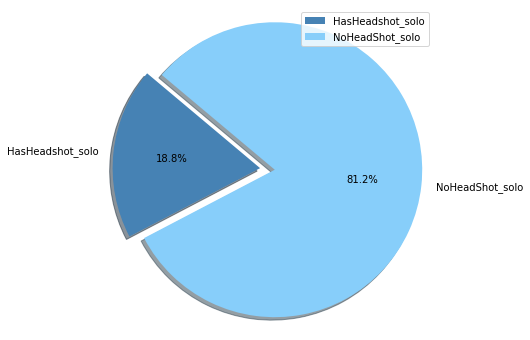

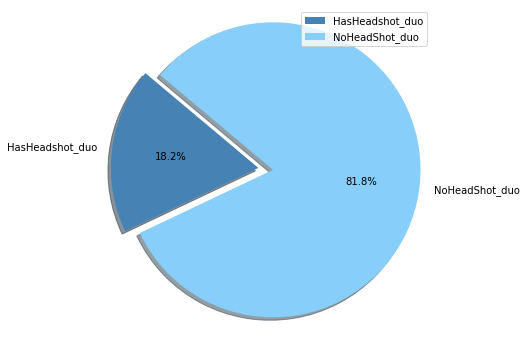

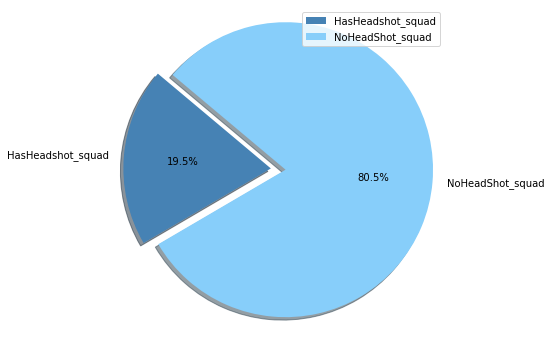

In [7]:
# 单排
HasHeadshot1=data1.headshotKills[data1.headshotKills>0].count()
NoHeadShot1=data1.headshotKills[data1.headshotKills == 0].count()
num1=data1.headshotKills.count()

labels = 'HasHeadshot_solo', 'NoHeadShot_solo'
sizes = [HasHeadshot1/num1, NoHeadShot1/num1]
colors = ['steelblue', 'lightskyblue']
explode = (0.1, 0)

plt.figure(figsize=(6,6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.legend()
plt.show()

# 双排
HasHeadshot2=data2.headshotKills[data2.headshotKills>0].count()
NoHeadShot2=data2.headshotKills[data2.headshotKills == 0].count()
num2=data2.headshotKills.count()

labels = 'HasHeadshot_duo', 'NoHeadShot_duo'
sizes = [HasHeadshot2/num2, NoHeadShot2/num2]
colors = ['steelblue', 'lightskyblue']
explode = (0.1, 0)

plt.figure(figsize=(6,6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.legend()
plt.show()

# 四排
HasHeadshot3=data3.headshotKills[data3.headshotKills>0].count()
NoHeadShot3=data3.headshotKills[data3.headshotKills == 0].count()
num3=data3.headshotKills.count()

labels = 'HasHeadshot_squad', 'NoHeadShot_squad'
sizes = [HasHeadshot3/num3, NoHeadShot3/num3]
colors = ['steelblue', 'lightskyblue']
explode = (0.1, 0)

plt.figure(figsize=(6,6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.legend()
plt.show()

- 单排、双排、四排有无爆头击杀与吃鸡情况对比

In [8]:
HasHeadshot1 = data1[data1['headshotKills'] > 0].copy()
print("单排中有爆头击杀的玩家中有{} 个玩家 ({:.4f}%) 最终成功吃鸡".format(len(HasHeadshot1[HasHeadshot1['winPlacePerc']==1]), 100*len(HasHeadshot1[HasHeadshot1['winPlacePerc']==1])/len(HasHeadshot1)))
NoHeadshot1 = data1[data1['headshotKills'] == 0].copy()
print("单排中没有爆头击杀的玩家中有{} 个玩家 ({:.4f}%) 最终成功吃鸡".format(len(NoHeadshot1[NoHeadshot1['winPlacePerc']==1]), 100*len(NoHeadshot1[NoHeadshot1['winPlacePerc']==1])/len(NoHeadshot1)))
print('\n')

HasHeadshot2 = data2[data2['headshotKills'] > 0].copy()
print("双排中有爆头击杀的玩家中有{} 个玩家 ({:.4f}%) 最终成功吃鸡".format(len(HasHeadshot2[HasHeadshot2['winPlacePerc']==1]), 100*len(HasHeadshot2[HasHeadshot2['winPlacePerc']==1])/len(HasHeadshot2)))
NoHeadshot2 = data2[data2['headshotKills'] == 0].copy()
print("双排中没有爆头击杀的玩家中有{} 个玩家 ({:.4f}%) 最终成功吃鸡".format(len(NoHeadshot2[NoHeadshot2['winPlacePerc']==1]), 100*len(NoHeadshot2[NoHeadshot2['winPlacePerc']==1])/len(NoHeadshot2)))
print('\n')

HasHeadshot3 = data3[data3['headshotKills'] > 0].copy()
print("四排中有爆头击杀的玩家中有{} 个玩家 ({:.4f}%) 最终成功吃鸡".format(len(HasHeadshot3[HasHeadshot3['winPlacePerc']==1]), 100*len(HasHeadshot3[HasHeadshot3['winPlacePerc']==1])/len(HasHeadshot3)))
NoHeadshot3 = data3[data3['headshotKills'] == 0].copy()
print("四排中没有爆头击杀的玩家中有{} 个玩家 ({:.4f}%) 最终成功吃鸡".format(len(NoHeadshot3[NoHeadshot3['winPlacePerc']==1]), 100*len(NoHeadshot3[NoHeadshot3['winPlacePerc']==1])/len(NoHeadshot3)))

单排中有爆头击杀的玩家中有433 个玩家 (4.6108%) 最终成功吃鸡
单排中没有爆头击杀的玩家中有109 个玩家 (0.2684%) 最终成功吃鸡


双排中有爆头击杀的玩家中有725 个玩家 (7.9846%) 最终成功吃鸡
双排中没有爆头击杀的玩家中有492 个玩家 (1.2023%) 最终成功吃鸡


四排中有爆头击杀的玩家中有1270 个玩家 (12.9976%) 最终成功吃鸡
四排中没有爆头击杀的玩家中有1369 个玩家 (3.4030%) 最终成功吃鸡


#### headshot_rate
- 与winPlacePerc的散点图和回归拟合

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


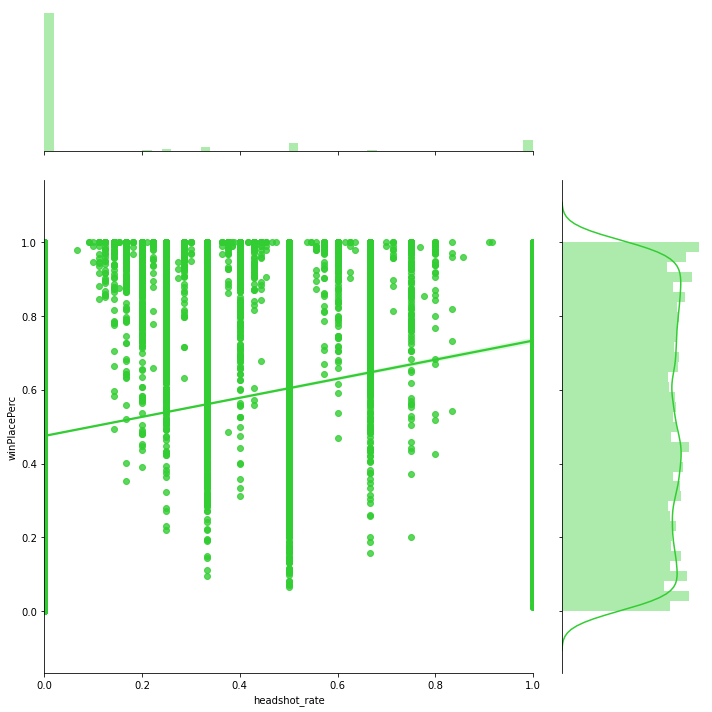

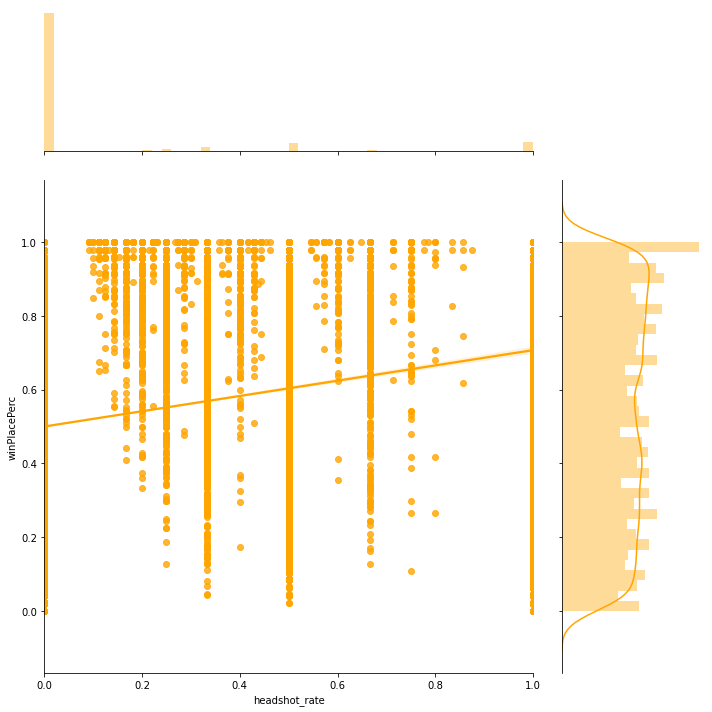

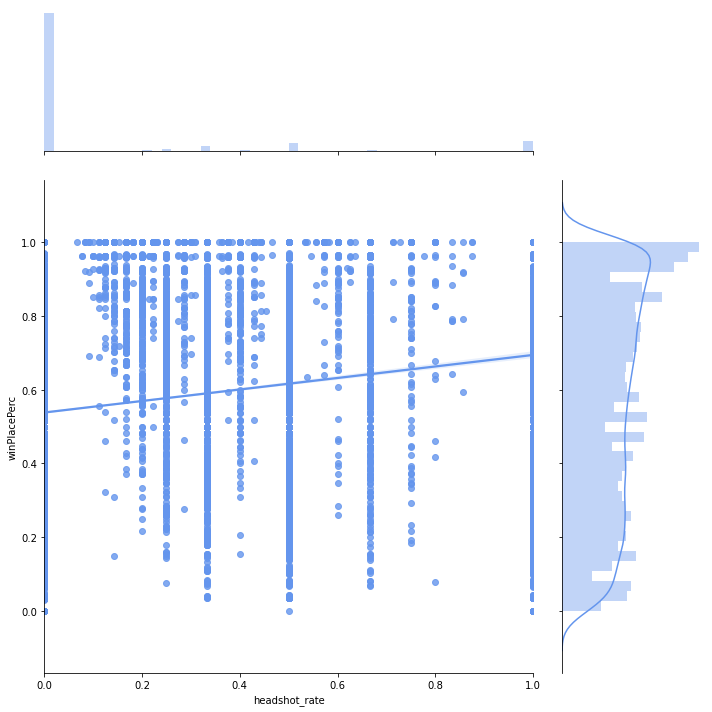

In [9]:
# headshot_rate与winPlacePerc之间的关系
sns.jointplot(x="headshot_rate", y="winPlacePerc", data=data1, height=10, ratio=3, color="limegreen",kind='reg')
sns.jointplot(x="headshot_rate", y="winPlacePerc", data=data2, height=10, ratio=3, color="orange",kind='reg')
sns.jointplot(x="headshot_rate", y="winPlacePerc", data=data3, height=10, ratio=3, color="cornflowerblue",kind='reg')
plt.show()

- 单排、双排、四排headshot_rate的不同水平与winPlacePerc的关系对比

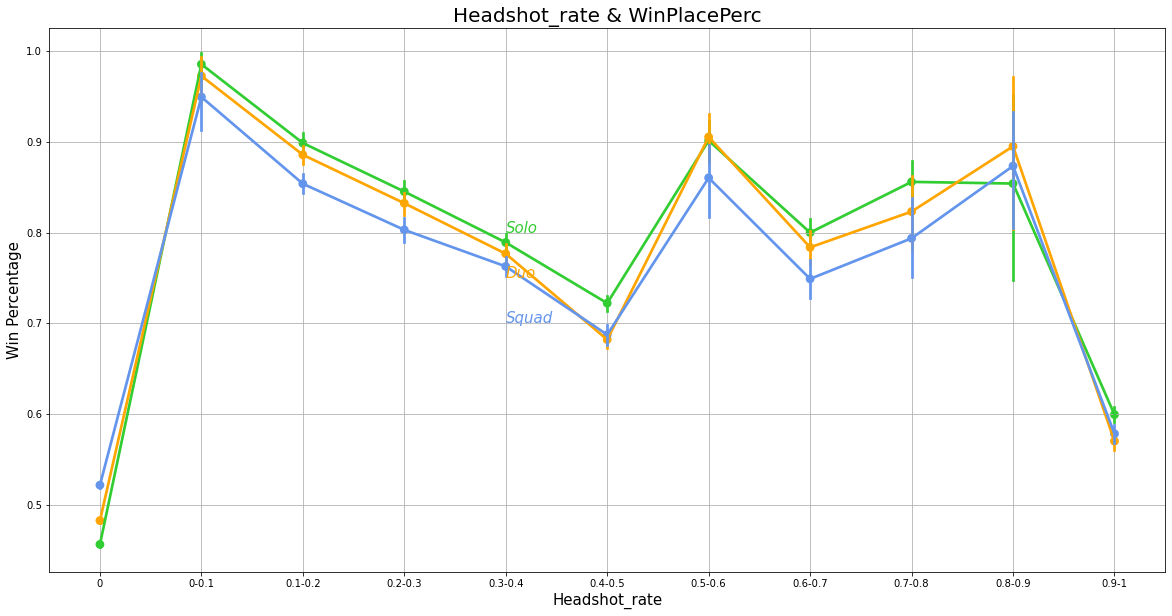

In [10]:
data_cut1['headshot_rate_cut'] = pd.cut(data_cut1['headshot_rate'], [-1,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], labels=['0','0-0.1','0.1-0.2','0.2-0.3', '0.3-0.4','0.4-0.5','0.5-0.6','0.6-0.7', '0.7-0.8','0.8-0.9', '0.9-1'])
data_cut2['headshot_rate_cut'] = pd.cut(data_cut2['headshot_rate'], [-1,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], labels=['0','0-0.1','0.1-0.2','0.2-0.3', '0.3-0.4','0.4-0.5','0.5-0.6','0.6-0.7', '0.7-0.8','0.8-0.9', '0.9-1'])
data_cut3['headshot_rate_cut'] = pd.cut(data_cut3['headshot_rate'], [-1,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], labels=['0','0-0.1','0.1-0.2','0.2-0.3', '0.3-0.4','0.4-0.5','0.5-0.6','0.6-0.7', '0.7-0.8','0.8-0.9', '0.9-1'])
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='headshot_rate_cut',y='winPlacePerc',data=data_cut1,color='limegreen',alpha=0.8)
sns.pointplot(x='headshot_rate_cut',y='winPlacePerc',data=data_cut2,color='orange',alpha=0.8)
sns.pointplot(x='headshot_rate_cut',y='winPlacePerc',data=data_cut3,color='cornflowerblue',alpha=0.8)
plt.text(4,0.8,'Solo',color='limegreen',fontsize = 15,style = 'italic')
plt.text(4,0.75,'Duo',color='orange',fontsize = 15,style = 'italic')
plt.text(4,0.7,'Squad',color='cornflowerblue',fontsize = 15,style = 'italic')
plt.xlabel('Headshot_rate',fontsize = 15,color='black')
plt.ylabel('Win Percentage',fontsize = 15,color='black')
plt.title('Headshot_rate & WinPlacePerc',fontsize = 20,color='black')
plt.grid()
plt.show()

- 单排、双排、四排爆头击杀率高低与吃鸡情况对比

In [11]:
# 以50%作为爆头击杀率水平的分界线
HighHeadshot1 = data1[data1['headshot_rate'] >= 0.5].copy()
print("单排中高爆头击杀率的玩家中有{} 个玩家 ({:.4f}%) 最终成功吃鸡".format(len(HighHeadshot1[HighHeadshot1['winPlacePerc']==1]), 100*len(HighHeadshot1[HighHeadshot1['winPlacePerc']==1])/len(HighHeadshot1)))
LowHeadshot1 = data1[data1['headshot_rate'] < 0.5].copy()
print("单排中低爆头击杀率的玩家中有{} 个玩家 ({:.4f}%) 最终成功吃鸡".format(len(LowHeadshot1[LowHeadshot1['winPlacePerc']==1]), 100*len(LowHeadshot1[LowHeadshot1['winPlacePerc']==1])/len(LowHeadshot1)))
print('\n')

HighHeadshot2 = data2[data2['headshot_rate'] >= 0.5].copy()
print("双排中高爆头击杀率的玩家中有{} 个玩家 ({:.4f}%) 最终成功吃鸡".format(len(HighHeadshot2[HighHeadshot2['winPlacePerc']==1]), 100*len(HighHeadshot2[HighHeadshot2['winPlacePerc']==1])/len(HighHeadshot2)))
LowHeadshot2 = data2[data2['headshot_rate'] < 0.5].copy()
print("双排中低爆头击杀率的玩家中有{} 个玩家 ({:.4f}%) 最终成功吃鸡".format(len(LowHeadshot2[LowHeadshot2['winPlacePerc']==1]), 100*len(LowHeadshot2[LowHeadshot2['winPlacePerc']==1])/len(LowHeadshot2)))
print('\n')

HighHeadshot3 = data3[data3['headshot_rate'] >= 0.5].copy()
print("四排中高爆头击杀率的玩家中有{} 个玩家 ({:.4f}%) 最终成功吃鸡".format(len(HighHeadshot3[HighHeadshot3['winPlacePerc']==1]), 100*len(HighHeadshot3[HighHeadshot3['winPlacePerc']==1])/len(HighHeadshot3)))
LowHeadshot3 = data3[data3['headshot_rate'] < 0.5].copy()
print("四排中低爆头击杀率的玩家中有{} 个玩家 ({:.4f}%) 最终成功吃鸡".format(len(LowHeadshot3[LowHeadshot3['winPlacePerc']==1]), 100*len(LowHeadshot3[LowHeadshot3['winPlacePerc']==1])/len(LowHeadshot3)))

单排中高爆头击杀率的玩家中有135 个玩家 (2.0548%) 最终成功吃鸡
单排中低爆头击杀率的玩家中有407 个玩家 (0.9371%) 最终成功吃鸡


双排中高爆头击杀率的玩家中有258 个玩家 (4.3289%) 最终成功吃鸡
双排中低爆头击杀率的玩家中有959 个玩家 (2.1776%) 最终成功吃鸡


四排中高爆头击杀率的玩家中有552 个玩家 (8.9133%) 最终成功吃鸡
四排中低爆头击杀率的玩家中有2087 个玩家 (4.7641%) 最终成功吃鸡


#### longestKill
- 与winPlacePerc的散点图和回归拟合

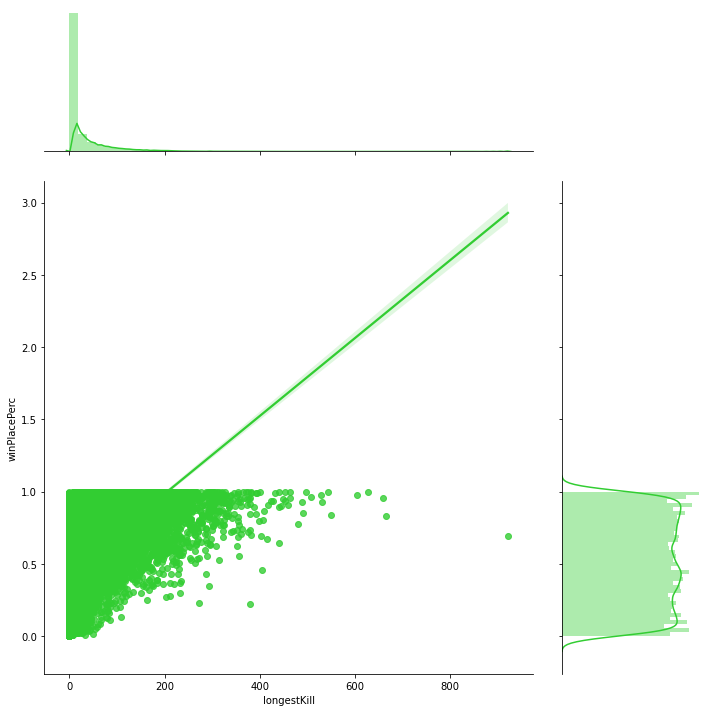

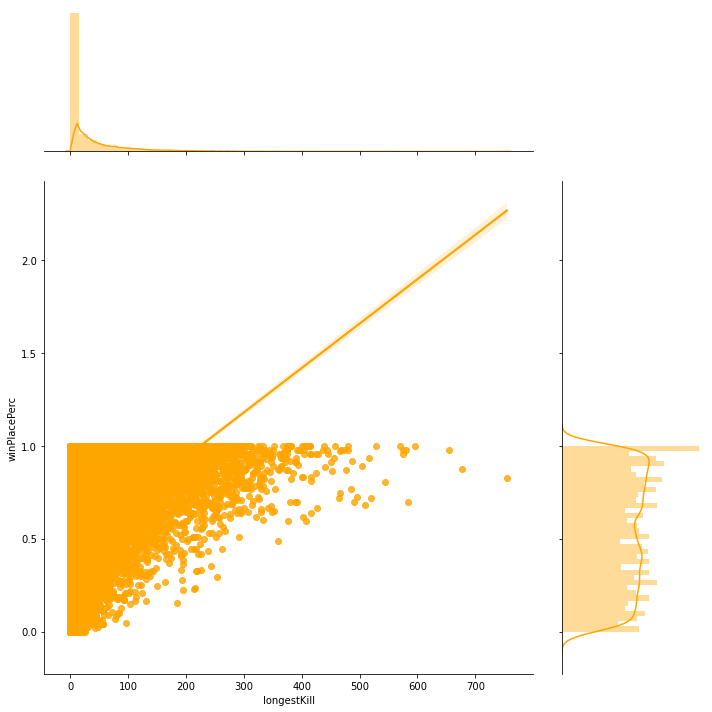

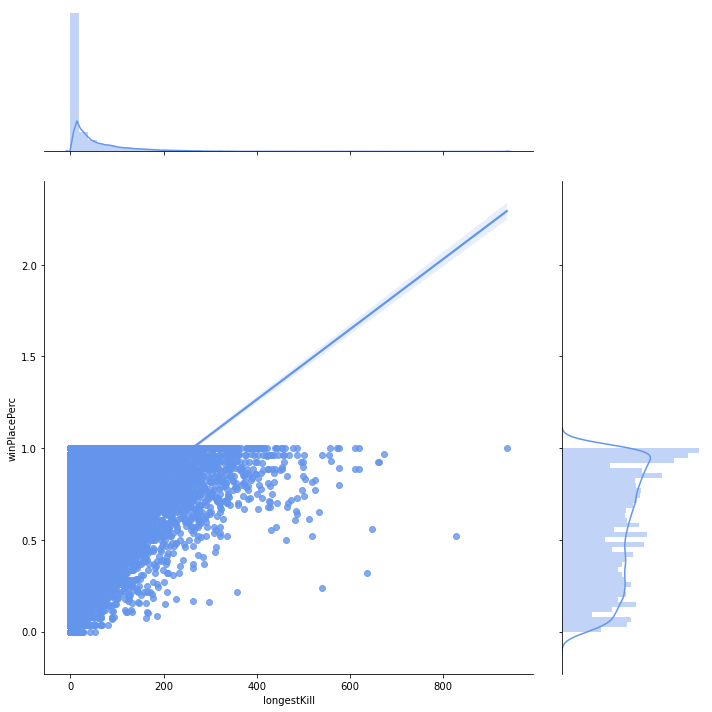

In [12]:
# longestKill与winPlacePerc之间的关系
sns.jointplot(x="longestKill", y="winPlacePerc", data=data1, height=10, ratio=3, color="limegreen",kind='reg')
sns.jointplot(x="longestKill", y="winPlacePerc", data=data2, height=10, ratio=3, color="orange",kind='reg')
sns.jointplot(x="longestKill", y="winPlacePerc", data=data3, height=10, ratio=3, color="cornflowerblue",kind='reg')
plt.show()

- 单排、双排、四排最长击杀距离的不同水平与winPlacePerc的关系对比

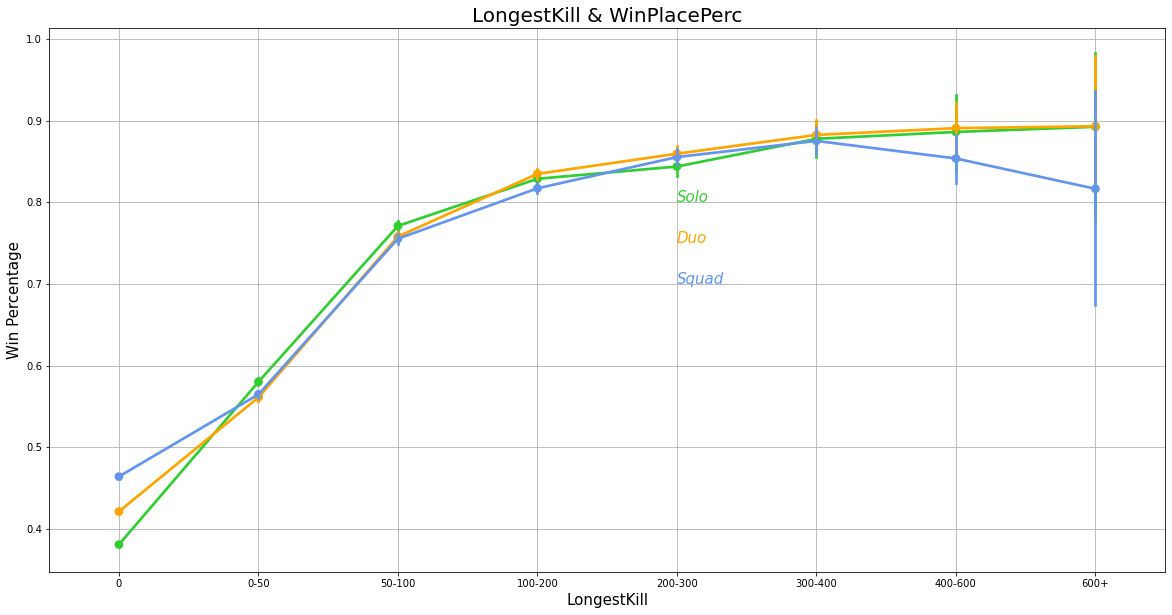

In [13]:
data_cut1['longestKill_cut'] = pd.cut(data_cut1['longestKill'], [-1,0,50,100,200,300,400,600,1200], labels=["0","0-50","50-100","100-200","200-300","300-400","400-600","600+"])
data_cut2['longestKill_cut'] = pd.cut(data_cut2['longestKill'], [-1,0,50,100,200,300,400,600,1200], labels=["0","0-50","50-100","100-200","200-300","300-400","400-600","600+"])
data_cut3['longestKill_cut'] = pd.cut(data_cut3['longestKill'], [-1,0,50,100,200,300,400,600,1200], labels=["0","0-50","50-100","100-200","200-300","300-400","400-600","600+"])
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='longestKill_cut',y='winPlacePerc',data=data_cut1,color='limegreen',alpha=0.8)
sns.pointplot(x='longestKill_cut',y='winPlacePerc',data=data_cut2,color='orange',alpha=0.8)
sns.pointplot(x='longestKill_cut',y='winPlacePerc',data=data_cut3,color='cornflowerblue',alpha=0.8)
plt.text(4,0.8,'Solo',color='limegreen',fontsize = 15,style = 'italic')
plt.text(4,0.75,'Duo',color='orange',fontsize = 15,style = 'italic')
plt.text(4,0.7,'Squad',color='cornflowerblue',fontsize = 15,style = 'italic')
plt.xlabel('LongestKill',fontsize = 15,color='black')
plt.ylabel('Win Percentage',fontsize = 15,color='black')
plt.title('LongestKill & WinPlacePerc',fontsize = 20,color='black')
plt.grid()
plt.show()

- 单排、双排、四排最长击杀距离对比

In [14]:
Has1 = data1[data1['longestKill'] >0].copy()
Has1['longestKill'].describe()

count    23073.000000
mean        48.668026
std         59.365686
min          0.245100
25%         10.120000
50%         26.240000
75%         64.570000
max        921.400000
Name: longestKill, dtype: float64

In [15]:
Has2 = data2[data2['longestKill'] >0].copy()
Has2['longestKill'].describe()

count    22480.000000
mean        54.932244
std         64.705536
min          0.260100
25%         12.370000
50%         30.745000
75%         73.437500
max        754.500000
Name: longestKill, dtype: float64

In [16]:
Has3 = data3[data3['longestKill'] >0].copy()
Has3['longestKill'].describe()

count    24196.000000
mean        61.361485
std         72.005470
min          0.077700
25%         13.210000
50%         34.090000
75%         83.602500
max        937.100000
Name: longestKill, dtype: float64

#### killStreaks
- 与winPlacePerc的散点图和回归拟合

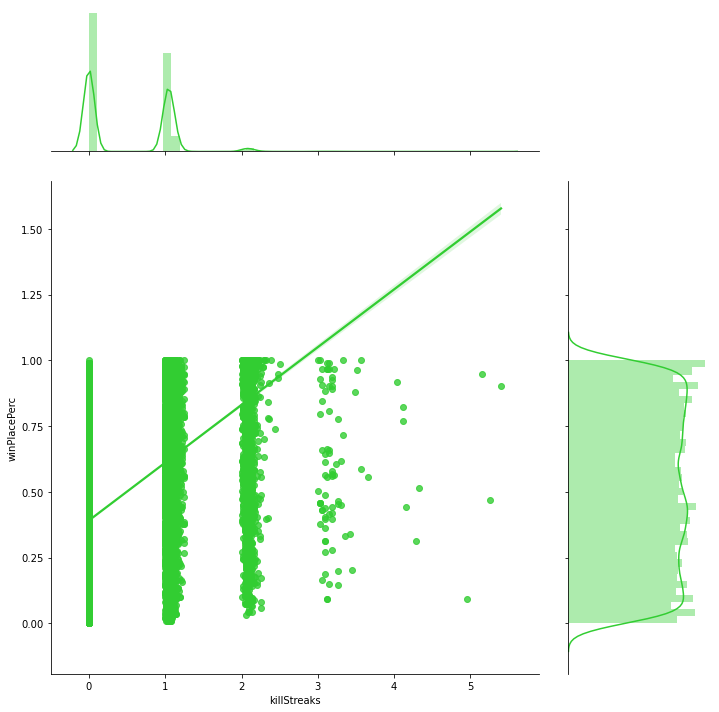

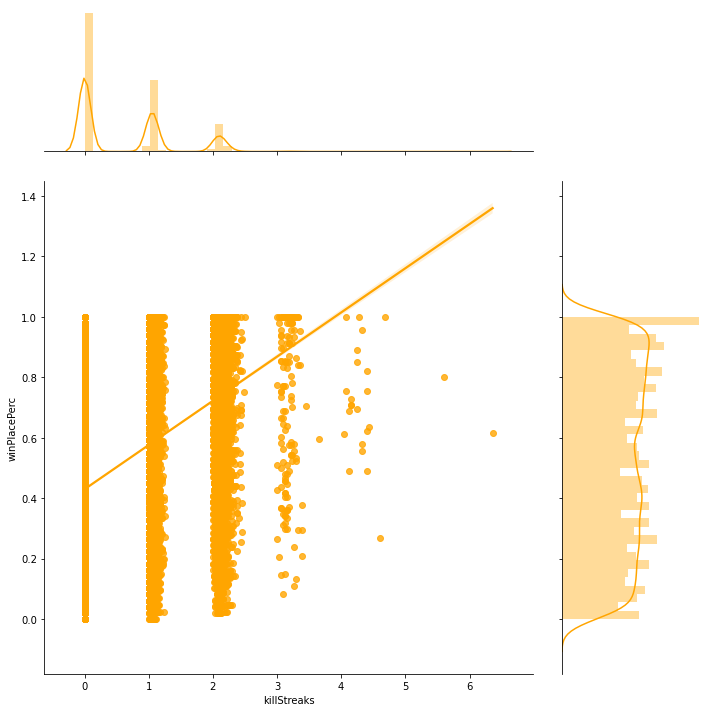

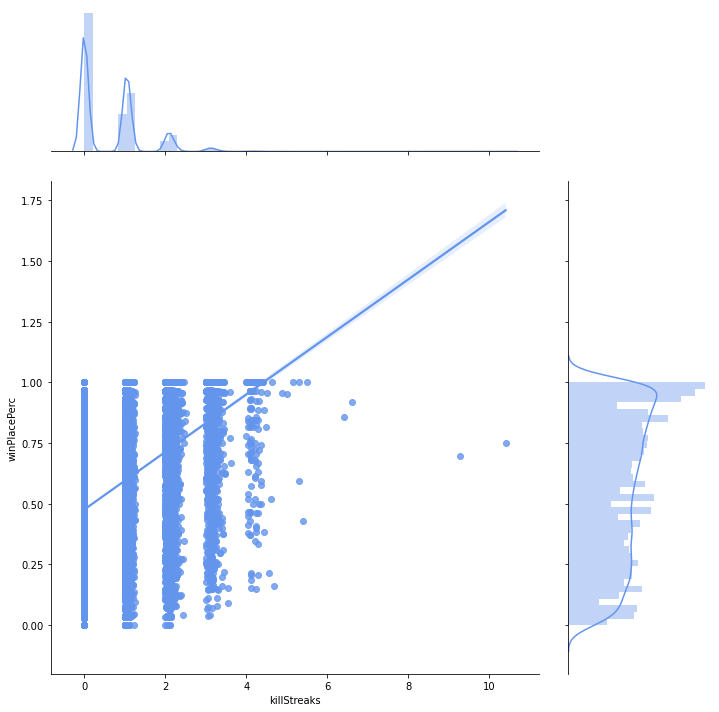

In [17]:
# killStreaks与winPlacePerc之间的关系
sns.jointplot(x="killStreaks", y="winPlacePerc", data=data1, height=10, ratio=3, color="limegreen",kind='reg')
sns.jointplot(x="killStreaks", y="winPlacePerc", data=data2, height=10, ratio=3, color="orange",kind='reg')
sns.jointplot(x="killStreaks", y="winPlacePerc", data=data3, height=10, ratio=3, color="cornflowerblue",kind='reg')
plt.show()

- 单排、双排、四排连杀的不同水平与winPlacePerc的关系对比

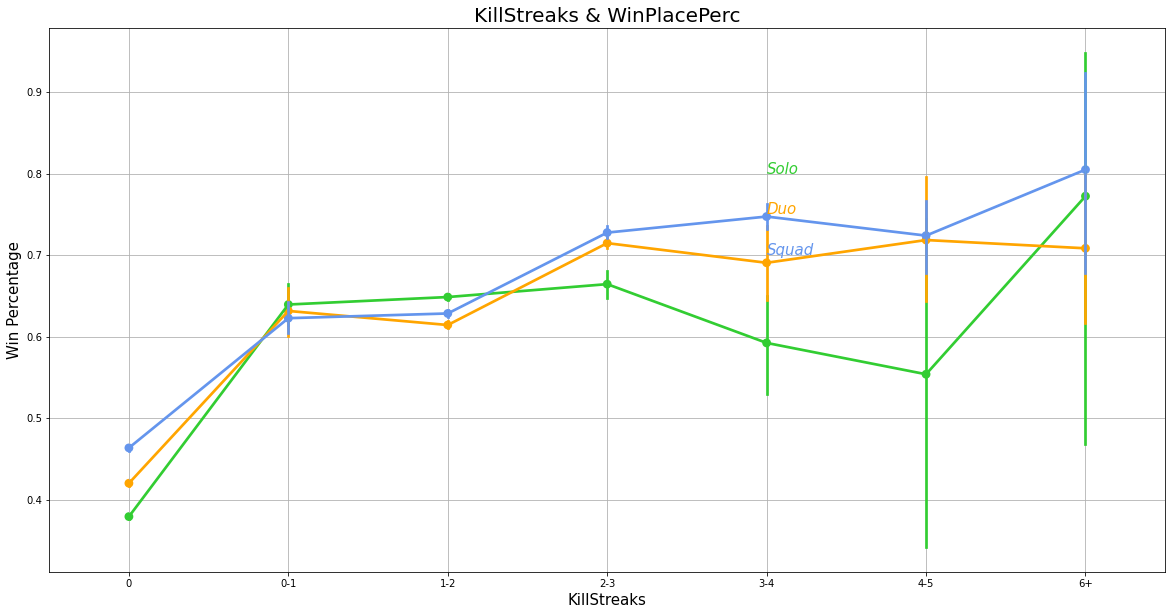

In [18]:
data_cut1['killStreaks_cut'] = pd.cut(data_cut1['killStreaks'], [-1,0,1,2,3,4,5,20], labels=['0','0-1','1-2','2-3','3-4','4-5','6+'])
data_cut2['killStreaks_cut'] = pd.cut(data_cut2['killStreaks'], [-1,0,1,2,3,4,5,20], labels=['0','0-1','1-2','2-3','3-4','4-5','6+'])
data_cut3['killStreaks_cut'] = pd.cut(data_cut3['killStreaks'], [-1,0,1,2,3,4,5,20], labels=['0','0-1','1-2','2-3','3-4','4-5','6+'])
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='killStreaks_cut',y='winPlacePerc',data=data_cut1,color='limegreen',alpha=0.8)
sns.pointplot(x='killStreaks_cut',y='winPlacePerc',data=data_cut2,color='orange',alpha=0.8)
sns.pointplot(x='killStreaks_cut',y='winPlacePerc',data=data_cut3,color='cornflowerblue',alpha=0.8)
plt.text(4,0.8,'Solo',color='limegreen',fontsize = 15,style = 'italic')
plt.text(4,0.75,'Duo',color='orange',fontsize = 15,style = 'italic')
plt.text(4,0.7,'Squad',color='cornflowerblue',fontsize = 15,style = 'italic')
plt.xlabel('KillStreaks',fontsize = 15,color='black')
plt.ylabel('Win Percentage',fontsize = 15,color='black')
plt.title('KillStreaks & WinPlacePerc',fontsize = 20,color='black')
plt.grid()
plt.show()

- 单排、双排、四排有无连杀的占比

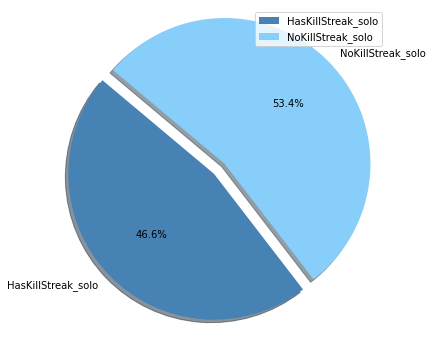

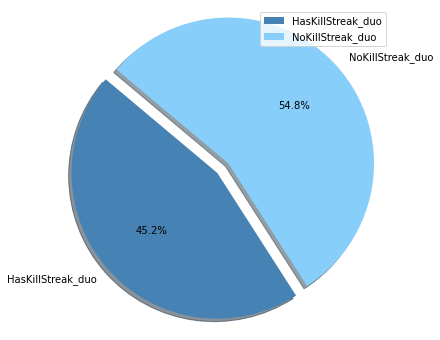

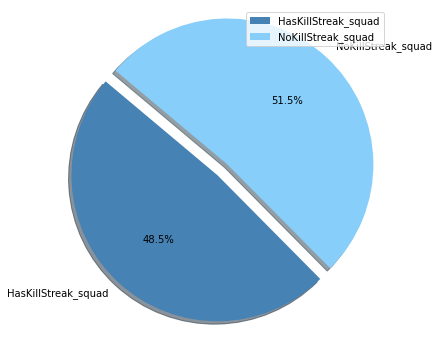

In [19]:
# 单排
HasKillStreak1=data1.killStreaks[data1.killStreaks>0].count()
NoKillStreak1=data1.killStreaks[data1.killStreaks == 0].count()
num1=data1.killStreaks.count()

labels = 'HasKillStreak_solo', 'NoKillStreak_solo'
sizes = [HasKillStreak1/num1, NoKillStreak1/num1]
colors = ['steelblue', 'lightskyblue']
explode = (0.1, 0)

plt.figure(figsize=(6,6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.legend()
plt.show()

# 双排
HasKillStreak2=data2.killStreaks[data2.killStreaks>0].count()
NoKillStreak2=data2.killStreaks[data2.killStreaks == 0].count()
num2=data2.killStreaks.count()

labels = 'HasKillStreak_duo', 'NoKillStreak_duo'
sizes = [HasKillStreak2/num2, NoKillStreak2/num2]
colors = ['steelblue', 'lightskyblue']
explode = (0.1, 0)

plt.figure(figsize=(6,6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.legend()
plt.show()

# 四排
HasKillStreak3=data3.killStreaks[data3.killStreaks>0].count()
NoKillStreak3=data3.killStreaks[data3.killStreaks == 0].count()
num3=data3.killStreaks.count()

labels = 'HasKillStreak_squad', 'NoKillStreak_squad'
sizes = [HasKillStreak3/num3, NoKillStreak3/num3]
colors = ['steelblue', 'lightskyblue']
explode = (0.1, 0)

plt.figure(figsize=(6,6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.legend()
plt.show()

- 单排、双排、四排有无连杀与吃鸡情况对比

In [149]:
HasKillStreaks1 = data1[data1['killStreaks'] > 0].copy()
print("单排中有连杀的玩家中有{} 个玩家 ({:.4f}%) 最终成功吃鸡".format(len(HasKillStreaks1[HasKillStreaks1['winPlacePerc']==1]), 100*len(HasKillStreaks1[HasKillStreaks1['winPlacePerc']==1])/len(HasKillStreaks1)))
NoKillStreaks1 = data1[data1['killStreaks'] == 0].copy()
print("单排中没有连杀的玩家中有{} 个玩家 ({:.4f}%) 最终成功吃鸡".format(len(NoKillStreaks1[NoKillStreaks1['winPlacePerc']==1]), 100*len(NoKillStreaks1[NoKillStreaks1['winPlacePerc']==1])/len(NoKillStreaks1)))
print('\n')

HasKillStreaks2 = data2[data2['killStreaks'] > 0].copy()
print("双排中有连杀的玩家中有{} 个玩家 ({:.4f}%) 最终成功吃鸡".format(len(HasKillStreaks2[HasKillStreaks2['winPlacePerc']==1]), 100*len(HasKillStreaks2[HasKillStreaks2['winPlacePerc']==1])/len(HasKillStreaks2)))
NoKillStreaks2 = data2[data2['killStreaks'] == 0].copy()
print("双排中没有连杀的玩家中有{} 个玩家 ({:.4f}%) 最终成功吃鸡".format(len(NoKillStreaks2[NoKillStreaks2['winPlacePerc']==1]), 100*len(NoKillStreaks2[NoKillStreaks2['winPlacePerc']==1])/len(NoKillStreaks2)))
print('\n')

HasKillStreaks3 = data3[data3['killStreaks'] > 0].copy()
print("四排中有连杀的玩家中有{} 个玩家 ({:.4f}%) 最终成功吃鸡".format(len(HasKillStreaks3[HasKillStreaks3['winPlacePerc']==1]), 100*len(HasKillStreaks3[HasKillStreaks3['winPlacePerc']==1])/len(HasKillStreaks3)))
NoKillStreaks3 = data3[data3['killStreaks'] == 0].copy()
print("四排中没有连杀的玩家中有{} 个玩家 ({:.4f}%) 最终成功吃鸡".format(len(NoKillStreaks3[NoKillStreaks3['winPlacePerc']==1]), 100*len(NoKillStreaks3[NoKillStreaks3['winPlacePerc']==1])/len(NoKillStreaks3)))

单排中有连杀的玩家中有541 个玩家 (2.3243%) 最终成功吃鸡
单排中没有连杀的玩家中有1 个玩家 (0.0037%) 最终成功吃鸡


双排中有连杀的玩家中有1133 个玩家 (5.0137%) 最终成功吃鸡
双排中没有连杀的玩家中有84 个玩家 (0.3065%) 最终成功吃鸡


四排中有连杀的玩家中有2236 个玩家 (9.2134%) 最终成功吃鸡
四排中没有连杀的玩家中有403 个玩家 (1.5662%) 最终成功吃鸡


#### kill_rate
- 与winPlacePerc的散点图和回归拟合

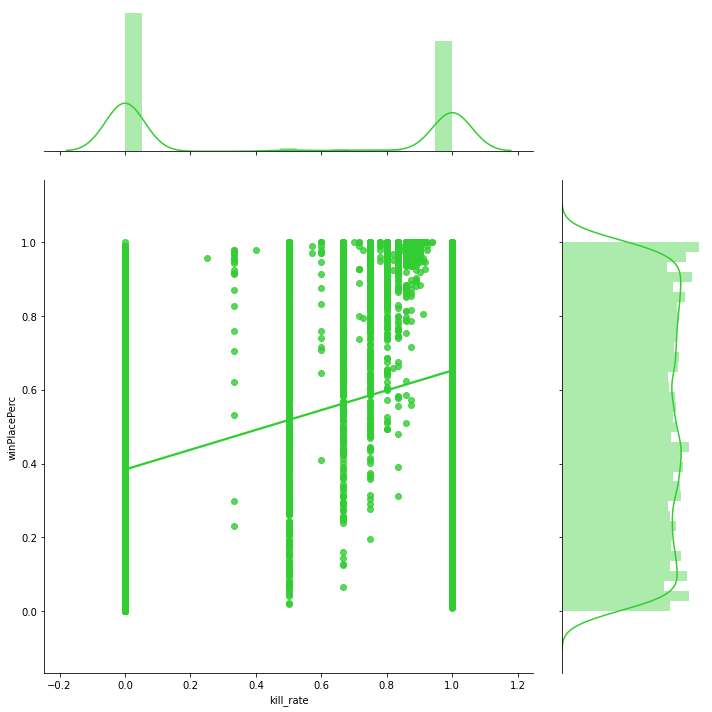

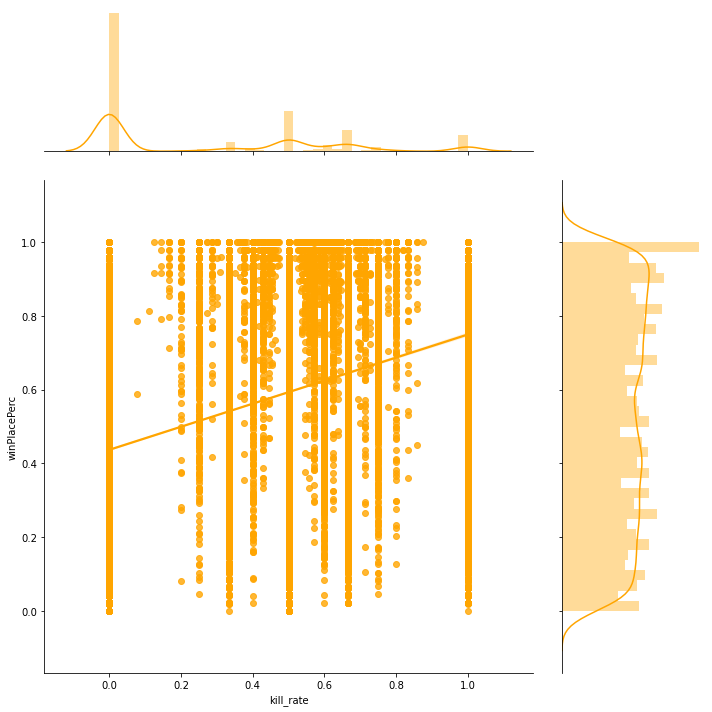

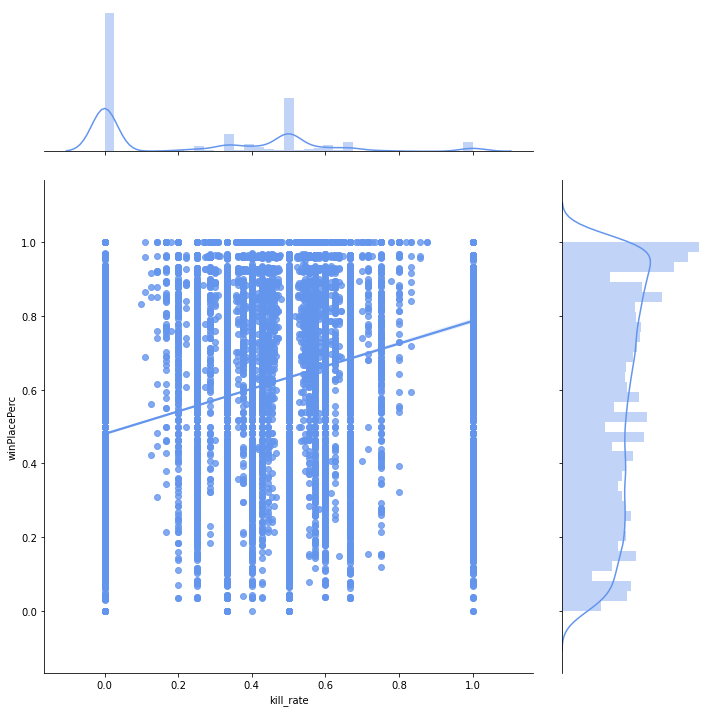

In [21]:
# kill_rate与winPlacePerc之间的关系
sns.jointplot(x="kill_rate", y="winPlacePerc", data=data1, height=10, ratio=3, color="limegreen",kind='reg')
sns.jointplot(x="kill_rate", y="winPlacePerc", data=data2, height=10, ratio=3, color="orange",kind='reg')
sns.jointplot(x="kill_rate", y="winPlacePerc", data=data3, height=10, ratio=3, color="cornflowerblue",kind='reg')
plt.show()

- 单排、双排、四排击杀率的不同水平与winPlacePerc的关系对比

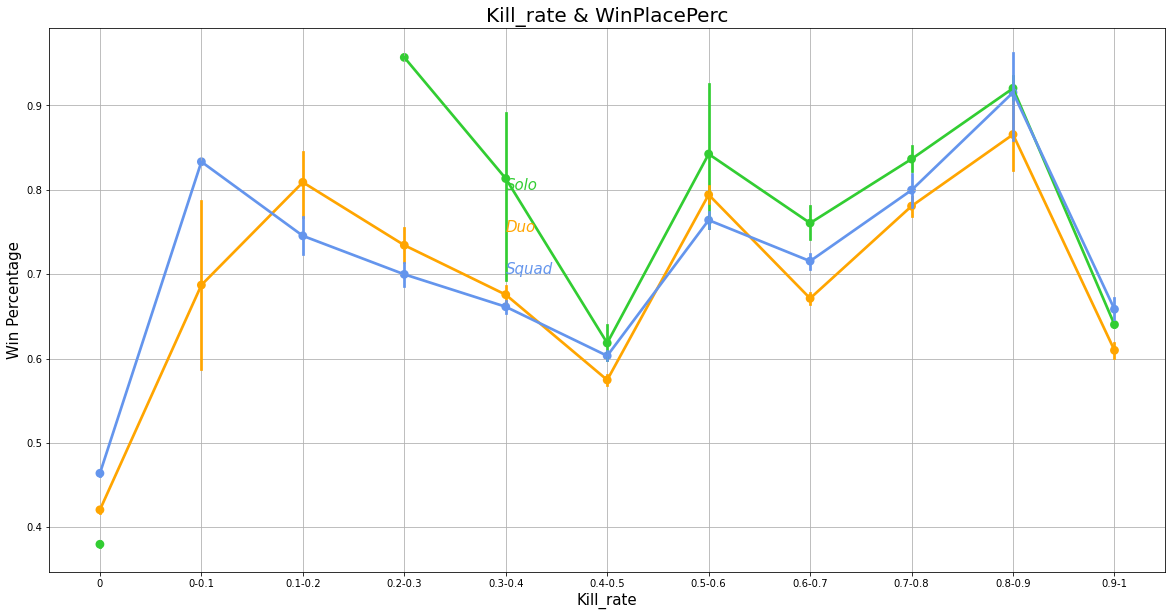

In [22]:
data_cut1['kill_rate_cut'] = pd.cut(data_cut1['kill_rate'], [-1,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], labels=['0','0-0.1','0.1-0.2','0.2-0.3', '0.3-0.4','0.4-0.5','0.5-0.6','0.6-0.7', '0.7-0.8','0.8-0.9', '0.9-1'])
data_cut2['kill_rate_cut'] = pd.cut(data_cut2['kill_rate'], [-1,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], labels=['0','0-0.1','0.1-0.2','0.2-0.3', '0.3-0.4','0.4-0.5','0.5-0.6','0.6-0.7', '0.7-0.8','0.8-0.9', '0.9-1'])
data_cut3['kill_rate_cut'] = pd.cut(data_cut3['kill_rate'], [-1,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], labels=['0','0-0.1','0.1-0.2','0.2-0.3', '0.3-0.4','0.4-0.5','0.5-0.6','0.6-0.7', '0.7-0.8','0.8-0.9', '0.9-1'])
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='kill_rate_cut',y='winPlacePerc',data=data_cut1,color='limegreen',alpha=0.8)
sns.pointplot(x='kill_rate_cut',y='winPlacePerc',data=data_cut2,color='orange',alpha=0.8)
sns.pointplot(x='kill_rate_cut',y='winPlacePerc',data=data_cut3,color='cornflowerblue',alpha=0.8)
plt.text(4,0.8,'Solo',color='limegreen',fontsize = 15,style = 'italic')
plt.text(4,0.75,'Duo',color='orange',fontsize = 15,style = 'italic')
plt.text(4,0.7,'Squad',color='cornflowerblue',fontsize = 15,style = 'italic')
plt.xlabel('Kill_rate',fontsize = 15,color='black')
plt.ylabel('Win Percentage',fontsize = 15,color='black')
plt.title('Kill_rate & WinPlacePerc',fontsize = 20,color='black')
plt.grid()
plt.show()

#### (2)输出水平
#### kills
- 与winPlacePerc的散点图和回归拟合

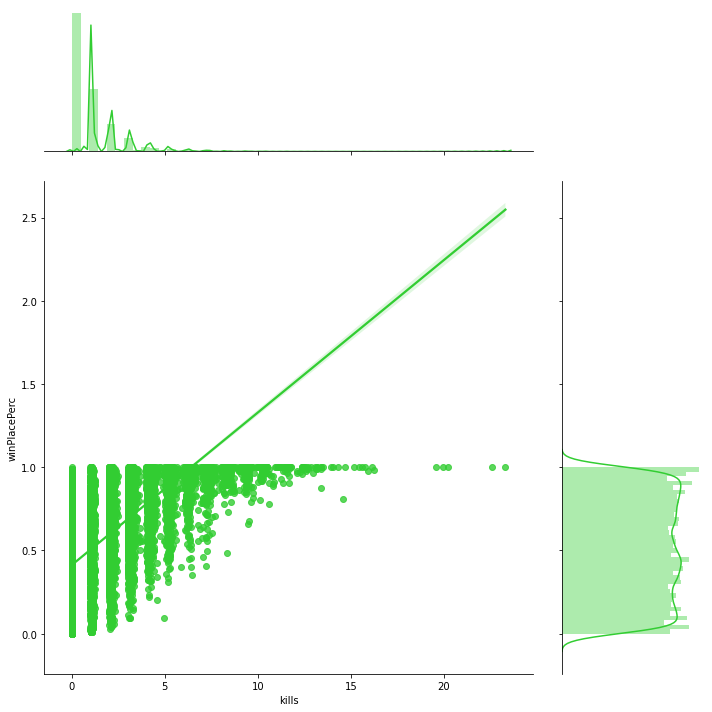

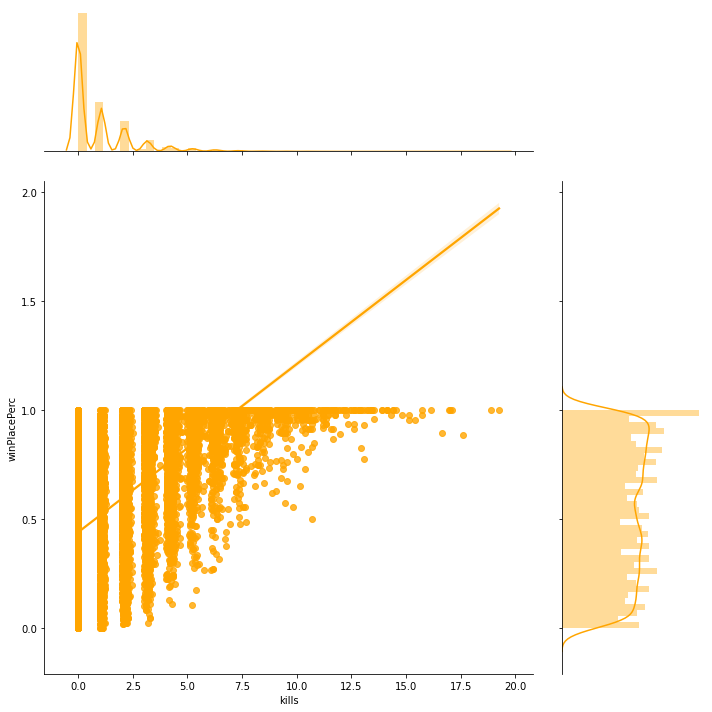

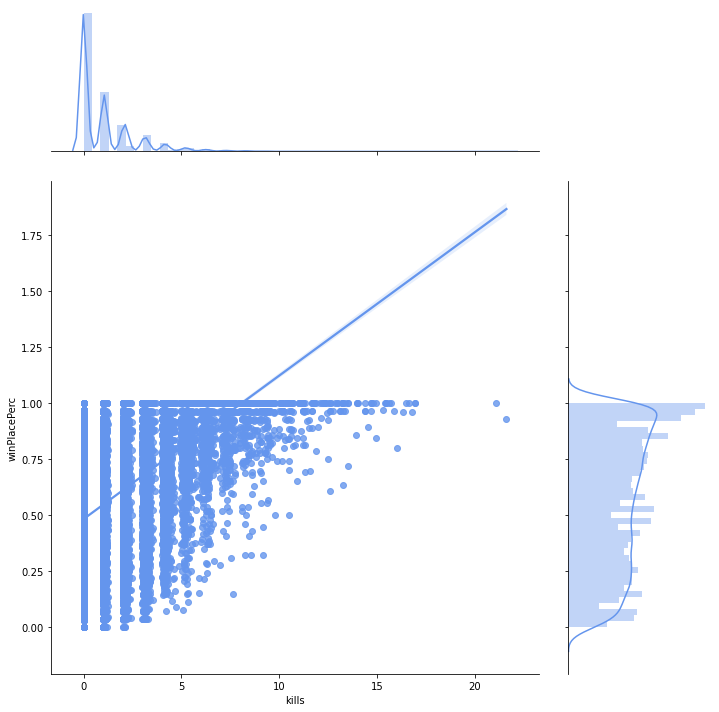

In [23]:
# kills与winPlacePerc之间的关系
sns.jointplot(x="kills", y="winPlacePerc", data=data1, height=10, ratio=3, color="limegreen",kind='reg')
sns.jointplot(x="kills", y="winPlacePerc", data=data2, height=10, ratio=3, color="orange",kind='reg')
sns.jointplot(x="kills", y="winPlacePerc", data=data3, height=10, ratio=3, color="cornflowerblue",kind='reg')
plt.show()

- 单排、双排、四排击杀敌人的不同水平与winPlacePerc的关系对比

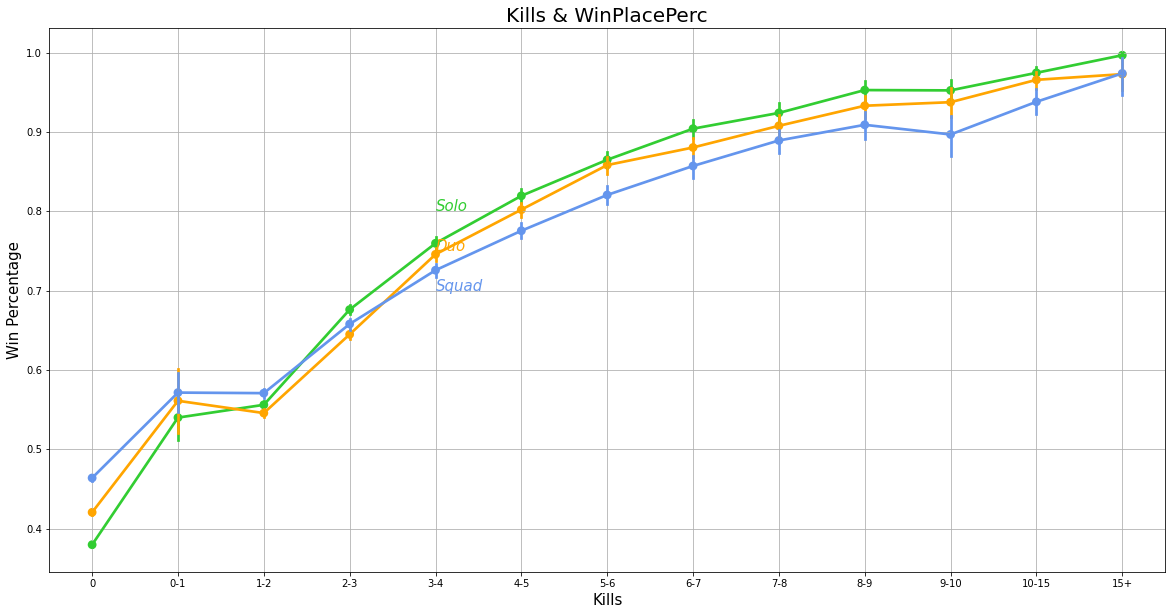

In [24]:
data_cut1['kills_cut'] = pd.cut(data_cut1['kills'], [-1,0,1,2,3,4,5,6,7,8,9,10,15,50], labels=['0','0-1','1-2','2-3', '3-4','4-5','5-6','6-7', '7-8','8-9', '9-10','10-15','15+'])
data_cut2['kills_cut'] = pd.cut(data_cut2['kills'], [-1,0,1,2,3,4,5,6,7,8,9,10,15,50], labels=['0','0-1','1-2','2-3', '3-4','4-5','5-6','6-7', '7-8','8-9', '9-10','10-15','15+'])
data_cut3['kills_cut'] = pd.cut(data_cut3['kills'], [-1,0,1,2,3,4,5,6,7,8,9,10,15,50], labels=['0','0-1','1-2','2-3', '3-4','4-5','5-6','6-7', '7-8','8-9', '9-10','10-15','15+'])
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='kills_cut',y='winPlacePerc',data=data_cut1,color='limegreen',alpha=0.8)
sns.pointplot(x='kills_cut',y='winPlacePerc',data=data_cut2,color='orange',alpha=0.8)
sns.pointplot(x='kills_cut',y='winPlacePerc',data=data_cut3,color='cornflowerblue',alpha=0.8)
plt.text(4,0.8,'Solo',color='limegreen',fontsize = 15,style = 'italic')
plt.text(4,0.75,'Duo',color='orange',fontsize = 15,style = 'italic')
plt.text(4,0.7,'Squad',color='cornflowerblue',fontsize = 15,style = 'italic')
plt.xlabel('Kills',fontsize = 15,color='black')
plt.ylabel('Win Percentage',fontsize = 15,color='black')
plt.title('Kills & WinPlacePerc',fontsize = 20,color='black')
plt.grid()
plt.show()

- 单排、双排、四排击杀输出极低但躺赢吃鸡的情况比对

In [25]:
No_kill1=data1[data1['kills'] == 0]
print("单排中{} 个玩家 ({:.2f}%) 不用杀一个人就可以赢得比赛".format(len(No_kill1[No_kill1['winPlacePerc']==1]), 100*len(No_kill1[No_kill1['winPlacePerc']==1])/len(data1)))
print('\n')

No_kill2=data2[data2['kills'] == 0]
print("双排中{} 个玩家 ({:.2f}%) 不用杀一个人就可以赢得比赛".format(len(No_kill2[No_kill2['winPlacePerc']==1]), 100*len(No_kill2[No_kill2['winPlacePerc']==1])/len(data2)))
print('\n')

No_kill3=data3[data3['kills'] == 0]
print("四排中{} 个玩家 ({:.2f}%) 不用杀一个人就可以赢得比赛".format(len(No_kill3[No_kill3['winPlacePerc']==1]), 100*len(No_kill3[No_kill3['winPlacePerc']==1])/len(data3)))

单排中1 个玩家 (0.00%) 不用杀一个人就可以赢得比赛


双排中84 个玩家 (0.17%) 不用杀一个人就可以赢得比赛


四排中403 个玩家 (0.81%) 不用杀一个人就可以赢得比赛


#### killPlace
- 与winPlacePerc的散点图和回归拟合

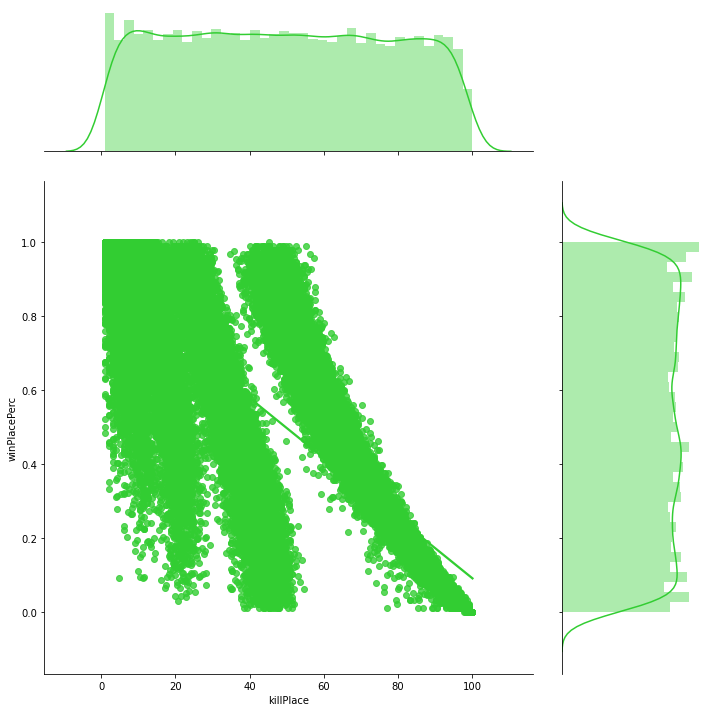

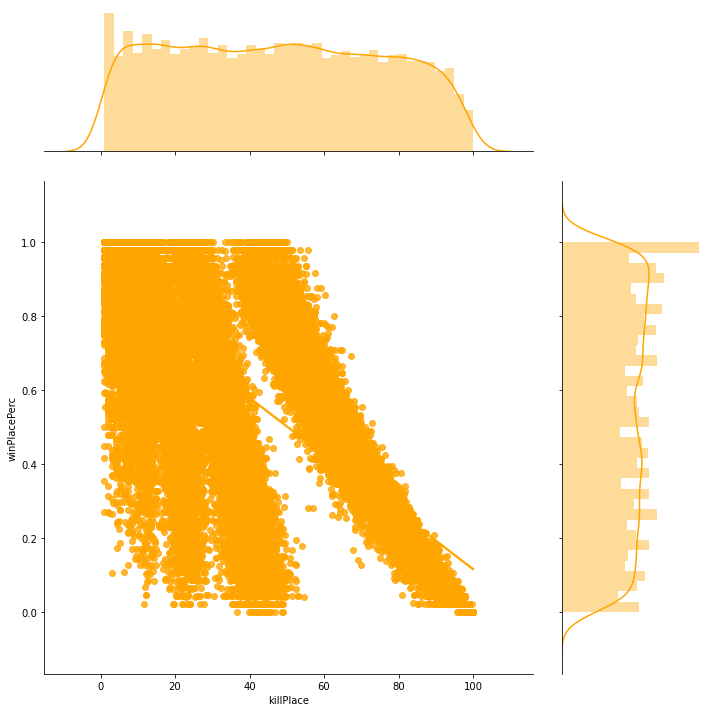

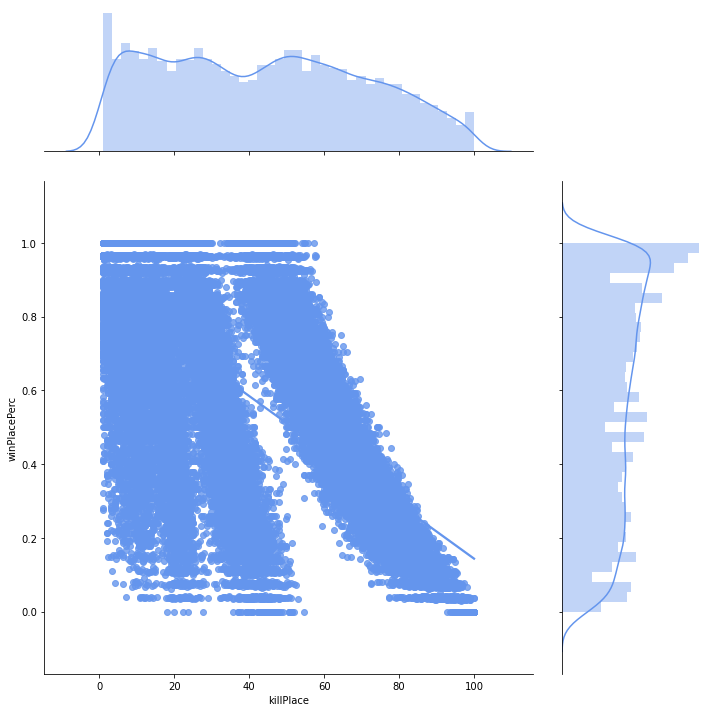

In [26]:
# killPlace与winPlacePerc之间的关系
sns.jointplot(x="killPlace", y="winPlacePerc", data=data1, height=10, ratio=3, color="limegreen",kind='reg')
sns.jointplot(x="killPlace", y="winPlacePerc", data=data2, height=10, ratio=3, color="orange",kind='reg')
sns.jointplot(x="killPlace", y="winPlacePerc", data=data3, height=10, ratio=3, color="cornflowerblue",kind='reg')
plt.show()

- 单排、双排、四排击杀排名的不同水平与winPlacePerc的关系对比

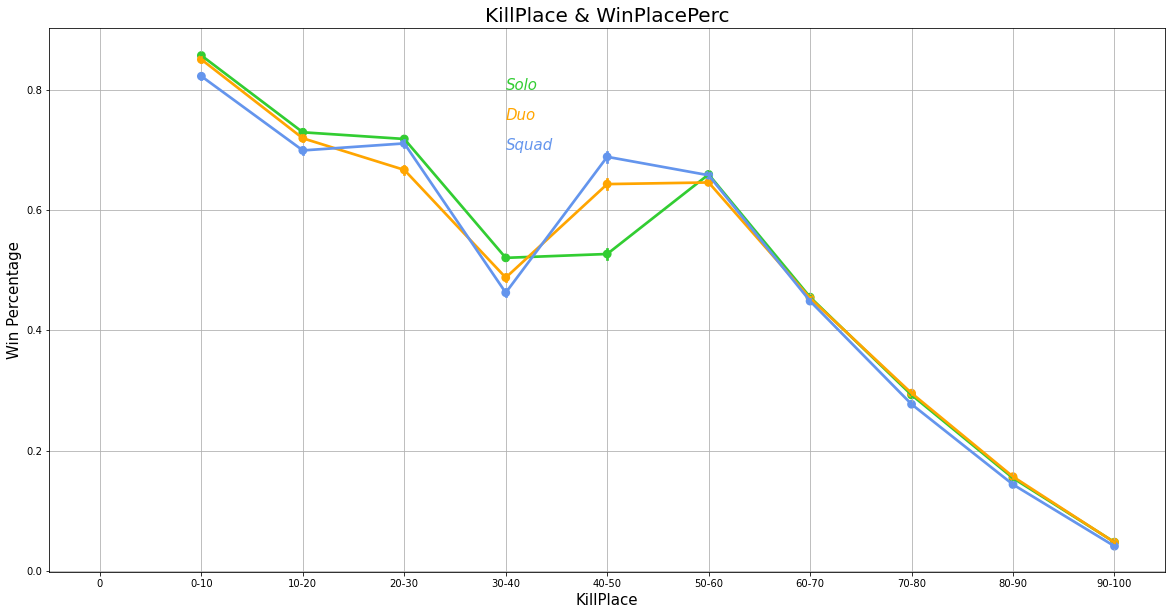

In [27]:
data_cut1['killPlace_cut'] = pd.cut(data_cut1['killPlace'], [-1,0,10,20,30,40,50,60,70,80,90,100], labels=['0','0-10','10-20','20-30', '30-40','40-50','50-60','60-70', '70-80','80-90', '90-100'])
data_cut2['killPlace_cut'] = pd.cut(data_cut2['killPlace'], [-1,0,10,20,30,40,50,60,70,80,90,100], labels=['0','0-10','10-20','20-30', '30-40','40-50','50-60','60-70', '70-80','80-90', '90-100'])
data_cut3['killPlace_cut'] = pd.cut(data_cut3['killPlace'], [-1,0,10,20,30,40,50,60,70,80,90,100], labels=['0','0-10','10-20','20-30', '30-40','40-50','50-60','60-70', '70-80','80-90', '90-100'])
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='killPlace_cut',y='winPlacePerc',data=data_cut1,color='limegreen',alpha=0.8)
sns.pointplot(x='killPlace_cut',y='winPlacePerc',data=data_cut2,color='orange',alpha=0.8)
sns.pointplot(x='killPlace_cut',y='winPlacePerc',data=data_cut3,color='cornflowerblue',alpha=0.8)
plt.text(4,0.8,'Solo',color='limegreen',fontsize = 15,style = 'italic')
plt.text(4,0.75,'Duo',color='orange',fontsize = 15,style = 'italic')
plt.text(4,0.7,'Squad',color='cornflowerblue',fontsize = 15,style = 'italic')
plt.xlabel('KillPlace',fontsize = 15,color='black')
plt.ylabel('Win Percentage',fontsize = 15,color='black')
plt.title('KillPlace & WinPlacePerc',fontsize = 20,color='black')
plt.grid()
plt.show()

#### damageDealt
- 与winPlacePerc的散点图和回归拟合

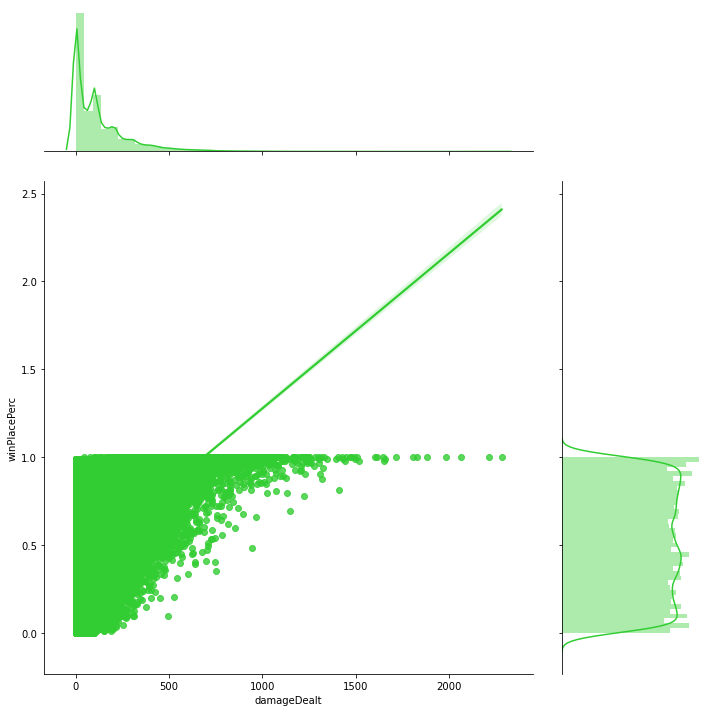

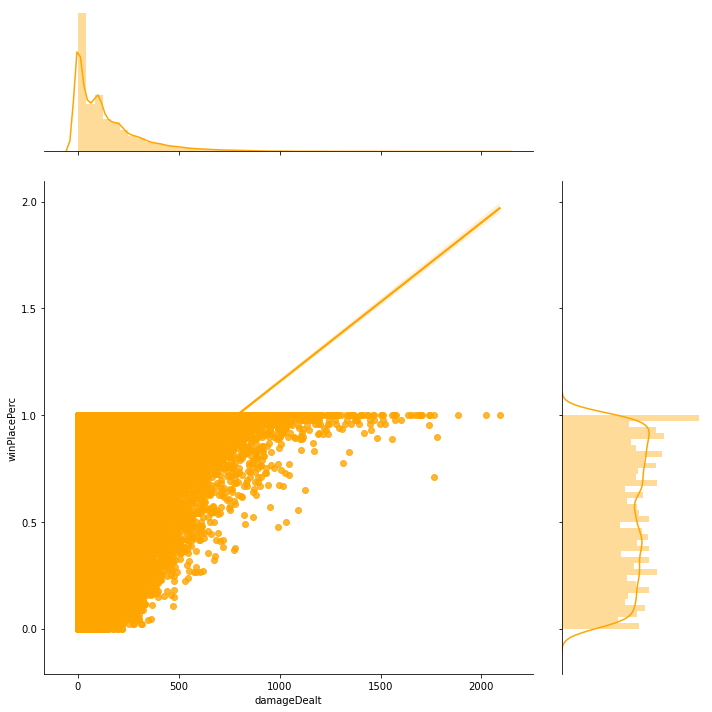

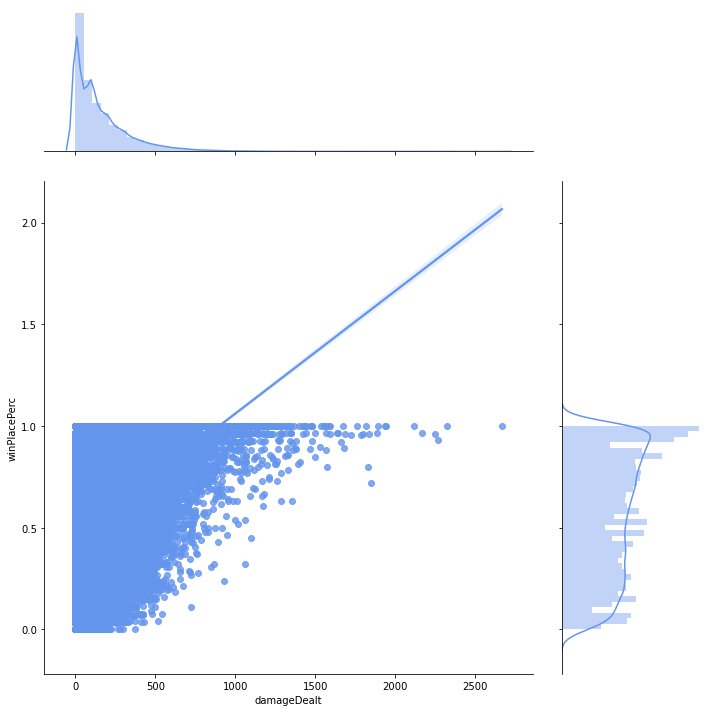

In [28]:
# damageDealt与winPlacePerc之间的关系
sns.jointplot(x="damageDealt", y="winPlacePerc", data=data1, height=10, ratio=3, color="limegreen",kind='reg')
sns.jointplot(x="damageDealt", y="winPlacePerc", data=data2, height=10, ratio=3, color="orange",kind='reg')
sns.jointplot(x="damageDealt", y="winPlacePerc", data=data3, height=10, ratio=3, color="cornflowerblue",kind='reg')
plt.show()

- 单排、双排、四排伤害敌人的不同水平与winPlacePerc的关系对比

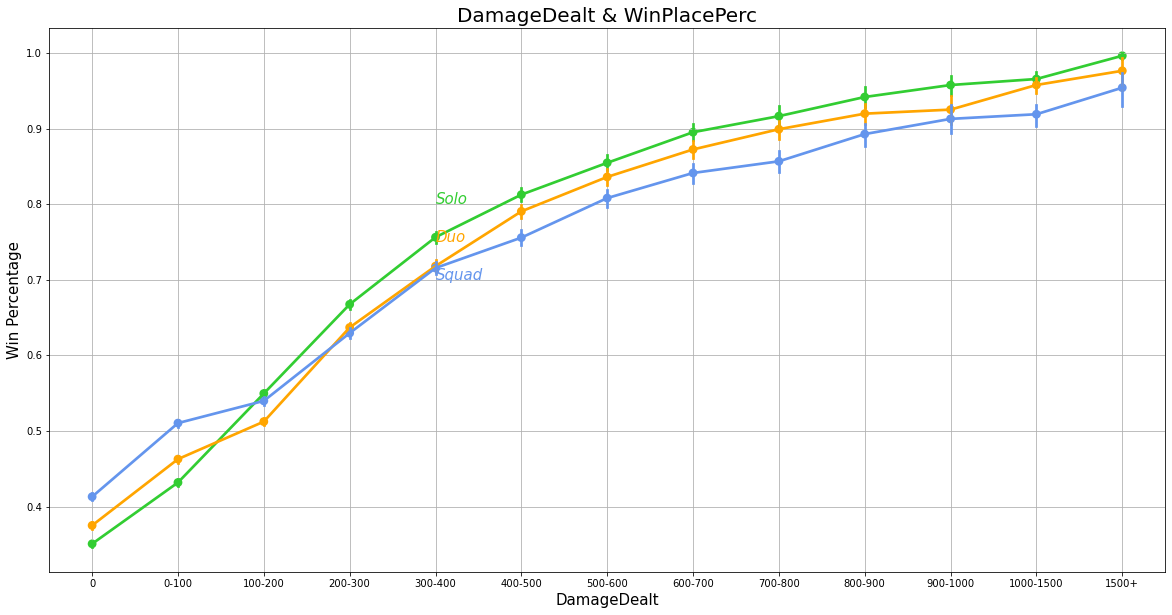

In [29]:
data_cut1['damageDealt_cut'] = pd.cut(data_cut1['damageDealt'], [-1,0,100,200,300,400,500,600,700,800,900,1000,1500,5000], labels=['0','0-100','100-200','200-300', '300-400','400-500','500-600','600-700', '700-800','800-900', '900-1000','1000-1500','1500+'])
data_cut2['damageDealt_cut'] = pd.cut(data_cut2['damageDealt'], [-1,0,100,200,300,400,500,600,700,800,900,1000,1500,5000], labels=['0','0-100','100-200','200-300', '300-400','400-500','500-600','600-700', '700-800','800-900', '900-1000','1000-1500','1500+'])
data_cut3['damageDealt_cut'] = pd.cut(data_cut3['damageDealt'], [-1,0,100,200,300,400,500,600,700,800,900,1000,1500,5000], labels=['0','0-100','100-200','200-300', '300-400','400-500','500-600','600-700', '700-800','800-900', '900-1000','1000-1500','1500+'])
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='damageDealt_cut',y='winPlacePerc',data=data_cut1,color='limegreen',alpha=0.8)
sns.pointplot(x='damageDealt_cut',y='winPlacePerc',data=data_cut2,color='orange',alpha=0.8)
sns.pointplot(x='damageDealt_cut',y='winPlacePerc',data=data_cut3,color='cornflowerblue',alpha=0.8)
plt.text(4,0.8,'Solo',color='limegreen',fontsize = 15,style = 'italic')
plt.text(4,0.75,'Duo',color='orange',fontsize = 15,style = 'italic')
plt.text(4,0.7,'Squad',color='cornflowerblue',fontsize = 15,style = 'italic')
plt.xlabel('DamageDealt',fontsize = 15,color='black')
plt.ylabel('Win Percentage',fontsize = 15,color='black')
plt.title('DamageDealt & WinPlacePerc',fontsize = 20,color='black')
plt.grid()
plt.show()

- 单排、双排、四排伤害输出极低但躺赢吃鸡的情况比对

In [30]:
No_damage1 = data1[data1['damageDealt'] == 0]
print("单排{} 个玩家 ({:.2f}%) 不用伤害任何人就可以躺赢比赛".format(len(No_damage1[No_damage1['winPlacePerc']==1]), 100*len(No_damage1[No_damage1['winPlacePerc']==1])/len(data1)))
print('\n')

No_damage2 = data2[data2['damageDealt'] == 0]
print("单排{} 个玩家 ({:.2f}%) 不用伤害任何人就可以躺赢比赛".format(len(No_damage2[No_damage2['winPlacePerc']==1]), 100*len(No_damage2[No_damage2['winPlacePerc']==1])/len(data2)))
print('\n')

No_damage3 = data3[data3['damageDealt'] == 0]
print("单排{} 个玩家 ({:.2f}%) 不用伤害任何人就可以躺赢比赛".format(len(No_damage3[No_damage3['winPlacePerc']==1]), 100*len(No_damage3[No_damage3['winPlacePerc']==1])/len(data3)))

单排0 个玩家 (0.00%) 不用伤害任何人就可以躺赢比赛


单排19 个玩家 (0.04%) 不用伤害任何人就可以躺赢比赛


单排121 个玩家 (0.24%) 不用伤害任何人就可以躺赢比赛


#### DBNOs
- 与winPlacePerc的散点图和回归拟合

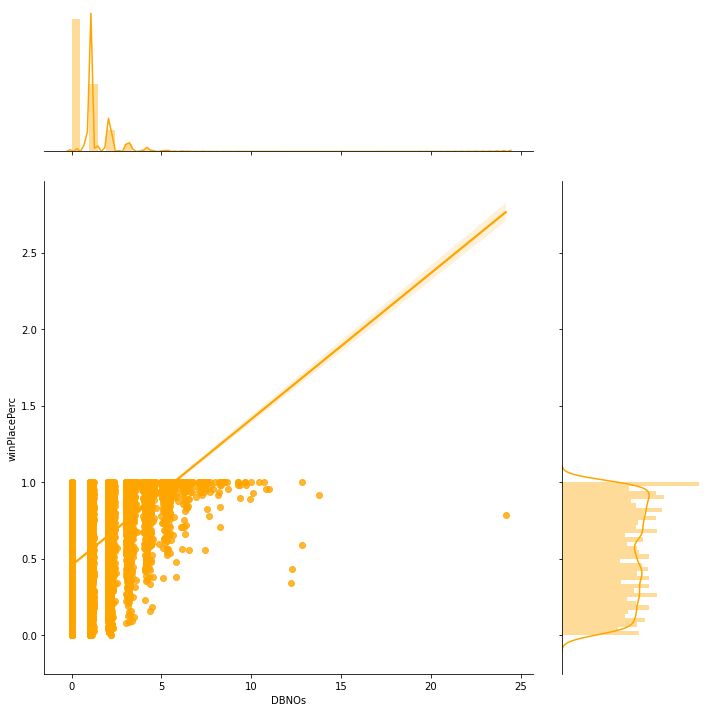

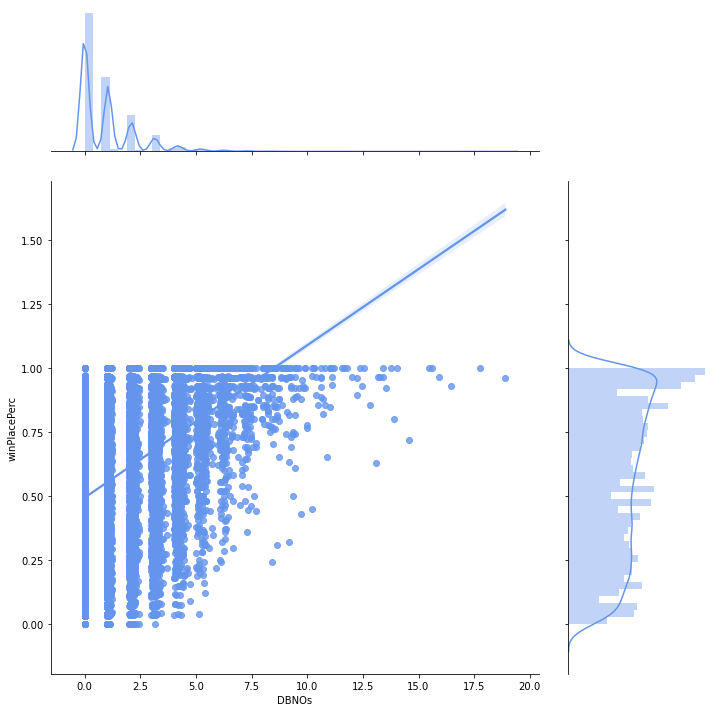

In [31]:
# DBNOs与winPlacePerc之间的关系，单排没有该数据
sns.jointplot(x="DBNOs", y="winPlacePerc", data=data2, height=10, ratio=3, color="orange",kind='reg')
sns.jointplot(x="DBNOs", y="winPlacePerc", data=data3, height=10, ratio=3, color="cornflowerblue",kind='reg')
plt.show()

- 单排、双排、四排击倒敌人的不同水平与winPlacePerc的关系对比

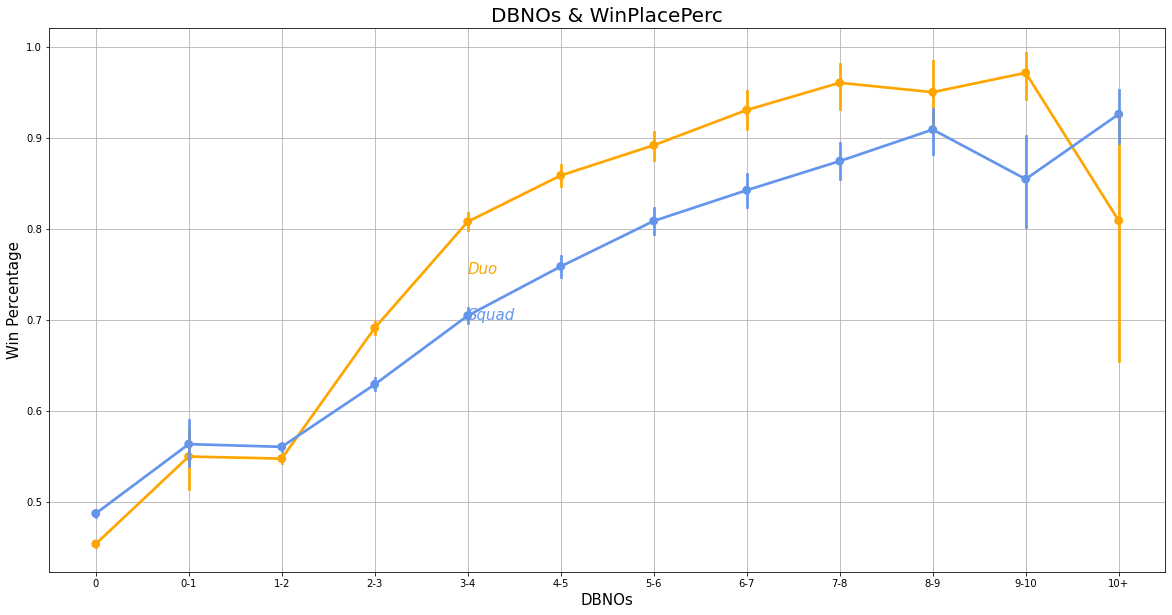

In [32]:
data_cut2['DBNOs_cut'] = pd.cut(data_cut2['DBNOs'], [-1,0,1,2,3,4,5,6,7,8,9,10,50], labels=['0','0-1','1-2','2-3', '3-4','4-5','5-6','6-7', '7-8','8-9', '9-10', '10+'])
data_cut3['DBNOs_cut'] = pd.cut(data_cut3['DBNOs'], [-1,0,1,2,3,4,5,6,7,8,9,10,50], labels=['0','0-1','1-2','2-3', '3-4','4-5','5-6','6-7', '7-8','8-9', '9-10', '10+'])
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='DBNOs_cut',y='winPlacePerc',data=data_cut2,color='orange',alpha=0.8)
sns.pointplot(x='DBNOs_cut',y='winPlacePerc',data=data_cut3,color='cornflowerblue',alpha=0.8)
plt.text(4,0.75,'Duo',color='orange',fontsize = 15,style = 'italic')
plt.text(4,0.7,'Squad',color='cornflowerblue',fontsize = 15,style = 'italic')
plt.xlabel('DBNOs',fontsize = 15,color='black')
plt.ylabel('Win Percentage',fontsize = 15,color='black')
plt.title('DBNOs & WinPlacePerc',fontsize = 20,color='black')
plt.grid()
plt.show()

- 查看有击倒和没有击倒的占比

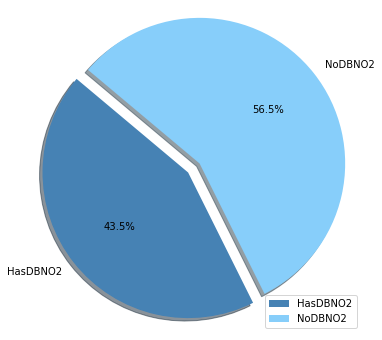

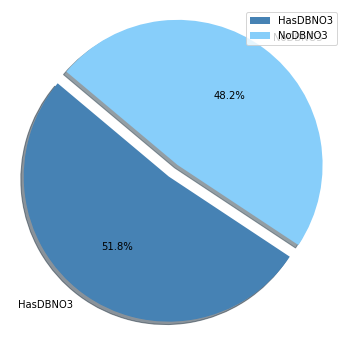

In [33]:
# 双排
HasDBNO2=data2.DBNOs[data2.DBNOs>0].count()
NoDBNO2=data2.DBNOs[data2.DBNOs == 0].count()
num2=data2.DBNOs.count()

labels = 'HasDBNO2', 'NoDBNO2'
sizes = [HasDBNO2/num2, NoDBNO2/num2]
colors = ['steelblue', 'lightskyblue']
explode = (0.1, 0)  # explode 1st slice

plt.figure(figsize=(6,6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.legend()
plt.show()

# 四排
HasDBNO3=data3.DBNOs[data3.DBNOs>0].count()
NoDBNO3=data3.DBNOs[data3.DBNOs == 0].count()
num3=data3.DBNOs.count()

labels = 'HasDBNO3', 'NoDBNO3'
sizes = [HasDBNO3/num3, NoDBNO3/num3]
colors = ['steelblue', 'lightskyblue']
explode = (0.1, 0)  # explode 1st slice

plt.figure(figsize=(6,6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.legend()
plt.show()

- 单排、双排、四排有无击倒敌人与吃鸡的情况比对

In [34]:
HasDBNOs2 = data2[data2['killStreaks'] > 0].copy()
print("双排中有击倒敌人的玩家中有{} 个玩家 ({:.4f}%) 最终成功吃鸡".format(len(HasDBNOs2[HasDBNOs2['winPlacePerc']==1]), 100*len(HasDBNOs2[HasDBNOs2['winPlacePerc']==1])/len(HasDBNOs2)))
NoDBNOs2 = data2[data2['killStreaks'] == 0].copy()
print("双排中没有击倒过敌人的玩家中有{} 个玩家 ({:.4f}%) 最终成功吃鸡".format(len(NoDBNOs2[NoDBNOs2['winPlacePerc']==1]), 100*len(NoDBNOs2[NoDBNOs2['winPlacePerc']==1])/len(NoDBNOs2)))
print('\n')

HasDBNOs3 = data3[data3['killStreaks'] > 0].copy()
print("四排中有击倒敌人的玩家中有{} 个玩家 ({:.4f}%) 最终成功吃鸡".format(len(HasDBNOs3[HasDBNOs3['winPlacePerc']==1]), 100*len(HasDBNOs3[HasDBNOs3['winPlacePerc']==1])/len(HasDBNOs3)))
NoDBNOs3 = data3[data3['killStreaks'] == 0].copy()
print("四排中没有击倒过敌人的玩家中有{} 个玩家 ({:.4f}%) 最终成功吃鸡".format(len(NoDBNOs3[NoDBNOs3['winPlacePerc']==1]), 100*len(NoDBNOs3[NoDBNOs3['winPlacePerc']==1])/len(NoDBNOs3)))

双排中有击倒敌人的玩家中有1133 个玩家 (5.0137%) 最终成功吃鸡
双排中没有击倒过敌人的玩家中有84 个玩家 (0.3065%) 最终成功吃鸡


四排中有击倒敌人的玩家中有2236 个玩家 (9.2134%) 最终成功吃鸡
四排中没有击倒过敌人的玩家中有403 个玩家 (1.5662%) 最终成功吃鸡


#### assists
- 与winPlacePerc的散点图和回归拟合

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


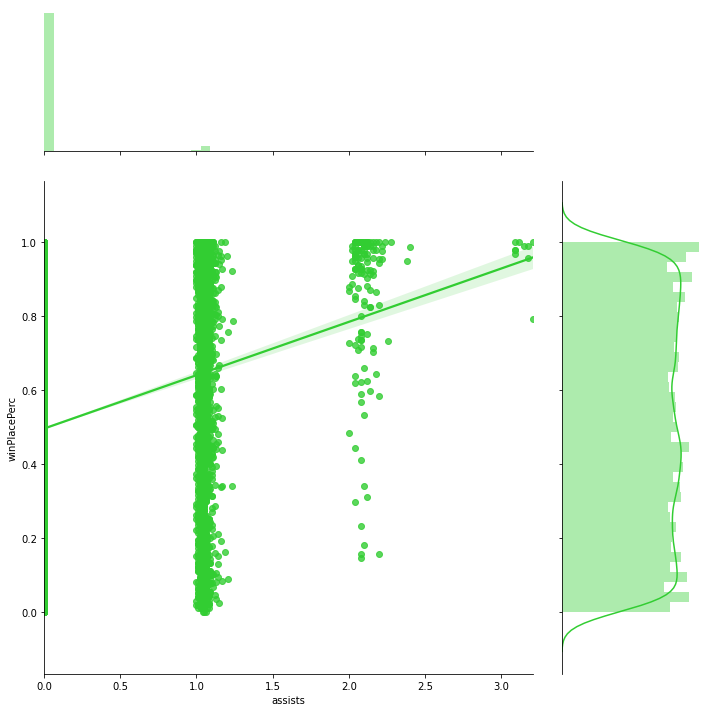

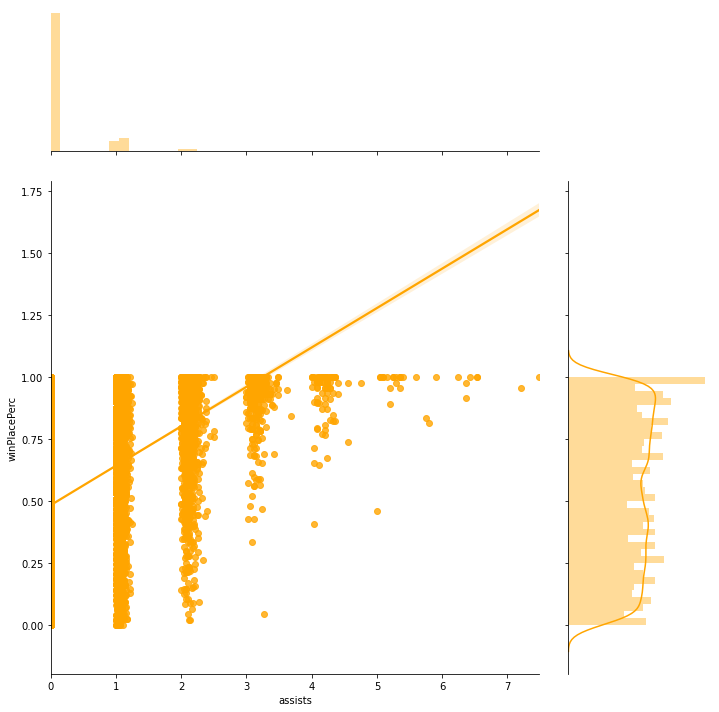

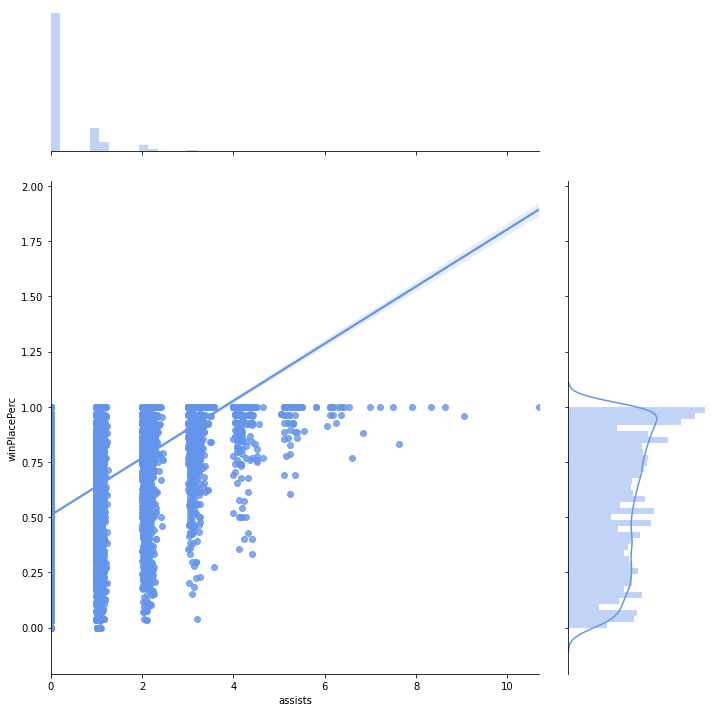

In [35]:
# assists与winPlacePerc之间的关系
sns.jointplot(x="assists", y="winPlacePerc", data=data1, height=10, ratio=3, color="limegreen",kind='reg')
sns.jointplot(x="assists", y="winPlacePerc", data=data2, height=10, ratio=3, color="orange",kind='reg')
sns.jointplot(x="assists", y="winPlacePerc", data=data3, height=10, ratio=3, color="cornflowerblue",kind='reg')
plt.show()

- 不同助攻队友水平与winPlacePerc的小提琴图

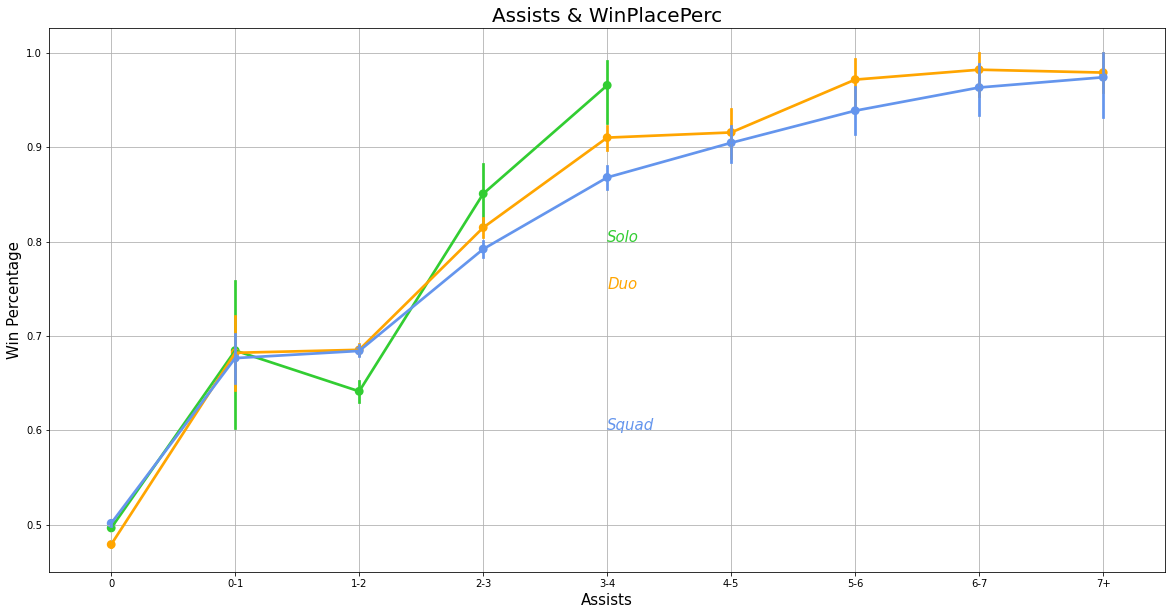

In [36]:
data_cut1['assists_cut'] = pd.cut(data_cut1['assists'], [-1,0,1,2,3,4,5,6,7,30], labels=['0','0-1','1-2','2-3', '3-4','4-5','5-6','6-7','7+'])
data_cut2['assists_cut'] = pd.cut(data_cut2['assists'], [-1,0,1,2,3,4,5,6,7,30], labels=['0','0-1','1-2','2-3', '3-4','4-5','5-6','6-7','7+'])
data_cut3['assists_cut'] = pd.cut(data_cut3['assists'], [-1,0,1,2,3,4,5,6,7,30], labels=['0','0-1','1-2','2-3', '3-4','4-5','5-6','6-7','7+'])
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='assists_cut',y='winPlacePerc',data=data_cut1,color='limegreen',alpha=0.8)
sns.pointplot(x='assists_cut',y='winPlacePerc',data=data_cut2,color='orange',alpha=0.8)
sns.pointplot(x='assists_cut',y='winPlacePerc',data=data_cut3,color='cornflowerblue',alpha=0.8)
plt.text(4,0.8,'Solo',color='limegreen',fontsize = 15,style = 'italic')
plt.text(4,0.75,'Duo',color='orange',fontsize = 15,style = 'italic')
plt.text(4,0.6,'Squad',color='cornflowerblue',fontsize = 15,style = 'italic')
plt.xlabel('Assists',fontsize = 15,color='black')
plt.ylabel('Win Percentage',fontsize = 15,color='black')
plt.title('Assists & WinPlacePerc',fontsize = 20,color='black')
plt.grid()
plt.show()

- 单排、双排、四排有无assists与吃鸡的情况比对

In [37]:
HasAssists1 = data1[data1['assists'] > 0].copy()
print("单排中有assists的玩家中有{} 个玩家 ({:.4f}%) 最终成功吃鸡".format(len(HasAssists1[HasAssists1['winPlacePerc']==1]), 100*len(HasAssists1[HasAssists1['winPlacePerc']==1])/len(HasAssists1)))
NoAssists1 = data1[data1['assists'] == 0].copy()
print("单排中没有assists的玩家中有{} 个玩家 ({:.4f}%) 最终成功吃鸡".format(len(NoAssists1[NoAssists1['winPlacePerc']==1]), 100*len(NoAssists1[NoAssists1['winPlacePerc']==1])/len(NoAssists1)))
print('\n')

HasAssists2 = data2[data2['assists'] > 0].copy()
print("双排中有助攻队友的玩家中有{} 个玩家 ({:.4f}%) 最终成功吃鸡".format(len(HasAssists2[HasAssists2['winPlacePerc']==1]), 100*len(HasAssists2[HasAssists2['winPlacePerc']==1])/len(HasAssists2)))
NoAssists2 = data2[data2['assists'] == 0].copy()
print("双排中没有助攻队友的玩家中有{} 个玩家 ({:.4f}%) 最终成功吃鸡".format(len(NoAssists2[NoAssists2['winPlacePerc']==1]), 100*len(NoAssists2[NoAssists2['winPlacePerc']==1])/len(NoAssists2)))
print('\n')

HasAssists3 = data3[data3['assists'] > 0].copy()
print("四排中有助攻队友的玩家中有{} 个玩家 ({:.4f}%) 最终成功吃鸡".format(len(HasAssists3[HasAssists3['winPlacePerc']==1]), 100*len(HasAssists3[HasAssists3['winPlacePerc']==1])/len(HasAssists3)))
NoAssists3 = data3[data3['assists'] == 0].copy()
print("四排中没有助攻队友的玩家中有{} 个玩家 ({:.4f}%) 最终成功吃鸡".format(len(NoAssists3[NoAssists3['winPlacePerc']==1]), 100*len(NoAssists3[NoAssists3['winPlacePerc']==1])/len(NoAssists3)))

单排中有assists的玩家中有123 个玩家 (4.4039%) 最终成功吃鸡
单排中没有assists的玩家中有419 个玩家 (0.8876%) 最终成功吃鸡


双排中有助攻队友的玩家中有776 个玩家 (8.5303%) 最终成功吃鸡
双排中没有助攻队友的玩家中有441 个玩家 (1.0782%) 最终成功吃鸡


四排中有助攻队友的玩家中有1680 个玩家 (13.4896%) 最终成功吃鸡
四排中没有助攻队友的玩家中有959 个玩家 (2.5542%) 最终成功吃鸡


#### roadKills
- 与winPlacePerc的散点图和回归拟合

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


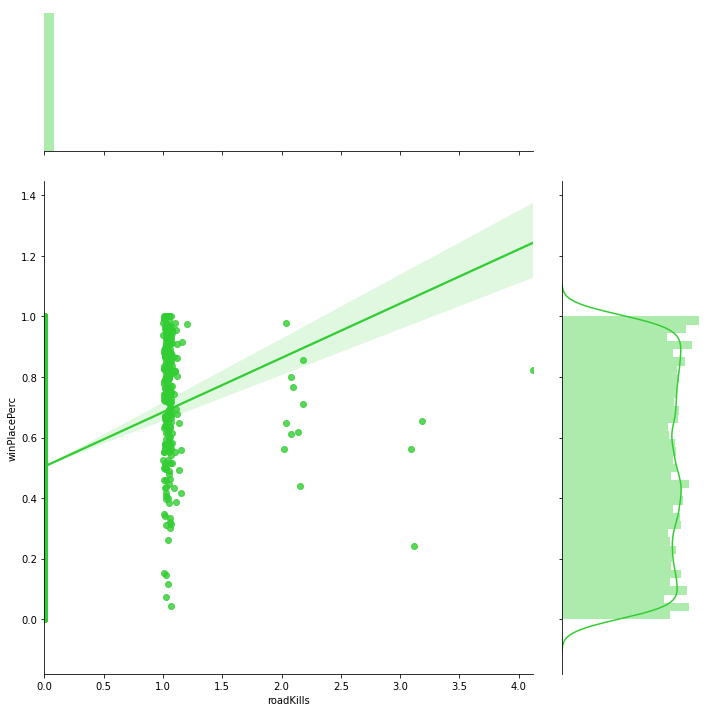

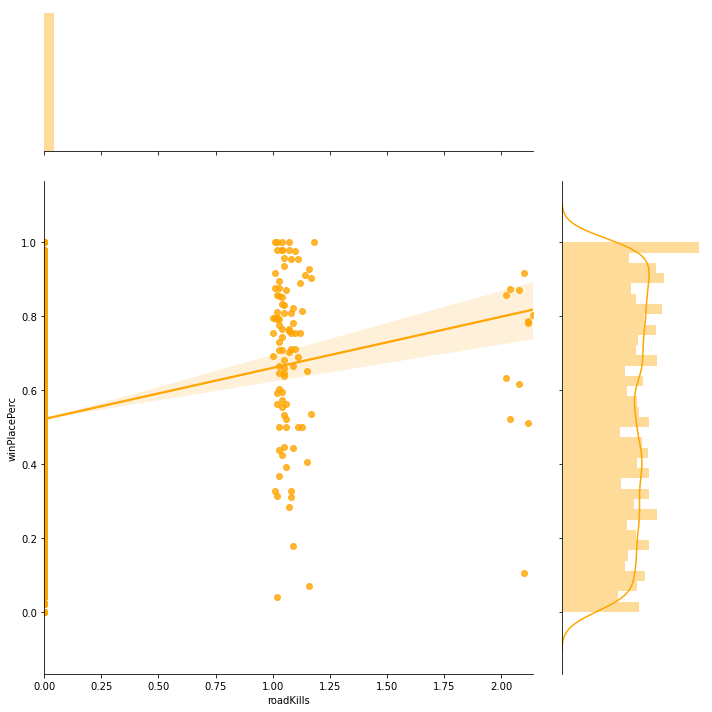

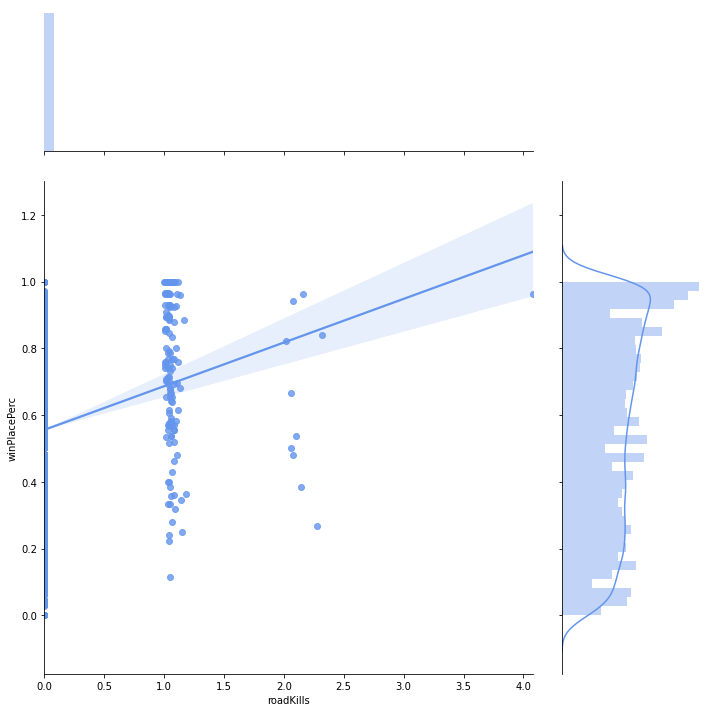

In [38]:
# roadKills与winPlacePerc之间的关系
sns.jointplot(x="roadKills", y="winPlacePerc", data=data1, height=10, ratio=3, color="limegreen",kind='reg')
sns.jointplot(x="roadKills", y="winPlacePerc", data=data2, height=10, ratio=3, color="orange",kind='reg')
sns.jointplot(x="roadKills", y="winPlacePerc", data=data3, height=10, ratio=3, color="cornflowerblue",kind='reg')
plt.show()

- 单排、双排、四排有无载具击杀与winPlacePerc的箱线图比对

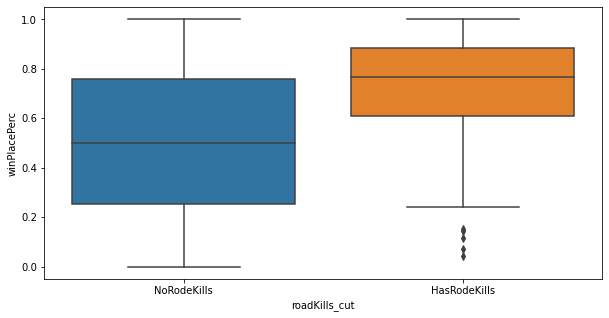

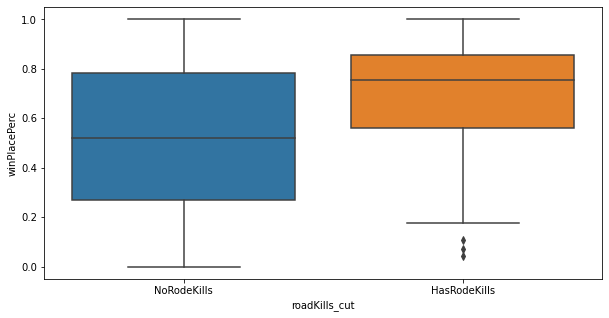

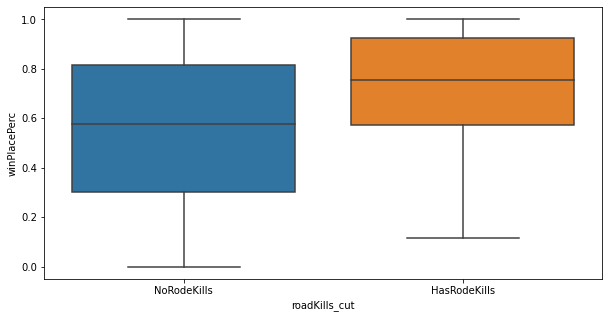

In [39]:
data_cut1['roadKills_cut'] = data1['roadKills'].apply(lambda x: 'NoRodeKills' if x==0 else 'HasRodeKills')
plt.figure(figsize=(10,5))
sns.boxplot(x="roadKills_cut", y="winPlacePerc", data=data_cut1)
plt.show()

data_cut2['roadKills_cut'] = data2['roadKills'].apply(lambda x: 'NoRodeKills' if x==0 else 'HasRodeKills')
plt.figure(figsize=(10,5))
sns.boxplot(x="roadKills_cut", y="winPlacePerc", data=data_cut2)
plt.show()

data_cut3['roadKills_cut'] = data3['roadKills'].apply(lambda x: 'NoRodeKills' if x==0 else 'HasRodeKills')
plt.figure(figsize=(10,5))
sns.boxplot(x="roadKills_cut", y="winPlacePerc", data=data_cut3)
plt.show()

- 有载具击杀和没有载具击杀的占比

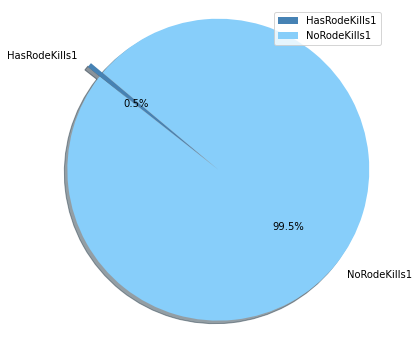

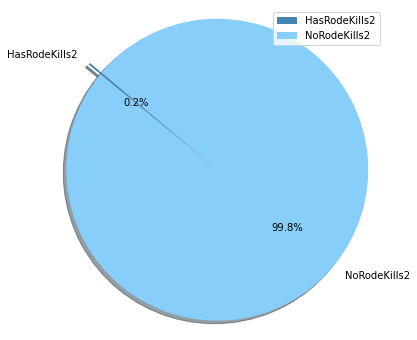

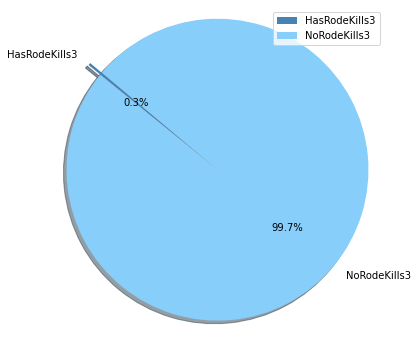

In [40]:
# 单排
HasRodeKills1=data1.roadKills[data1.roadKills>0].count()
NoRodeKills1=data1.roadKills[data1.roadKills == 0].count()
num1=data1.roadKills.count()

labels = 'HasRodeKills1', 'NoRodeKills1'
sizes = [HasRodeKills1/num1, NoRodeKills1/num1]
colors = ['steelblue', 'lightskyblue']
explode = (0.1, 0)  # explode 1st slice

plt.figure(figsize=(6,6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.legend()
plt.show()

# 双排
HasRodeKills2=data2.roadKills[data2.roadKills>0].count()
NoRodeKills2=data2.roadKills[data2.roadKills == 0].count()
num2=data2.roadKills.count()

labels = 'HasRodeKills2', 'NoRodeKills2'
sizes = [HasRodeKills2/num2, NoRodeKills2/num2]
colors = ['steelblue', 'lightskyblue']
explode = (0.1, 0)  # explode 1st slice

plt.figure(figsize=(6,6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.legend()
plt.show()

# 四排
HasRodeKills3=data3.roadKills[data3.roadKills>0].count()
NoRodeKills3=data3.roadKills[data3.roadKills == 0].count()
num3=data3.roadKills.count()

labels = 'HasRodeKills3', 'NoRodeKills3'
sizes = [HasRodeKills3/num3, NoRodeKills3/num3]
colors = ['steelblue', 'lightskyblue']
explode = (0.1, 0)  # explode 1st slice

plt.figure(figsize=(6,6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.legend()
plt.show()

- 单排、双排、四排有无载具击杀与吃鸡的情况比对

In [41]:
HasRodeKills1 = data1[data1['roadKills'] > 0].copy()
print("单排中在载具上击杀敌人的玩家中有{} 个玩家 ({:.4f}%) 最终成功吃鸡".format(len(HasRodeKills1[HasRodeKills1['winPlacePerc']==1]), 100*len(HasRodeKills1[HasRodeKills1['winPlacePerc']==1])/len(HasRodeKills1)))
NoRodeKills1 = data1[data1['roadKills'] == 0].copy()
print("单排中未在载具上击杀敌人的玩家中有{} 个玩家 ({:.4f}%) 最终成功吃鸡".format(len(NoRodeKills1[NoRodeKills1['winPlacePerc']==1]), 100*len(NoRodeKills1[NoRodeKills1['winPlacePerc']==1])/len(NoRodeKills1)))
print('\n')

HasRodeKills2 = data2[data2['roadKills'] > 0].copy()
print("双排中在载具上击杀敌人的玩家中有{} 个玩家 ({:.4f}%) 最终成功吃鸡".format(len(HasRodeKills2[HasRodeKills2['winPlacePerc']==1]), 100*len(HasRodeKills2[HasRodeKills2['winPlacePerc']==1])/len(HasRodeKills2)))
NoRodeKills2 = data2[data2['roadKills'] == 0].copy()
print("双排中未在载具上击杀敌人的玩家中有{} 个玩家 ({:.4f}%) 最终成功吃鸡".format(len(NoRodeKills2[NoRodeKills2['winPlacePerc']==1]), 100*len(NoRodeKills2[NoRodeKills2['winPlacePerc']==1])/len(NoRodeKills2)))
print('\n')

HasRodeKills3 = data3[data3['roadKills'] > 0].copy()
print("四排中在载具上击杀敌人的玩家中有{} 个玩家 ({:.4f}%) 最终成功吃鸡".format(len(HasRodeKills3[HasRodeKills3['winPlacePerc']==1]), 100*len(HasRodeKills3[HasRodeKills3['winPlacePerc']==1])/len(HasRodeKills3)))
NoRodeKills3 = data3[data3['roadKills'] == 0].copy()
print("四排中未在载具上击杀敌人的玩家中有{} 个玩家 ({:.4f}%) 最终成功吃鸡".format(len(NoRodeKills3[NoRodeKills3['winPlacePerc']==1]), 100*len(NoRodeKills3[NoRodeKills3['winPlacePerc']==1])/len(NoRodeKills3)))

单排中在载具上击杀敌人的玩家中有10 个玩家 (3.9062%) 最终成功吃鸡
单排中未在载具上击杀敌人的玩家中有532 个玩家 (1.0695%) 最终成功吃鸡


双排中在载具上击杀敌人的玩家中有5 个玩家 (4.7170%) 最终成功吃鸡
双排中未在载具上击杀敌人的玩家中有1212 个玩家 (2.4291%) 最终成功吃鸡


四排中在载具上击杀敌人的玩家中有13 个玩家 (9.5588%) 最终成功吃鸡
四排中未在载具上击杀敌人的玩家中有2626 个玩家 (5.2663%) 最终成功吃鸡


#### (3)团队配合  单排不存在该部分特征
#### revives
- 与winPlacePerc的散点图和回归拟合

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


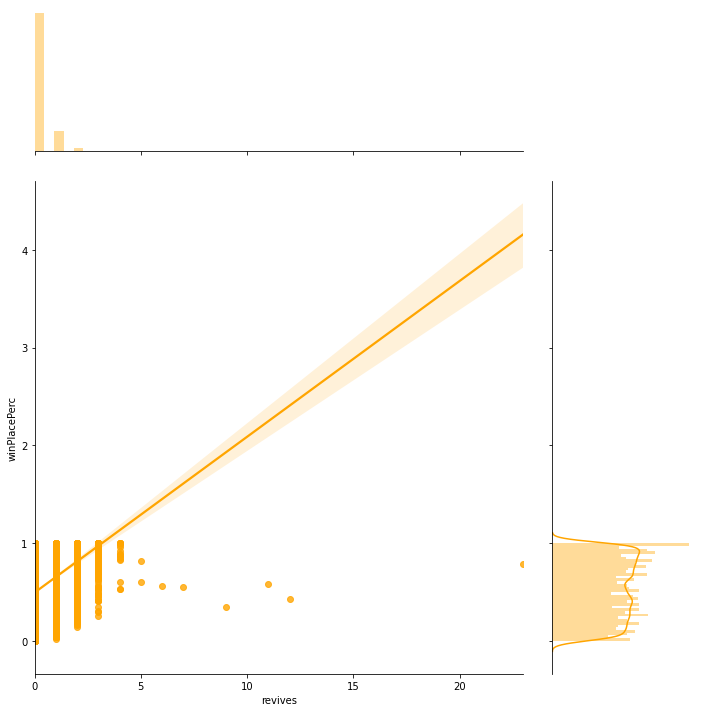

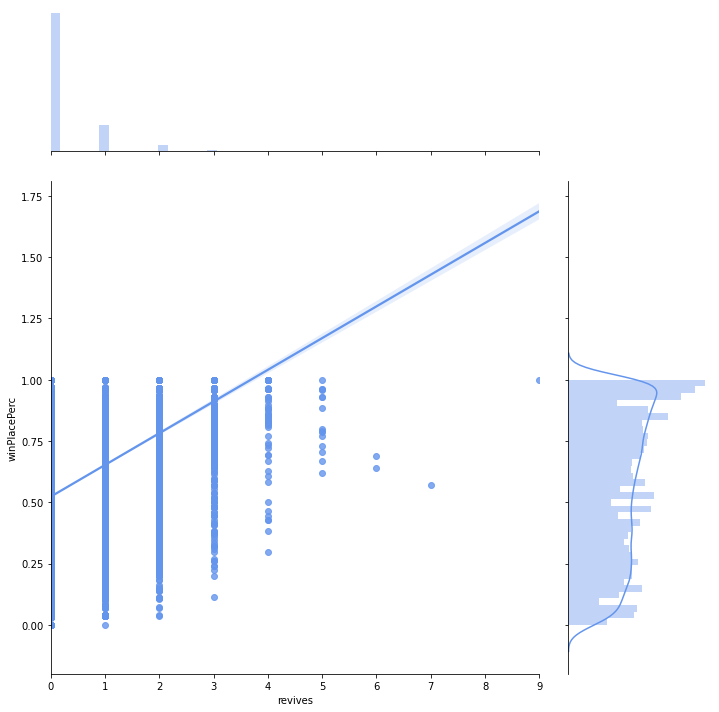

In [42]:
# revives与winPlacePerc之间的关系
sns.jointplot(x="revives", y="winPlacePerc", data=data2, height=10, ratio=3, color="orange",kind='reg')
sns.jointplot(x="revives", y="winPlacePerc", data=data3, height=10, ratio=3, color="cornflowerblue",kind='reg')
plt.show()

- 双排、四排不同救助队友情况与winPlacePerc的关系比对

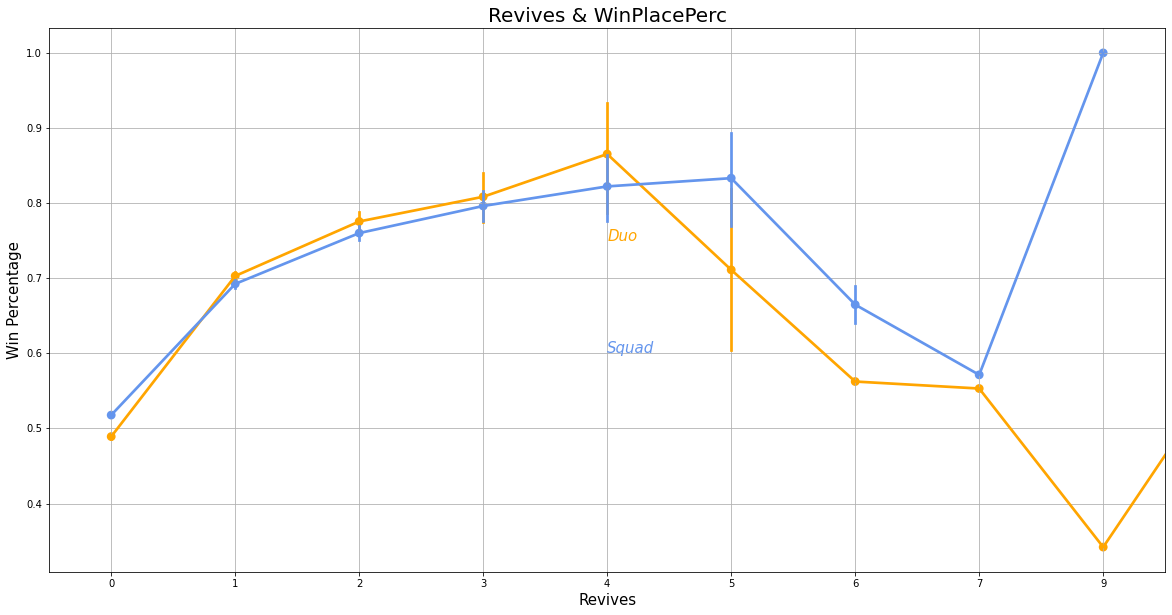

In [43]:
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='revives',y='winPlacePerc',data=data_cut2,color='orange',alpha=0.8)
sns.pointplot(x='revives',y='winPlacePerc',data=data_cut3,color='cornflowerblue',alpha=0.8)
plt.text(4,0.75,'Duo',color='orange',fontsize = 15,style = 'italic')
plt.text(4,0.6,'Squad',color='cornflowerblue',fontsize = 15,style = 'italic')
plt.xlabel('Revives',fontsize = 15,color='black')
plt.ylabel('Win Percentage',fontsize = 15,color='black')
plt.title('Revives & WinPlacePerc',fontsize = 20,color='black')
plt.grid()
plt.show()

- 双排、四排有无救助队友的占比

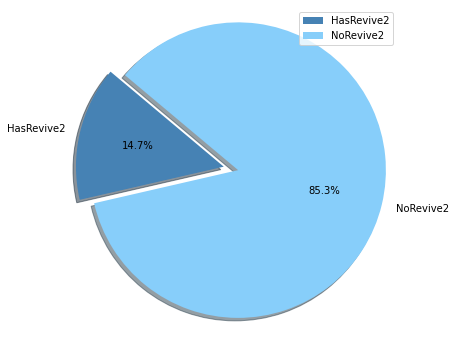

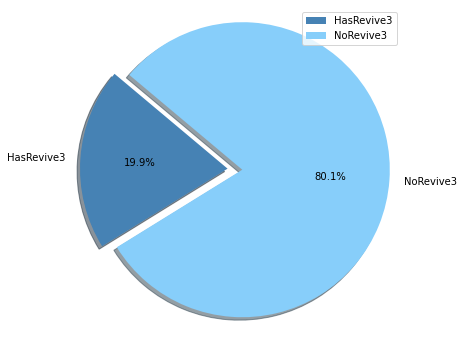

In [44]:
# 双排
HasRevive2=data2.revives[data2.revives>0].count()
NoRevive2=data2.revives[data2.revives == 0].count()
num2=data2.revives.count()

labels = 'HasRevive2', 'NoRevive2'
sizes = [HasRevive2/num2, NoRevive2/num2]
colors = ['steelblue', 'lightskyblue']
explode = (0.1, 0)  # explode 1st slice

plt.figure(figsize=(6,6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.legend()
plt.show()

# 四排
HasRevive3=data3.revives[data3.revives>0].count()
NoRevive3=data3.revives[data3.revives == 0].count()
num3=data3.revives.count()

labels = 'HasRevive3', 'NoRevive3'
sizes = [HasRevive3/num3, NoRevive3/num3]
colors = ['steelblue', 'lightskyblue']
explode = (0.1, 0)  # explode 1st slice

plt.figure(figsize=(6,6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.legend()
plt.show()

- 双排、四排有无救助队友与吃鸡的情况比对

In [45]:
HasRevives2 = data2[data2['revives'] > 0].copy()
print("双排中有救助队友的玩家中有{} 个玩家 ({:.4f}%) 最终成功吃鸡".format(len(HasRevives2[HasRevives2['winPlacePerc']==1]), 100*len(HasRevives2[HasRevives2['winPlacePerc']==1])/len(HasRevives2)))
NoRevives2 = data2[data2['revives'] == 0].copy()
print("双排中没有救助队友的玩家中有{} 个玩家 ({:.4f}%) 最终成功吃鸡".format(len(NoRevives2[NoRevives2['winPlacePerc']==1]), 100*len(NoRevives2[NoRevives2['winPlacePerc']==1])/len(NoRevives2)))
print('\n')

HasRevives3 = data3[data3['revives'] > 0].copy()
print("双排中有救助队友的玩家中有{} 个玩家 ({:.4f}%) 最终成功吃鸡".format(len(HasRevives3[HasRevives3['winPlacePerc']==1]), 100*len(HasRevives3[HasRevives3['winPlacePerc']==1])/len(HasRevives3)))
NoRevives3 = data3[data3['revives'] == 0].copy()
print("双排中没有救助队友的玩家中有{} 个玩家 ({:.4f}%) 最终成功吃鸡".format(len(NoRevives3[NoRevives3['winPlacePerc']==1]), 100*len(NoRevives3[NoRevives3['winPlacePerc']==1])/len(NoRevives3)))

双排中有救助队友的玩家中有496 个玩家 (6.7437%) 最终成功吃鸡
双排中没有救助队友的玩家中有721 个玩家 (1.6907%) 最终成功吃鸡


双排中有救助队友的玩家中有1046 个玩家 (10.4988%) 最终成功吃鸡
双排中没有救助队友的玩家中有1593 个玩家 (3.9788%) 最终成功吃鸡


#### teamKills
- 与winPlacePerc的散点图和回归拟合

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


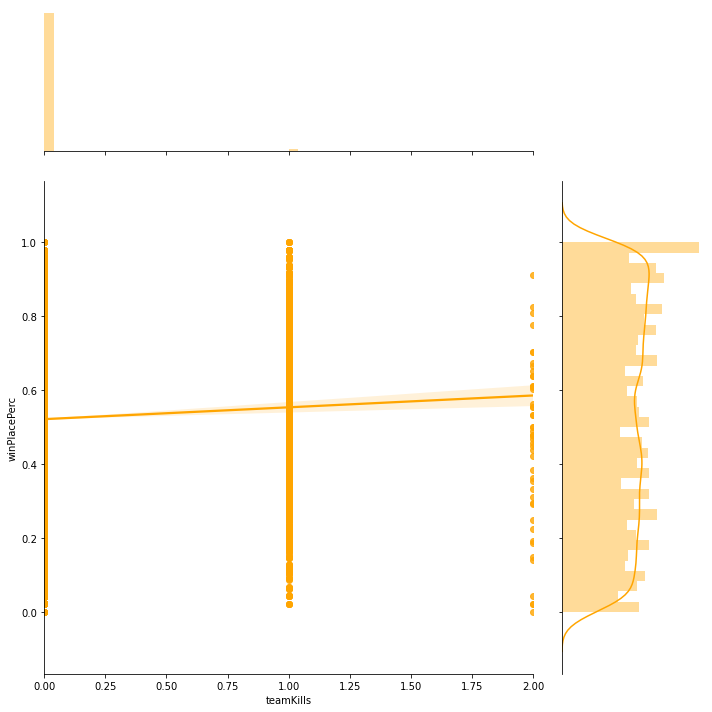

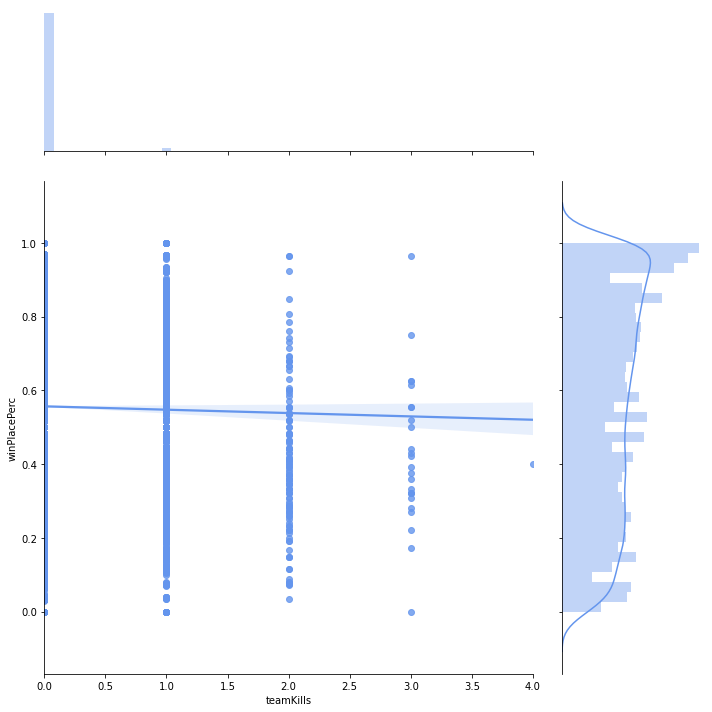

In [46]:
# teamKills与winPlacePerc之间的关系
sns.jointplot(x="teamKills", y="winPlacePerc", data=data2, height=10, ratio=3, color="orange",kind='reg')
sns.jointplot(x="teamKills", y="winPlacePerc", data=data3, height=10, ratio=3, color="cornflowerblue",kind='reg')
plt.show()

- 双排、四排不同击杀队友情况与winPlacePerc的关系比对

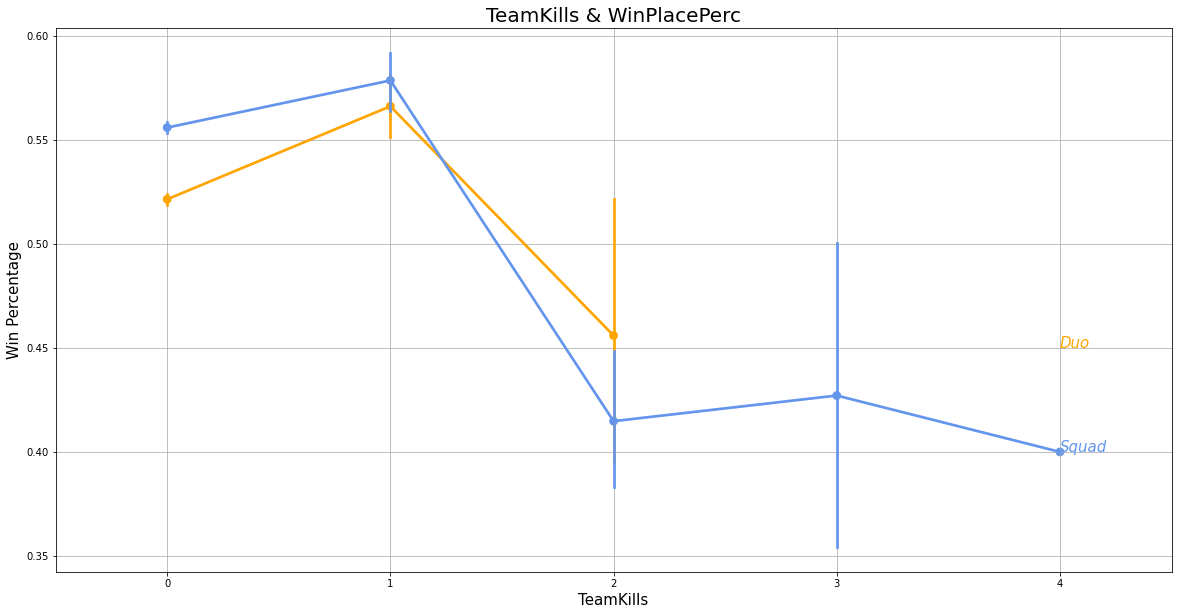

In [47]:
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='teamKills',y='winPlacePerc',data=data_cut2,color='orange',alpha=0.8)
sns.pointplot(x='teamKills',y='winPlacePerc',data=data_cut3,color='cornflowerblue',alpha=0.8)
plt.text(4,0.45,'Duo',color='orange',fontsize = 15,style = 'italic')
plt.text(4,0.4,'Squad',color='cornflowerblue',fontsize = 15,style = 'italic')
plt.xlabel('TeamKills',fontsize = 15,color='black')
plt.ylabel('Win Percentage',fontsize = 15,color='black')
plt.title('TeamKills & WinPlacePerc',fontsize = 20,color='black')
plt.grid()
plt.show()

- 双排、四排有无伤害队友的占比

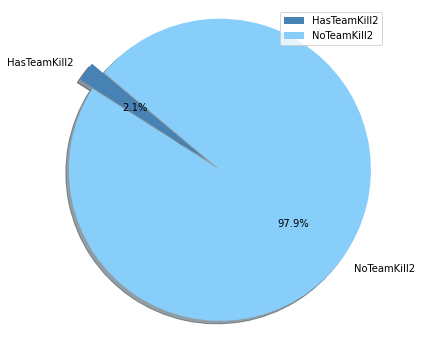

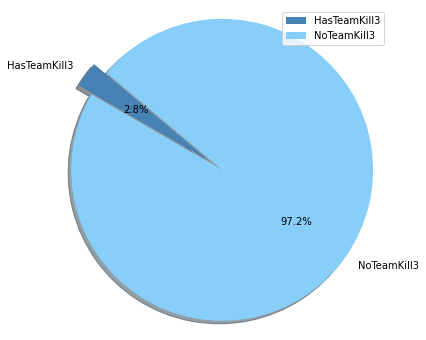

In [48]:
# 双排
HasTeamKill2=data2.teamKills[data2.teamKills>0].count()
NoTeamKill2=data2.teamKills[data2.teamKills == 0].count()
num2=data2.teamKills.count()
labels = 'HasTeamKill2', 'NoTeamKill2'
sizes = [HasTeamKill2/num2, NoTeamKill2/num2]
colors = ['steelblue', 'lightskyblue']
explode = (0.1, 0)  # explode 1st slice
plt.figure(figsize=(6,6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.legend()
plt.show()

# 四排
HasTeamKill3=data3.teamKills[data3.teamKills>0].count()
NoTeamKill3=data3.teamKills[data3.teamKills == 0].count()
num3=data3.teamKills.count()
labels = 'HasTeamKill3', 'NoTeamKill3'
sizes = [HasTeamKill3/num3, NoTeamKill3/num3]
colors = ['steelblue', 'lightskyblue']
explode = (0.1, 0)  # explode 1st slice
plt.figure(figsize=(6,6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.legend()
plt.show()

- 双排、四排有无伤害队友与吃鸡的情况比对

In [49]:
HasTeamKills2 = data2[data2['teamKills'] > 0].copy()
print("双排中有伤害队友行为的玩家中有{} 个玩家 ({:.4f}%) 最终成功吃鸡".format(len(HasTeamKills2[HasTeamKills2['winPlacePerc']==1]), 100*len(HasTeamKills2[HasTeamKills2['winPlacePerc']==1])/len(HasTeamKills2)))
NoTeamKills2 = data2[data2['teamKills'] == 0].copy()
print("双排中没有伤害队友行为的玩家中有{} 个玩家 ({:.4f}%) 最终成功吃鸡".format(len(NoTeamKills2[NoTeamKills2['winPlacePerc']==1]), 100*len(NoTeamKills2[NoTeamKills2['winPlacePerc']==1])/len(NoTeamKills2)))
print('\n')

HasTeamKills3 = data3[data3['teamKills'] > 0].copy()
print("四排中有伤害队友行为的玩家中有{} 个玩家 ({:.4f}%) 最终成功吃鸡".format(len(HasTeamKills3[HasTeamKills3['winPlacePerc']==1]), 100*len(HasTeamKills3[HasTeamKills3['winPlacePerc']==1])/len(HasTeamKills3)))
NoTeamKills3 = data3[data3['teamKills'] == 0].copy()
print("四排中没有伤害队友行为的玩家中有{} 个玩家 ({:.4f}%) 最终成功吃鸡".format(len(NoTeamKills3[NoTeamKills3['winPlacePerc']==1]), 100*len(NoTeamKills3[NoTeamKills3['winPlacePerc']==1])/len(NoTeamKills3)))

双排中有伤害队友行为的玩家中有5 个玩家 (0.4812%) 最终成功吃鸡
双排中没有伤害队友行为的玩家中有1212 个玩家 (2.4754%) 最终成功吃鸡


四排中有伤害队友行为的玩家中有27 个玩家 (1.9481%) 最终成功吃鸡
四排中没有伤害队友行为的玩家中有2612 个玩家 (5.3729%) 最终成功吃鸡


#### playersInGroup
- 双排、四排不同队伍人数分布情况

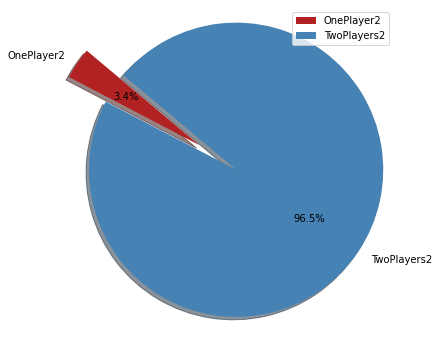

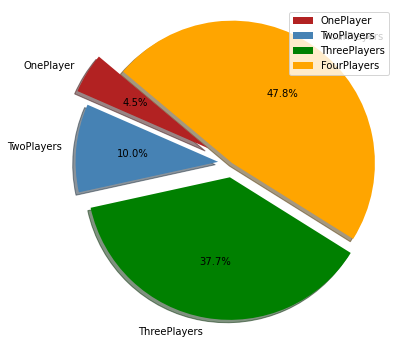

In [50]:
# 双排
OnePlayer2=data2.playersInGroup[data2.playersInGroup==1].count()
TwoPlayers2=data2.playersInGroup[data2.playersInGroup== 2].count()
num2=data2.playersInGroup.count()

labels = 'OnePlayer2', 'TwoPlayers2'
sizes = [OnePlayer2/num2, TwoPlayers2/num2]
colors = ['firebrick', 'steelblue']
explode = (0.2, 0.1)  # explode 1st slice

plt.figure(figsize=(6,6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.legend()
plt.show()

# 四排
OnePlayer=data3.playersInGroup[data3.playersInGroup==1].count()
TwoPlayers=data3.playersInGroup[data3.playersInGroup== 2].count()
ThreePlayer=data3.playersInGroup[data3.playersInGroup==3].count()
FourPlayers=data3.playersInGroup[data3.playersInGroup== 4].count()
num=data3.playersInGroup.count()

labels = 'OnePlayer', 'TwoPlayers', 'ThreePlayers' ,'FourPlayers'
sizes = [OnePlayer/num, TwoPlayers/num, ThreePlayer/num, FourPlayers/num]
colors = ['firebrick', 'steelblue', 'green', 'orange']
explode = (0.2, 0.1,0.1,0)  # explode 1st slice

plt.figure(figsize=(6,6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.legend()
plt.show()

- 双排、四排不同队伍人数与winPlacePerc的比对

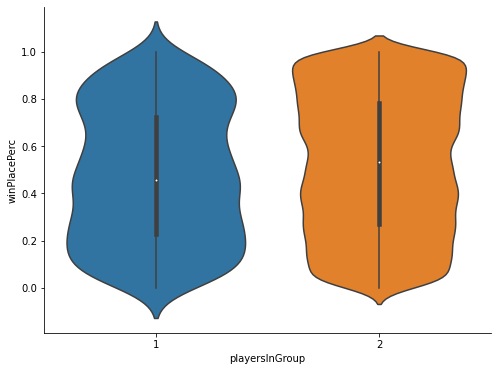

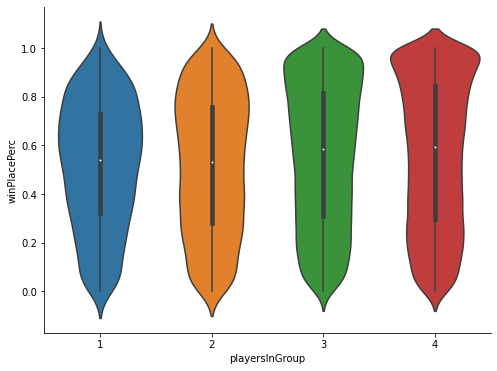

In [51]:
# 双排
plt.figure(figsize=(8,6))
sns.violinplot(data2['playersInGroup'], data2['winPlacePerc'])
sns.despine()
plt.show()

# 四排
plt.figure(figsize=(8,6))
sns.violinplot(data3['playersInGroup'], data3['winPlacePerc'])
sns.despine()
plt.show()

In [52]:
# 双排
One2=data_cut2[data_cut2.playersInGroup==1]
Two2=data_cut2[data_cut2.playersInGroup==2]
print("双排中一人队中有{} 玩家 ({:.2f}%) 可以赢得比赛".format(len(One2[One2['winPlacePerc']==1]), 100*len(One2[One2['winPlacePerc']==1])/len(One2)))
print("双排中二人队中有{} 玩家 ({:.2f}%) 可以赢得比赛".format(len(Two2[Two2['winPlacePerc']==1]), 100*len(Two2[Two2['winPlacePerc']==1])/len(Two2)))
print('\n')

# 四排
One=data_cut3[data_cut3.playersInGroup==1]
Two=data_cut3[data_cut3.playersInGroup==2]
Three=data_cut3[data_cut3.playersInGroup==3]
Four=data_cut3[data_cut3.playersInGroup==4]
print("四排中一人队中有{} 玩家 ({:.2f}%) 可以赢得比赛".format(len(One[One['winPlacePerc']==1]), 100*len(One[One['winPlacePerc']==1])/len(One)))
print("四排中二人队中有{} 玩家 ({:.2f}%) 可以赢得比赛".format(len(Two[Two['winPlacePerc']==1]), 100*len(Two[Two['winPlacePerc']==1])/len(Two)))
print("四排中三人队中有{} 玩家 ({:.2f}%) 可以赢得比赛".format(len(Three[Three['winPlacePerc']==1]), 100*len(Three[Three['winPlacePerc']==1])/len(Three)))
print("四排中四人队中有{} 玩家 ({:.2f}%) 可以赢得比赛".format(len(Four[Four['winPlacePerc']==1]), 100*len(Four[Four['winPlacePerc']==1])/len(Four)))

双排中一人队中有11 玩家 (0.64%) 可以赢得比赛
双排中二人队中有1206 玩家 (2.50%) 可以赢得比赛


四排中一人队中有16 玩家 (0.70%) 可以赢得比赛
四排中二人队中有73 玩家 (1.46%) 可以赢得比赛
四排中三人队中有788 玩家 (4.18%) 可以赢得比赛
四排中四人队中有1762 玩家 (7.37%) 可以赢得比赛


#### (4)物资
#### healthitems
- 与winPlacePerc的散点图和回归拟合

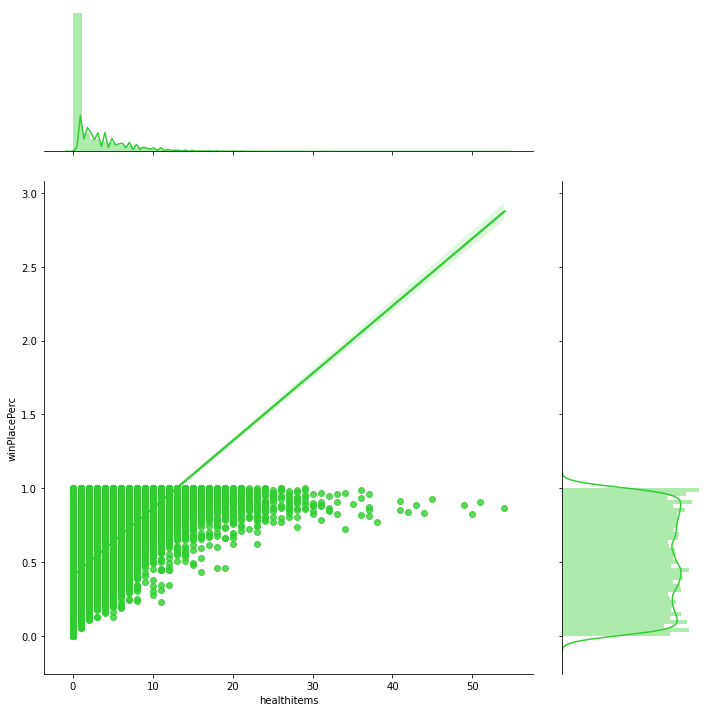

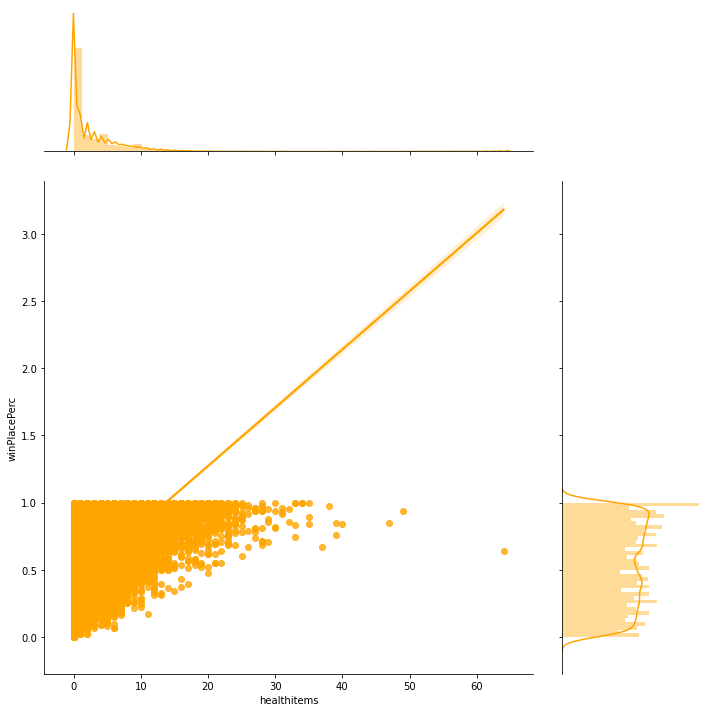

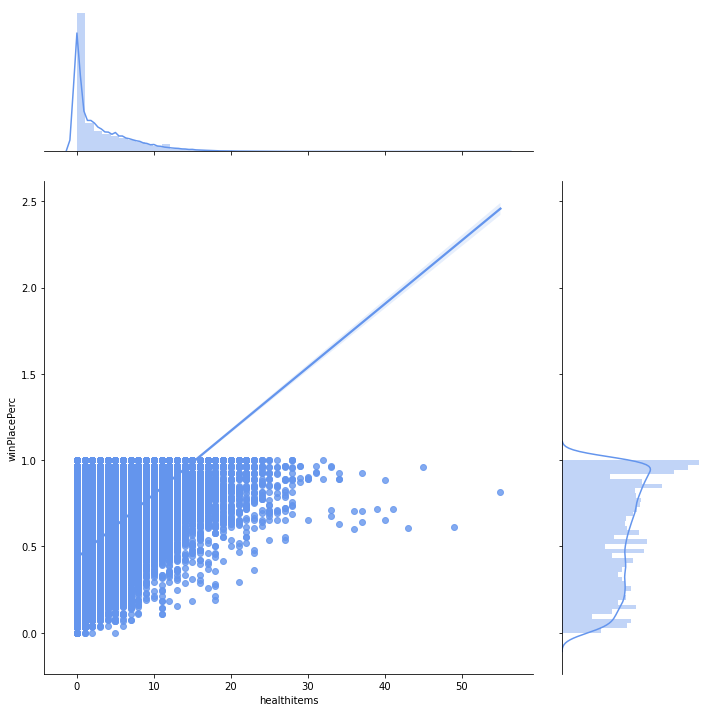

In [53]:
# headshotKills与winPlacePerc之间的关系
sns.jointplot(x="healthitems", y="winPlacePerc", data=data1, height=10, ratio=3, color="limegreen",kind='reg')
sns.jointplot(x="healthitems", y="winPlacePerc", data=data2, height=10, ratio=3, color="orange",kind='reg')
sns.jointplot(x="healthitems", y="winPlacePerc", data=data3, height=10, ratio=3, color="cornflowerblue",kind='reg')
plt.show()

- 单排、双排、四排不同物资情况与winPlacePerc的关系比对

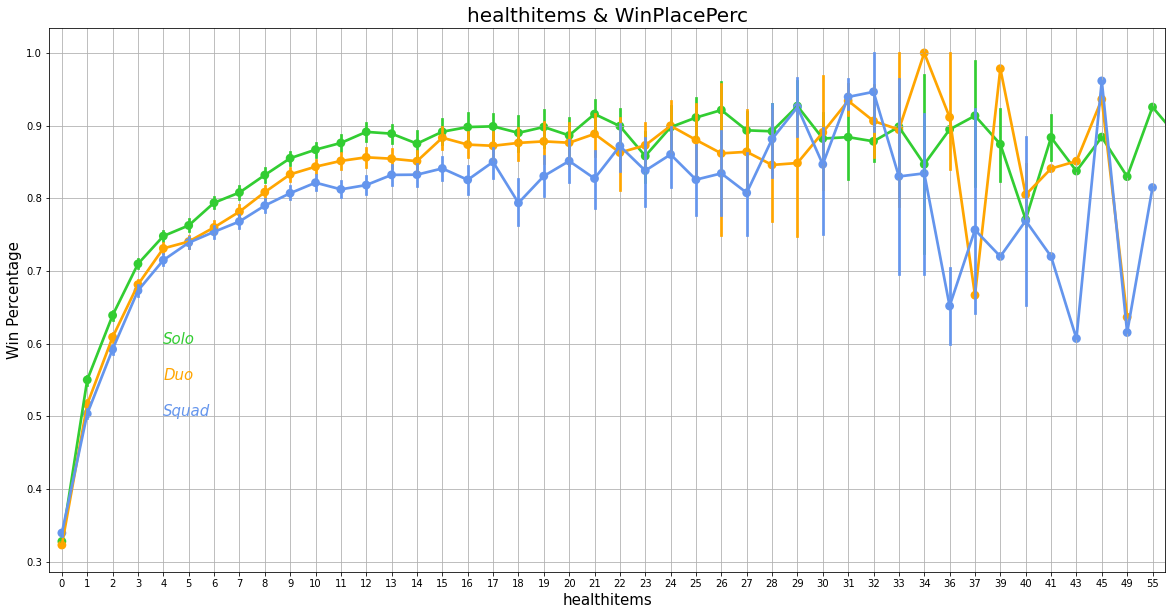

In [54]:
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='healthitems',y='winPlacePerc',data=data1,color='limegreen',alpha=0.8)
sns.pointplot(x='healthitems',y='winPlacePerc',data=data2,color='orange',alpha=0.8)
sns.pointplot(x='healthitems',y='winPlacePerc',data=data3,color='cornflowerblue',alpha=0.8)
plt.text(4,0.6,'Solo',color='limegreen',fontsize = 15,style = 'italic')
plt.text(4,0.55,'Duo',color='orange',fontsize = 15,style = 'italic')
plt.text(4,0.5,'Squad',color='cornflowerblue',fontsize = 15,style = 'italic')
plt.xlabel('healthitems',fontsize = 15,color='black')
plt.ylabel('Win Percentage',fontsize = 15,color='black')
plt.title('healthitems & WinPlacePerc',fontsize = 20,color='black')
plt.grid()
plt.show()

#### weaponsAcquired
- 与winPlacePerc的散点图和回归拟合

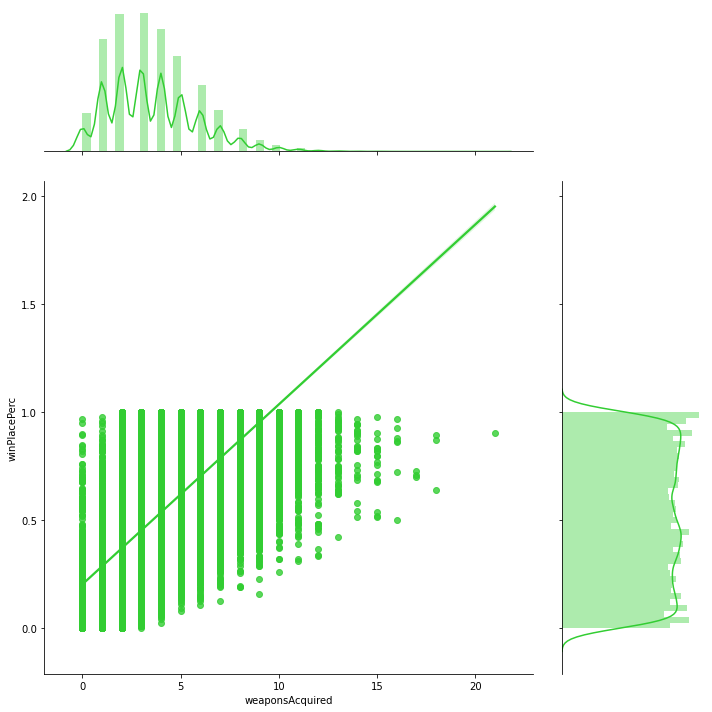

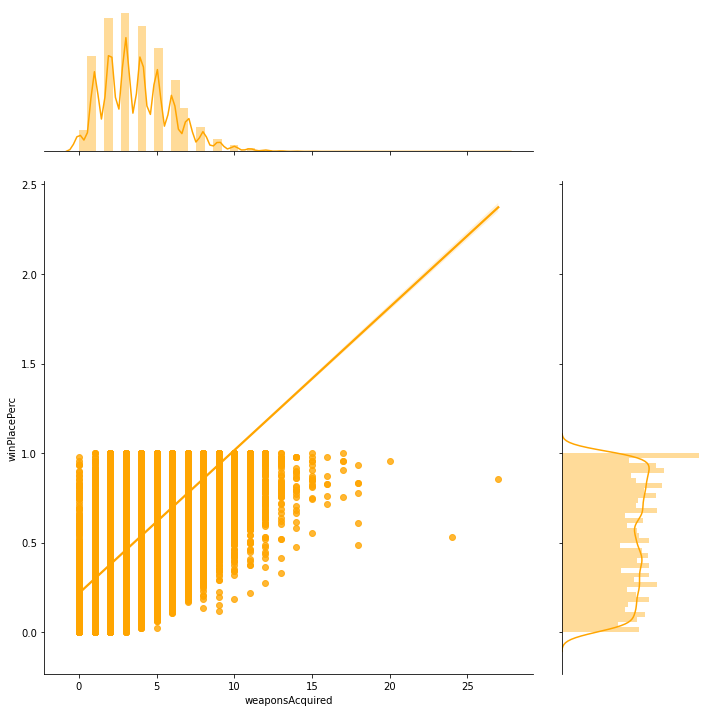

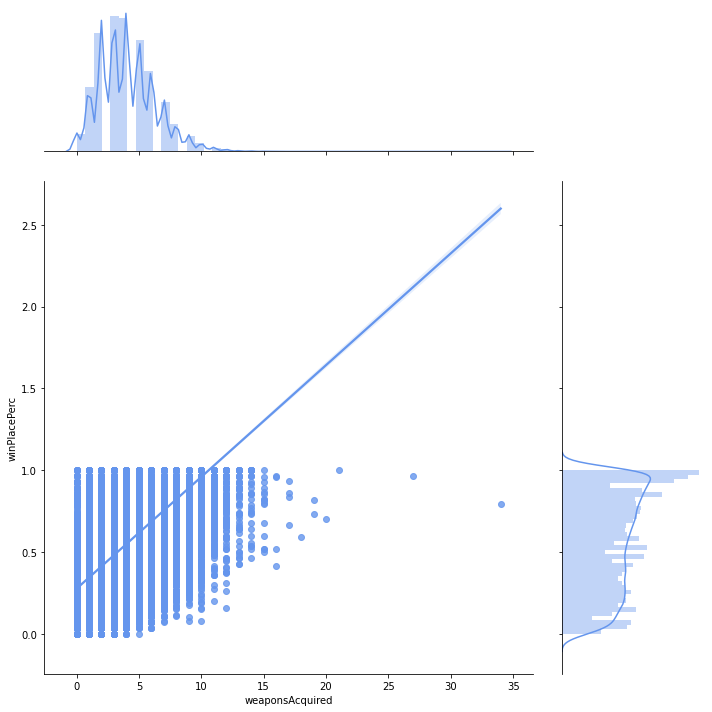

In [55]:
# weaponsAcquired
sns.jointplot(x="weaponsAcquired", y="winPlacePerc", data=data1, height=10, ratio=3, color="limegreen",kind='reg')
sns.jointplot(x="weaponsAcquired", y="winPlacePerc", data=data2, height=10, ratio=3, color="orange",kind='reg')
sns.jointplot(x="weaponsAcquired", y="winPlacePerc", data=data3, height=10, ratio=3, color="cornflowerblue",kind='reg')
plt.show()

- 单排、双排、四排不同武器获取情况与winPlacePerc的关系比对

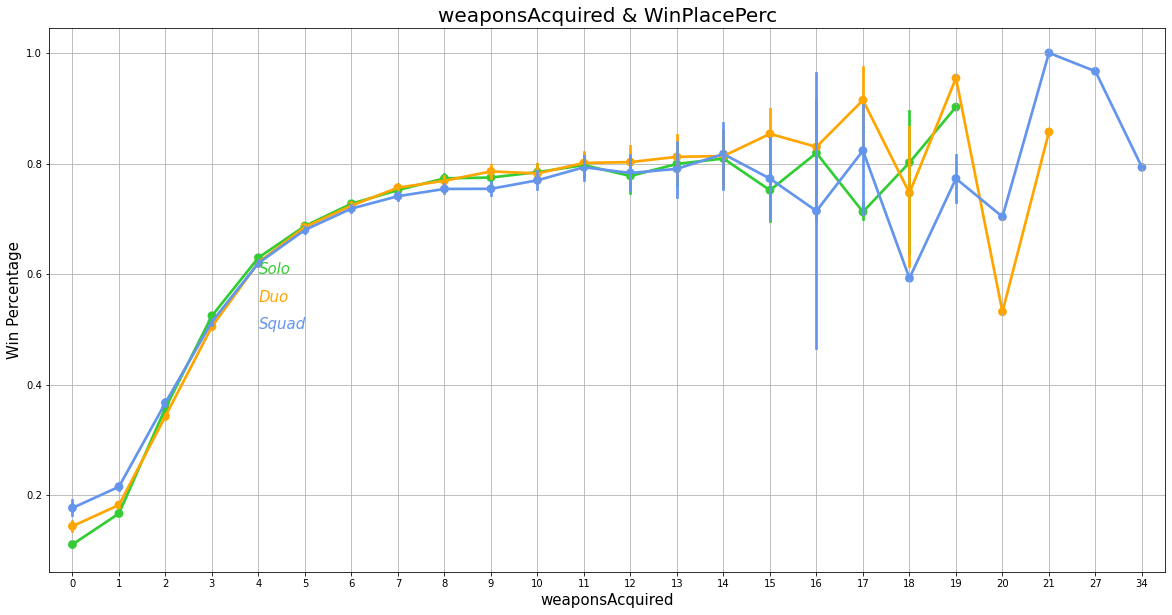

In [56]:
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='weaponsAcquired',y='winPlacePerc',data=data1,color='limegreen',alpha=0.8)
sns.pointplot(x='weaponsAcquired',y='winPlacePerc',data=data2,color='orange',alpha=0.8)
sns.pointplot(x='weaponsAcquired',y='winPlacePerc',data=data3,color='cornflowerblue',alpha=0.8)
plt.text(4,0.6,'Solo',color='limegreen',fontsize = 15,style = 'italic')
plt.text(4,0.55,'Duo',color='orange',fontsize = 15,style = 'italic')
plt.text(4,0.5,'Squad',color='cornflowerblue',fontsize = 15,style = 'italic')
plt.xlabel('weaponsAcquired',fontsize = 15,color='black')
plt.ylabel('Win Percentage',fontsize = 15,color='black')
plt.title('weaponsAcquired & WinPlacePerc',fontsize = 20,color='black')
plt.grid()
plt.show()

#### boosts
- 与winPlacePerc的散点图和回归拟合

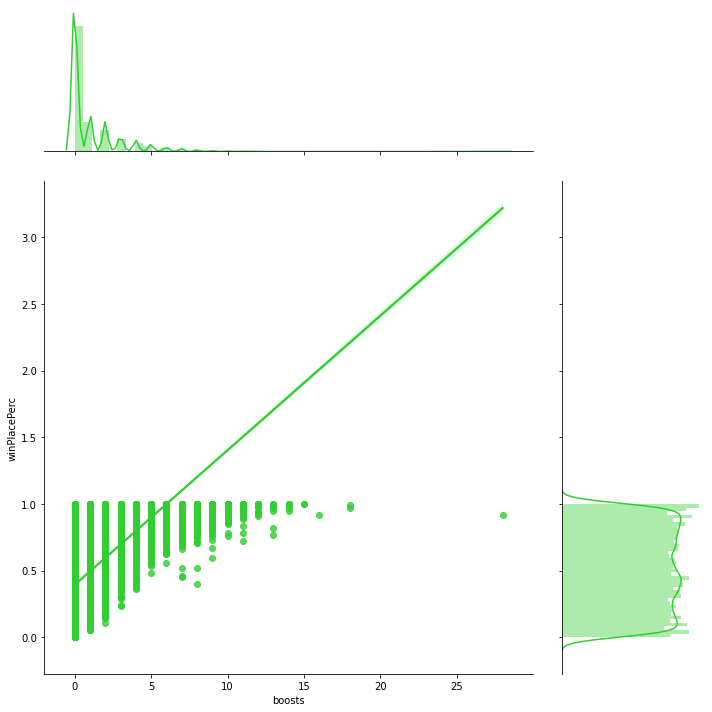

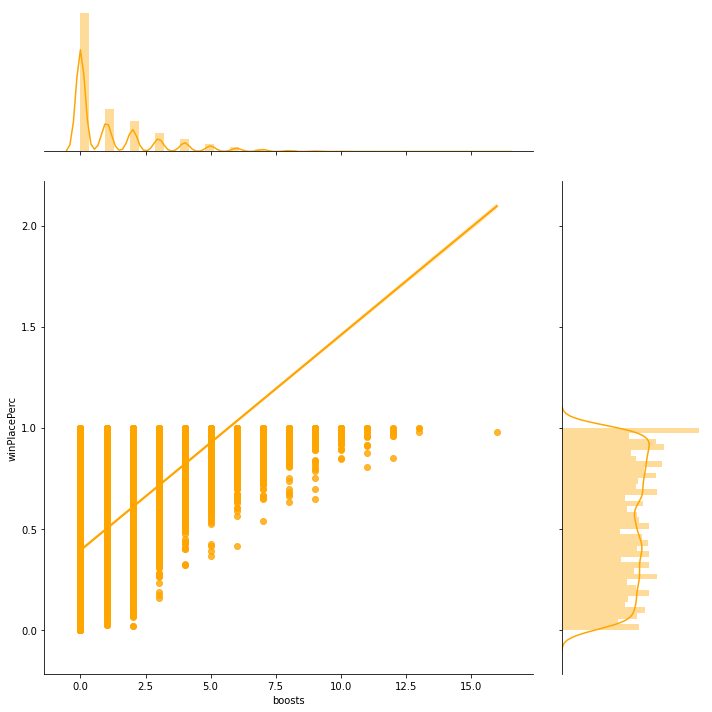

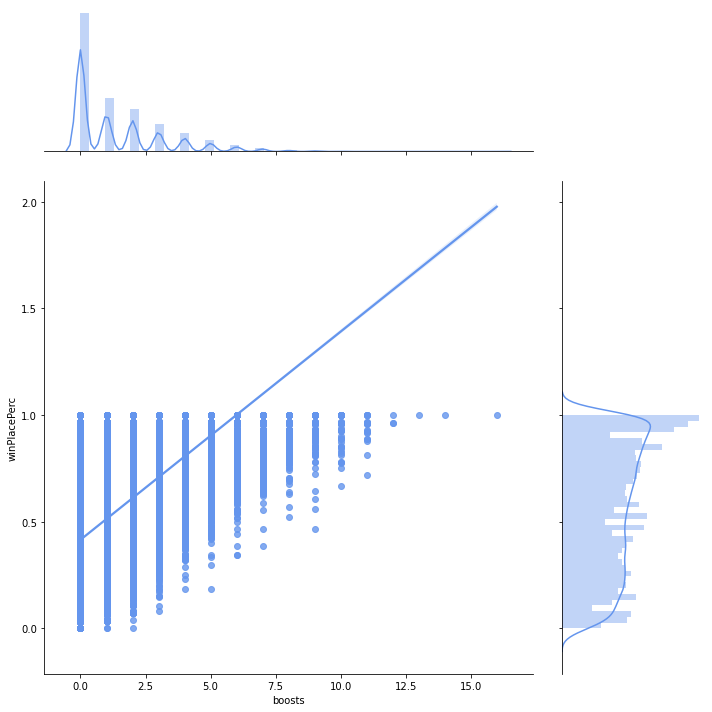

In [57]:
# boosts
sns.jointplot(x="boosts", y="winPlacePerc", data=data1, height=10, ratio=3, color="limegreen",kind='reg')
sns.jointplot(x="boosts", y="winPlacePerc", data=data2, height=10, ratio=3, color="orange",kind='reg')
sns.jointplot(x="boosts", y="winPlacePerc", data=data3, height=10, ratio=3, color="cornflowerblue",kind='reg')
plt.show()

- 单排、双排、四排不同提升类物资使用情况与winPlacePerc的关系比对

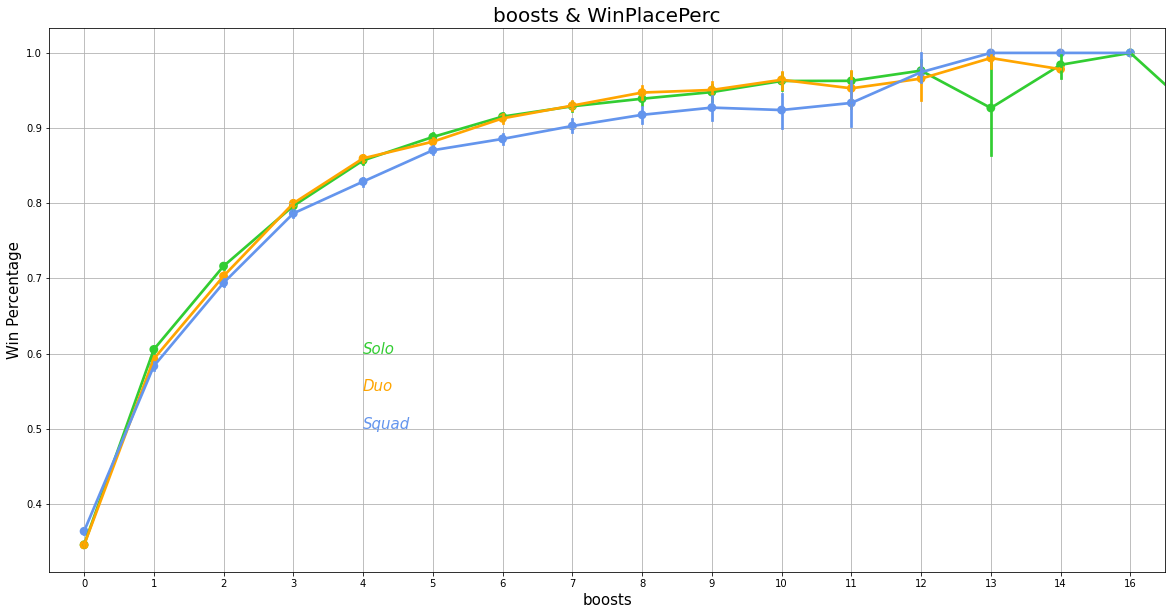

In [58]:
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='boosts',y='winPlacePerc',data=data1,color='limegreen',alpha=0.8)
sns.pointplot(x='boosts',y='winPlacePerc',data=data2,color='orange',alpha=0.8)
sns.pointplot(x='boosts',y='winPlacePerc',data=data3,color='cornflowerblue',alpha=0.8)
plt.text(4,0.6,'Solo',color='limegreen',fontsize = 15,style = 'italic')
plt.text(4,0.55,'Duo',color='orange',fontsize = 15,style = 'italic')
plt.text(4,0.5,'Squad',color='cornflowerblue',fontsize = 15,style = 'italic')
plt.xlabel('boosts',fontsize = 15,color='black')
plt.ylabel('Win Percentage',fontsize = 15,color='black')
plt.title('boosts & WinPlacePerc',fontsize = 20,color='black')
plt.grid()
plt.show()

#### heals
- 与winPlacePerc的散点图和回归拟合

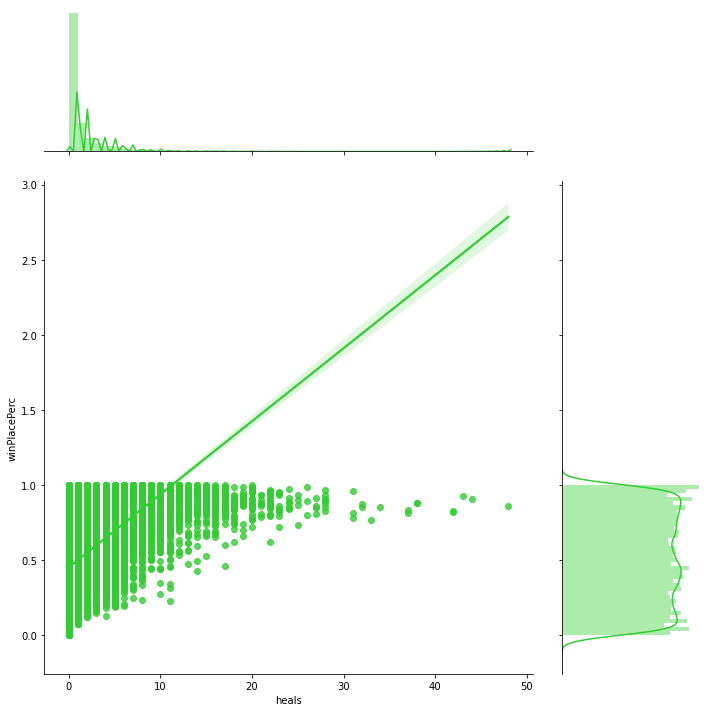

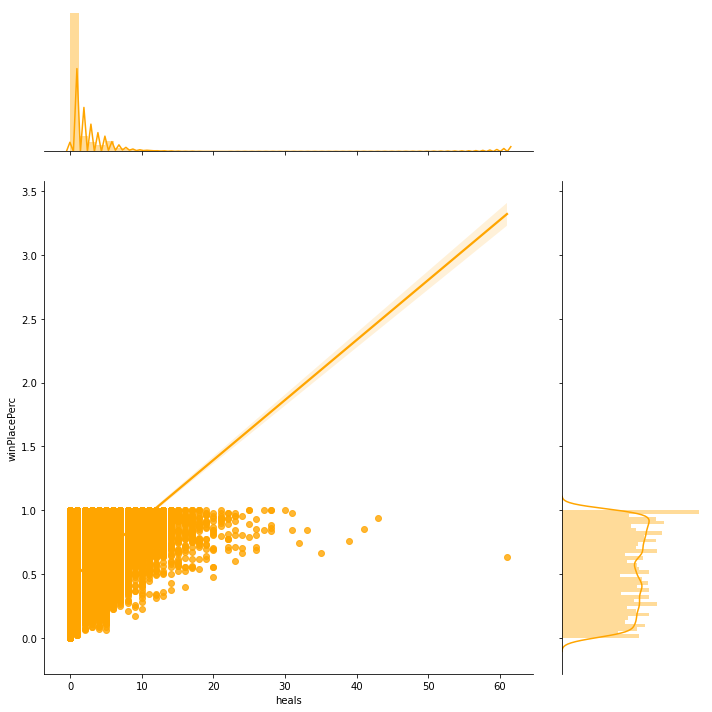

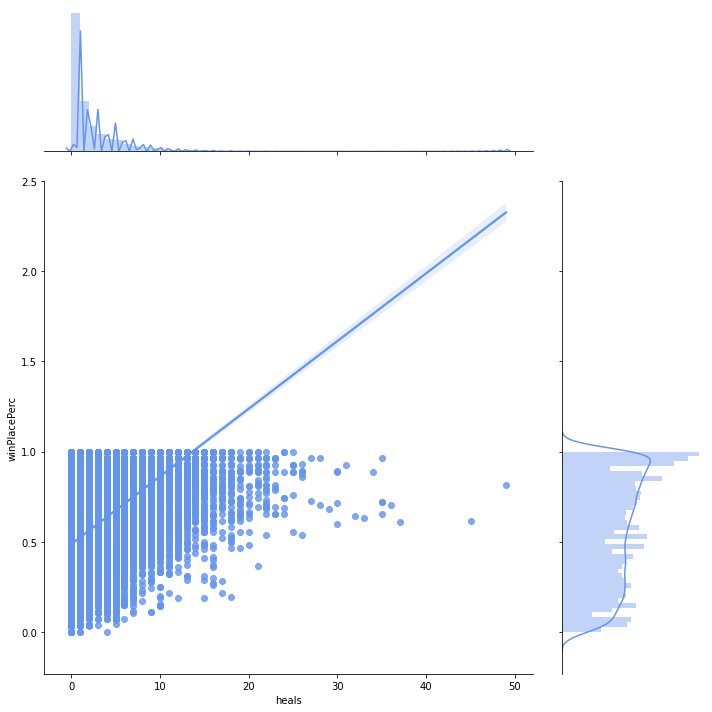

In [59]:
# heals
sns.jointplot(x="heals", y="winPlacePerc", data=data1, height=10, ratio=3, color="limegreen",kind='reg')
sns.jointplot(x="heals", y="winPlacePerc", data=data2, height=10, ratio=3, color="orange",kind='reg')
sns.jointplot(x="heals", y="winPlacePerc", data=data3, height=10, ratio=3, color="cornflowerblue",kind='reg')
plt.show()

- 单排、双排、四排不同救援类物资使用情况与winPlacePerc的关系比对

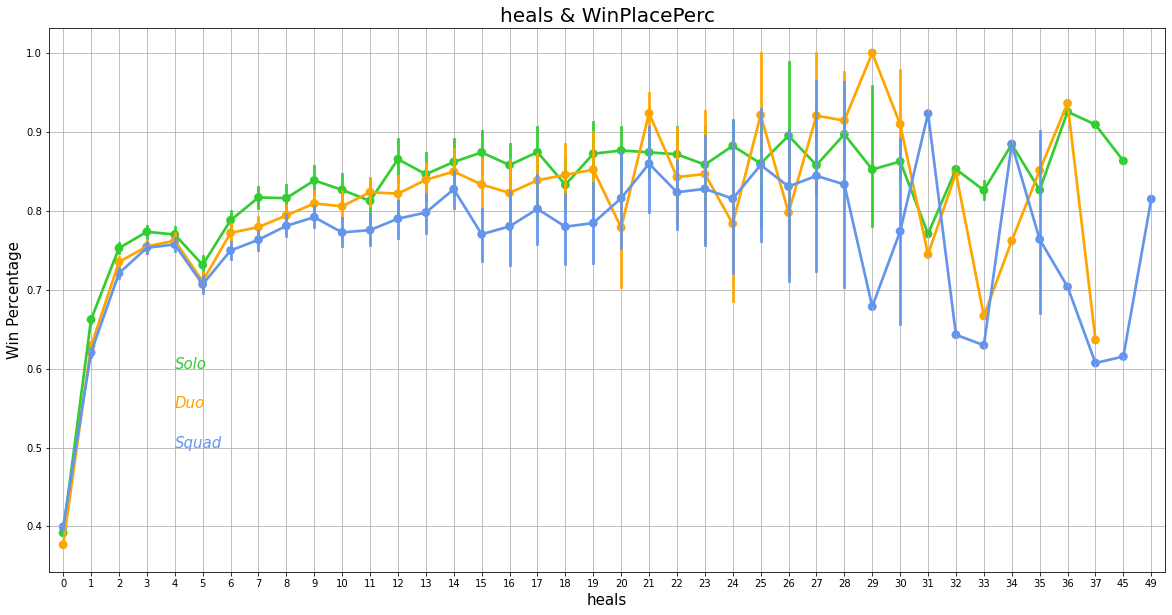

In [60]:
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='heals',y='winPlacePerc',data=data1,color='limegreen',alpha=0.8)
sns.pointplot(x='heals',y='winPlacePerc',data=data2,color='orange',alpha=0.8)
sns.pointplot(x='heals',y='winPlacePerc',data=data3,color='cornflowerblue',alpha=0.8)
plt.text(4,0.6,'Solo',color='limegreen',fontsize = 15,style = 'italic')
plt.text(4,0.55,'Duo',color='orange',fontsize = 15,style = 'italic')
plt.text(4,0.5,'Squad',color='cornflowerblue',fontsize = 15,style = 'italic')
plt.xlabel('heals',fontsize = 15,color='black')
plt.ylabel('Win Percentage',fontsize = 15,color='black')
plt.title('heals & WinPlacePerc',fontsize = 20,color='black')
plt.grid()
plt.show()

- 单排、双排、四排heals 、 boosts 、 weaponsAcquired对于最后排名的影响

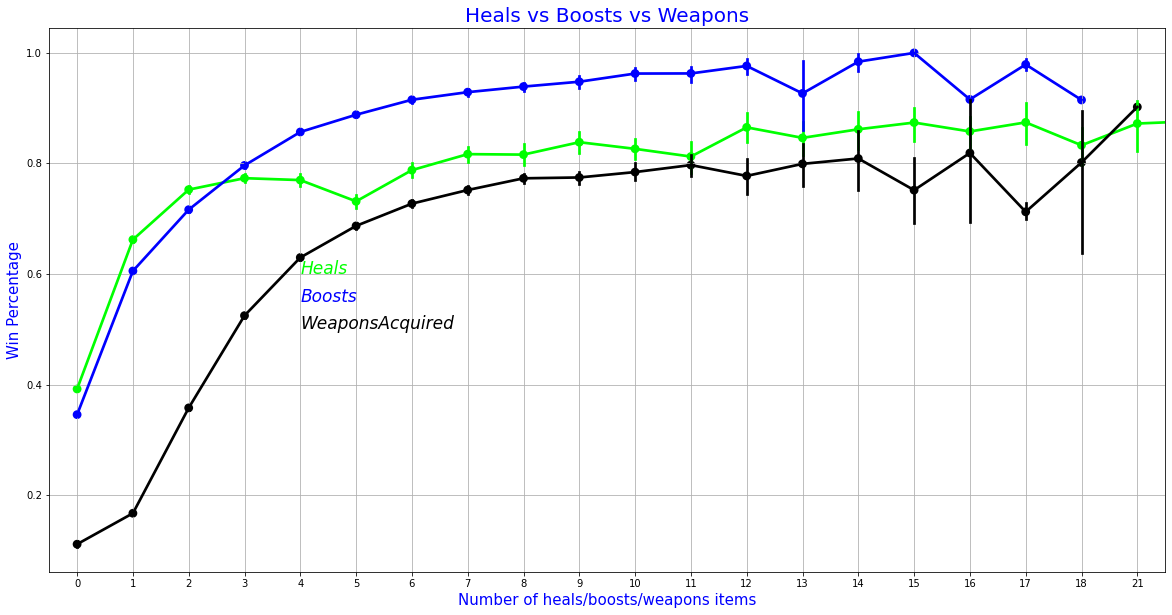

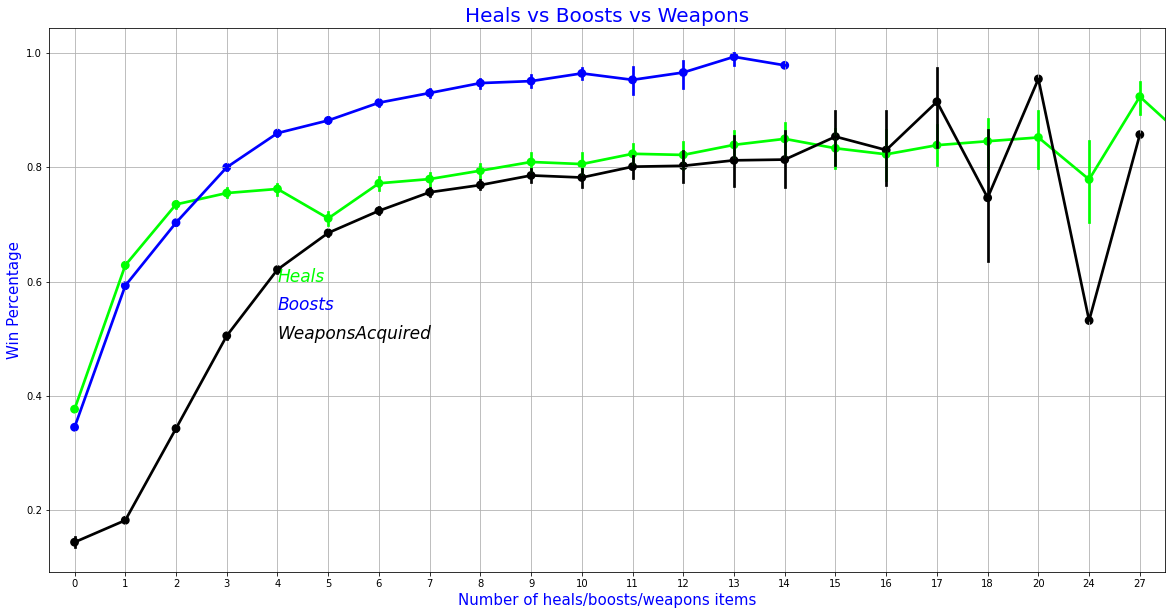

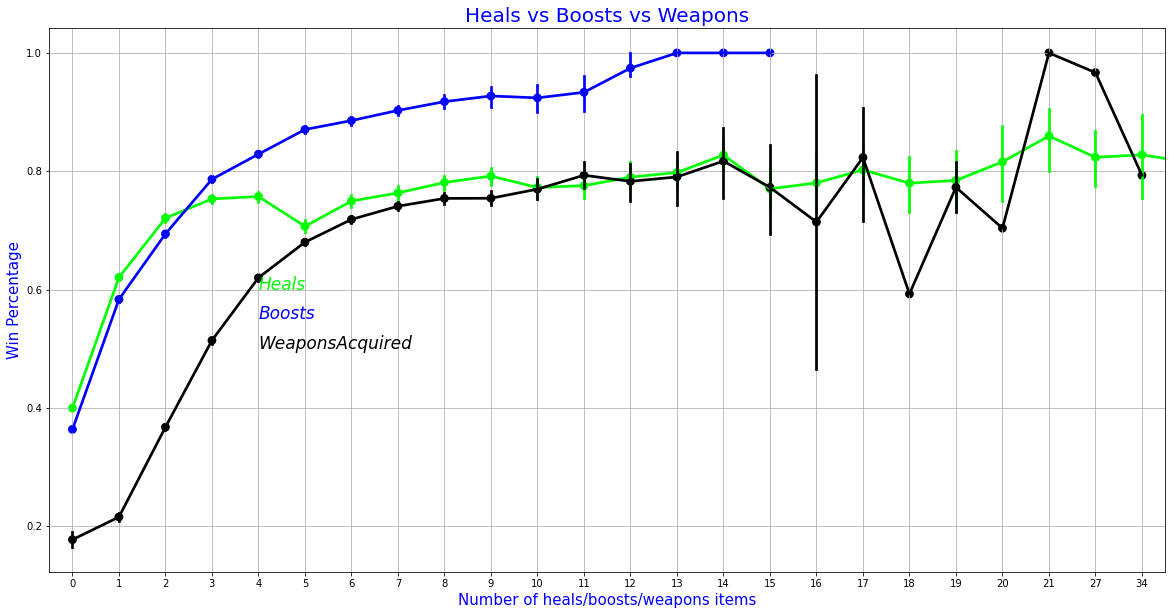

In [61]:
# 单排
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='heals',y='winPlacePerc',data=data1,color='lime',alpha=0.8)
sns.pointplot(x='boosts',y='winPlacePerc',data=data1,color='blue',alpha=0.8)
sns.pointplot(x='weaponsAcquired',y='winPlacePerc',data=data1,color='black',alpha=0.8)
plt.text(4,0.6,'Heals',color='lime',fontsize = 17,style = 'italic')
plt.text(4,0.55,'Boosts',color='blue',fontsize = 17,style = 'italic')
plt.text(4,0.5,'WeaponsAcquired',color='black',fontsize = 17,style = 'italic')
plt.xlabel('Number of heals/boosts/weapons items',fontsize = 15,color='blue')
plt.ylabel('Win Percentage',fontsize = 15,color='blue')
plt.title('Heals vs Boosts vs Weapons',fontsize = 20,color='blue')
plt.grid()
plt.show()

# 双排
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='heals',y='winPlacePerc',data=data2,color='lime',alpha=0.8)
sns.pointplot(x='boosts',y='winPlacePerc',data=data2,color='blue',alpha=0.8)
sns.pointplot(x='weaponsAcquired',y='winPlacePerc',data=data2,color='black',alpha=0.8)
plt.text(4,0.6,'Heals',color='lime',fontsize = 17,style = 'italic')
plt.text(4,0.55,'Boosts',color='blue',fontsize = 17,style = 'italic')
plt.text(4,0.5,'WeaponsAcquired',color='black',fontsize = 17,style = 'italic')
plt.xlabel('Number of heals/boosts/weapons items',fontsize = 15,color='blue')
plt.ylabel('Win Percentage',fontsize = 15,color='blue')
plt.title('Heals vs Boosts vs Weapons',fontsize = 20,color='blue')
plt.grid()
plt.show()

# 四排
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='heals',y='winPlacePerc',data=data3,color='lime',alpha=0.8)
sns.pointplot(x='boosts',y='winPlacePerc',data=data3,color='blue',alpha=0.8)
sns.pointplot(x='weaponsAcquired',y='winPlacePerc',data=data3,color='black',alpha=0.8)
plt.text(4,0.6,'Heals',color='lime',fontsize = 17,style = 'italic')
plt.text(4,0.55,'Boosts',color='blue',fontsize = 17,style = 'italic')
plt.text(4,0.5,'WeaponsAcquired',color='black',fontsize = 17,style = 'italic')
plt.xlabel('Number of heals/boosts/weapons items',fontsize = 15,color='blue')
plt.ylabel('Win Percentage',fontsize = 15,color='blue')
plt.title('Heals vs Boosts vs Weapons',fontsize = 20,color='blue')
plt.grid()
plt.show()

#### weaponsPerDistance

- 与winPlacePerc的散点图和回归拟合

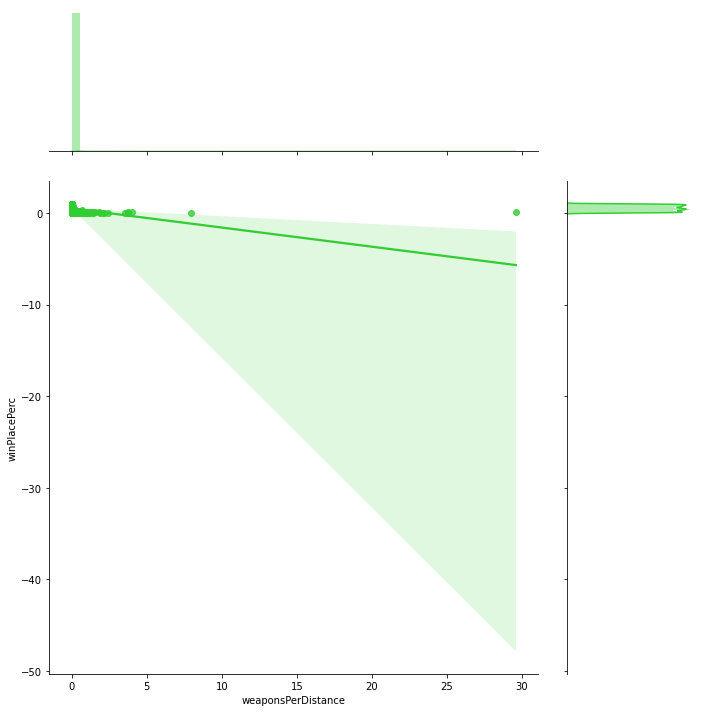

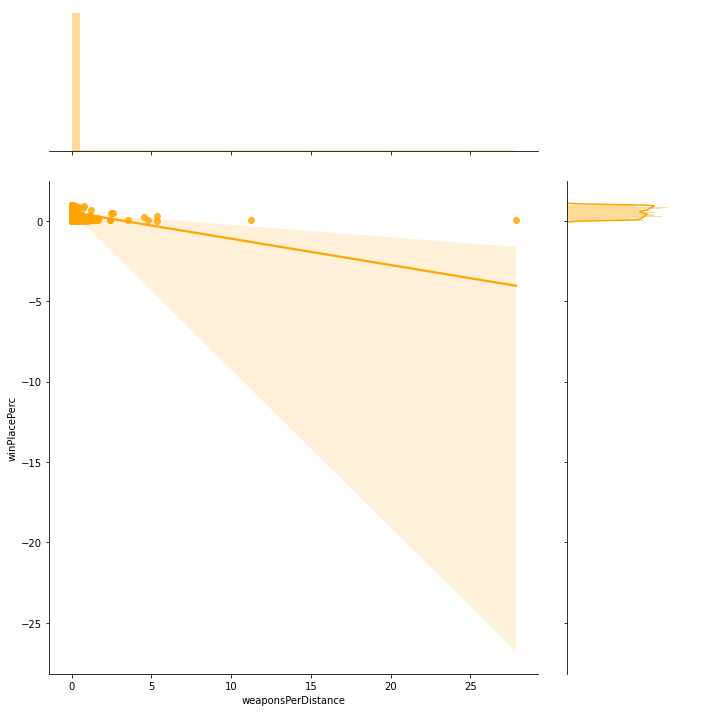

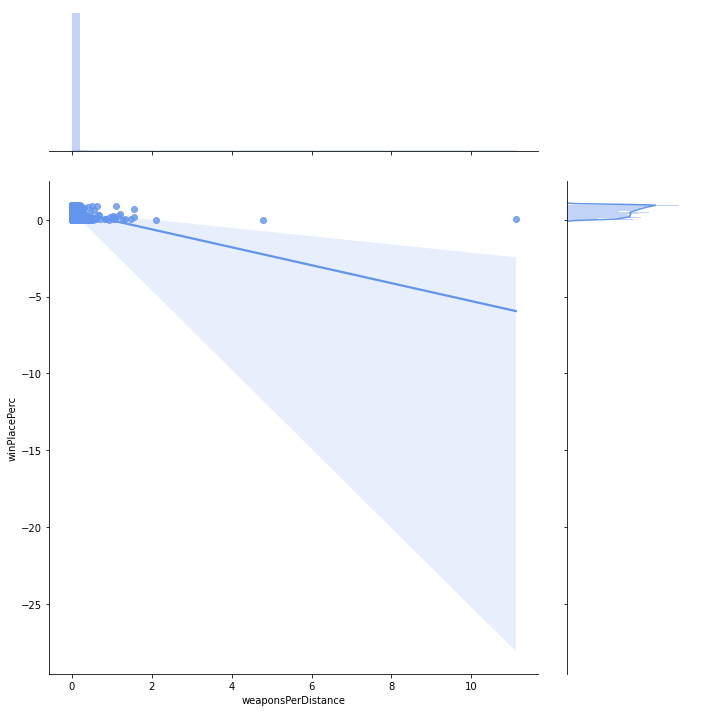

In [62]:
sns.jointplot(x="weaponsPerDistance", y="winPlacePerc", data=data1, height=10, ratio=3, color="limegreen",kind='reg')
sns.jointplot(x="weaponsPerDistance", y="winPlacePerc", data=data2, height=10, ratio=3, color="orange",kind='reg')
sns.jointplot(x="weaponsPerDistance", y="winPlacePerc", data=data3, height=10, ratio=3, color="cornflowerblue",kind='reg')
plt.show()

- 单排、双排、四排每单位移动距离所获武器数水平对比

In [63]:
print("单排每单位移动距离所获武器数水平：",data1['weaponsPerDistance'].describe())
print("双排每单位移动距离所获武器数水平：",data2['weaponsPerDistance'].describe())
print("四排每单位移动距离所获武器数水平：",data3['weaponsPerDistance'].describe())

单排每单位移动距离所获武器数水平： count    50000.000000
mean         0.016038
std          0.147840
min          0.000000
25%          0.001716
50%          0.004448
75%          0.014665
max         29.585799
Name: weaponsPerDistance, dtype: float64
双排每单位移动距离所获武器数水平： count    50000.000000
mean         0.012560
std          0.148803
min          0.000000
25%          0.001483
50%          0.003454
75%          0.010604
max         27.855153
Name: weaponsPerDistance, dtype: float64
四排每单位移动距离所获武器数水平： count    50000.000000
mean         0.008500
std          0.062225
min          0.000000
25%          0.001258
50%          0.002452
75%          0.007307
max         11.111111
Name: weaponsPerDistance, dtype: float64


#### healsPerDistance
- 与winPlacePerc的散点图和回归拟合

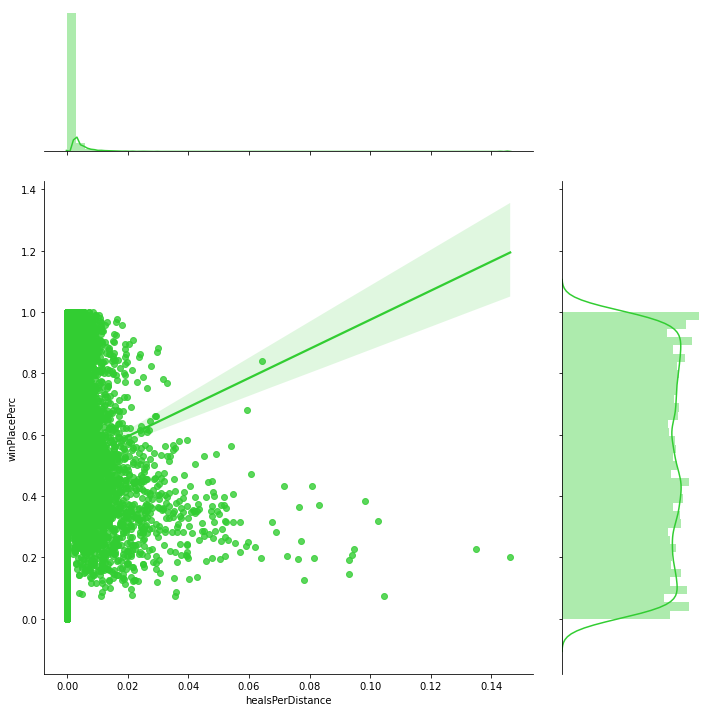

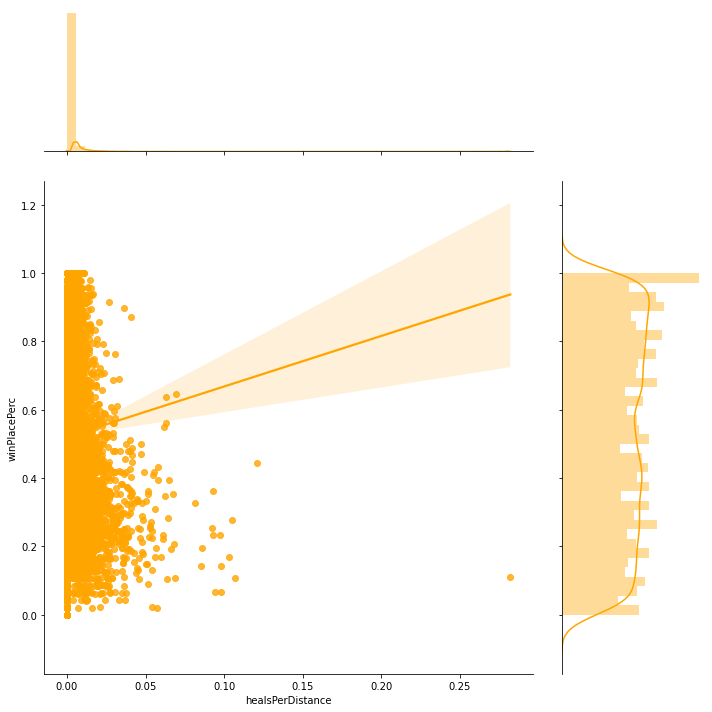

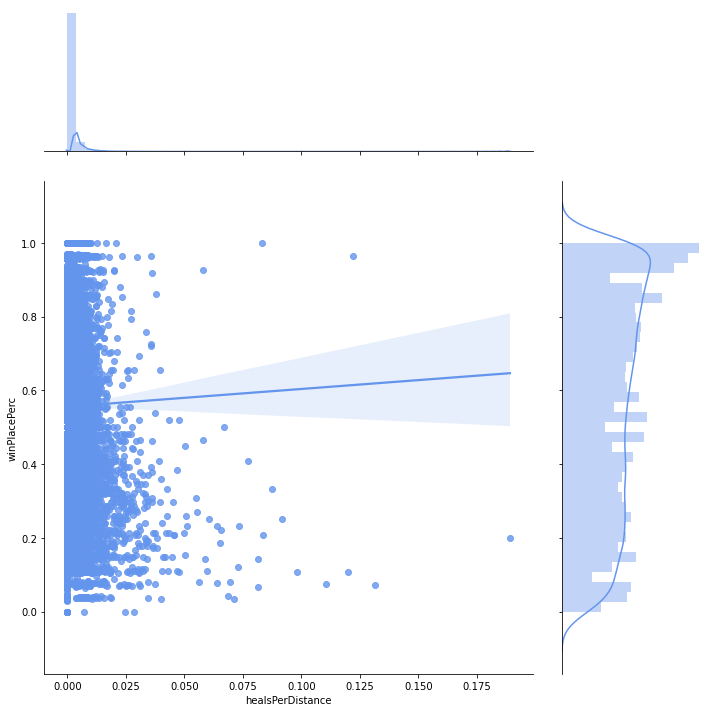

In [64]:
sns.jointplot(x="healsPerDistance", y="winPlacePerc", data=data1, height=10, ratio=3, color="limegreen",kind='reg')
sns.jointplot(x="healsPerDistance", y="winPlacePerc", data=data2, height=10, ratio=3, color="orange",kind='reg')
sns.jointplot(x="healsPerDistance", y="winPlacePerc", data=data3, height=10, ratio=3, color="cornflowerblue",kind='reg')
plt.show()

- 单排、双排、四排每单位移动距离所获能量型物资数水平对比

In [65]:
print("单排每单位移动距离所获能量型物资数水平：",data1['healsPerDistance'].describe())
print("双排每单位移动距离所获能量型物资数水平：",data2['healsPerDistance'].describe())
print("四排每单位移动距离所获能量型物资数水平：",data3['healsPerDistance'].describe())

单排每单位移动距离所获能量型物资数水平： count    50000.000000
mean         0.001118
std          0.003835
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000805
max          0.146199
Name: healsPerDistance, dtype: float64
双排每单位移动距离所获能量型物资数水平： count    50000.000000
mean         0.001389
std          0.004233
min          0.000000
25%          0.000000
50%          0.000000
75%          0.001268
max          0.282008
Name: healsPerDistance, dtype: float64
四排每单位移动距离所获能量型物资数水平： count    50000.000000
mean         0.001389
std          0.003676
min          0.000000
25%          0.000000
50%          0.000302
75%          0.001471
max          0.189179
Name: healsPerDistance, dtype: float64


#### distance_over_weapons
- 与winPlacePerc的散点图和回归拟合

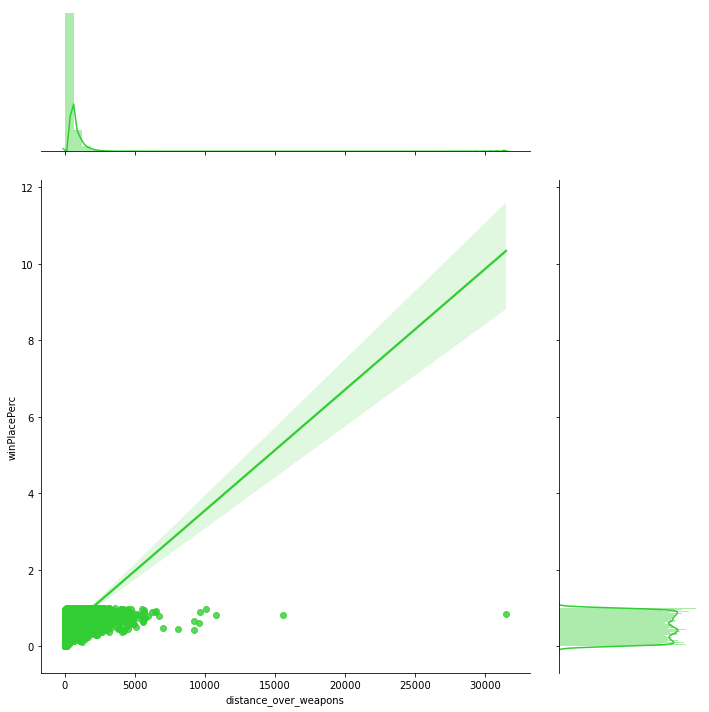

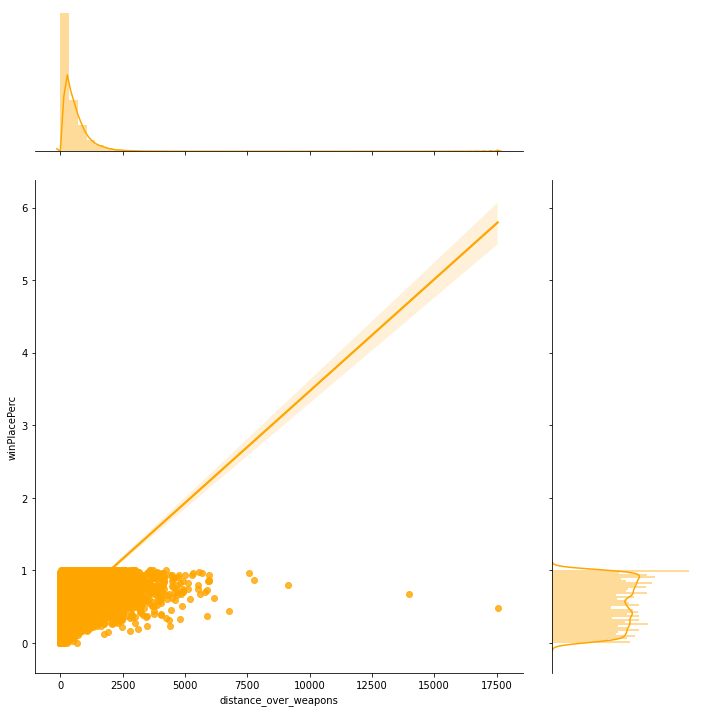

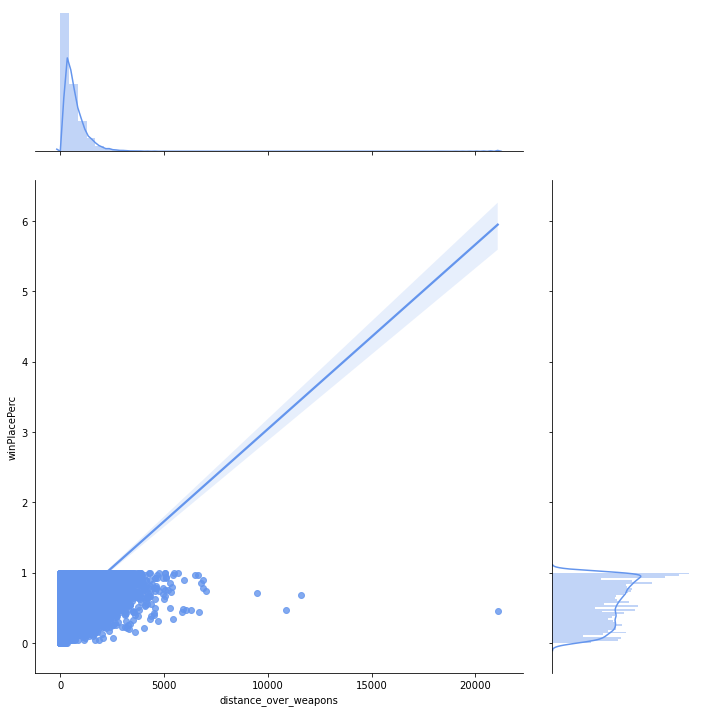

In [66]:
sns.jointplot(x="distance_over_weapons", y="winPlacePerc", data=data1, height=10, ratio=3, color="limegreen",kind='reg')
sns.jointplot(x="distance_over_weapons", y="winPlacePerc", data=data2, height=10, ratio=3, color="orange",kind='reg')
sns.jointplot(x="distance_over_weapons", y="winPlacePerc", data=data3, height=10, ratio=3, color="cornflowerblue",kind='reg')
plt.show()

- 单排、双排、四排获得武器所需移动平均距离水平对比

In [67]:
print("单排获得武器所需移动平均距离水平：",data1['distance_over_weapons'].describe())
print("双排获得武器所需移动平均距离水平：",data2['distance_over_weapons'].describe())
print("四排获得武器所需移动平均距离水平：",data3['distance_over_weapons'].describe())

单排获得武器所需移动平均距离水平： count    50000.000000
mean       347.572260
std        498.165966
min          0.000000
25%         51.857500
50%        175.130679
75%        476.152917
max      31464.100000
Name: distance_over_weapons, dtype: float64
双排获得武器所需移动平均距离水平： count    50000.000000
mean       437.942250
std        531.542046
min          0.000000
25%         82.600000
50%        257.100000
75%        615.100000
max      17544.100000
Name: distance_over_weapons, dtype: float64
四排获得武器所需移动平均距离水平： count    50000.000000
mean       532.514026
std        571.995884
min          0.000000
25%        121.131250
50%        379.630833
75%        744.745000
max      21079.300000
Name: distance_over_weapons, dtype: float64


#### distance_over_heals
- 与winPlacePerc的散点图和回归拟合

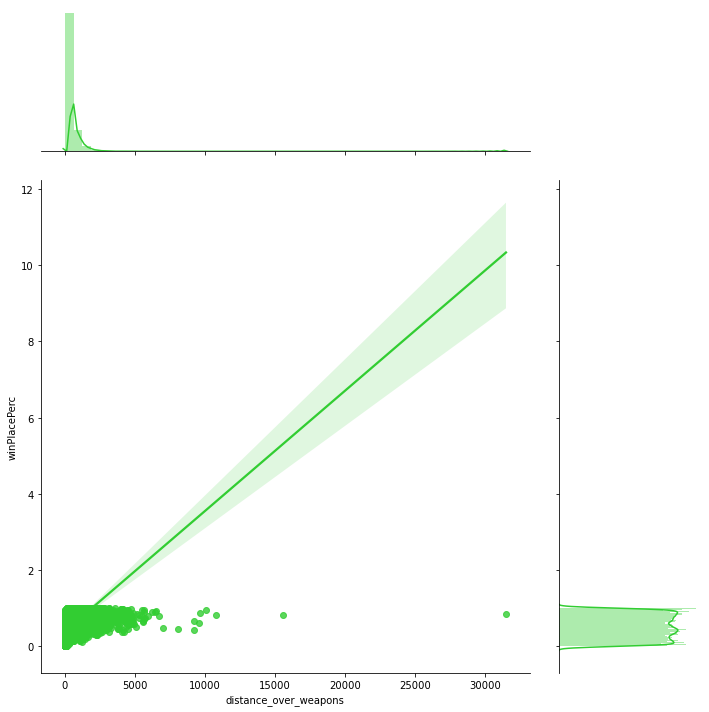

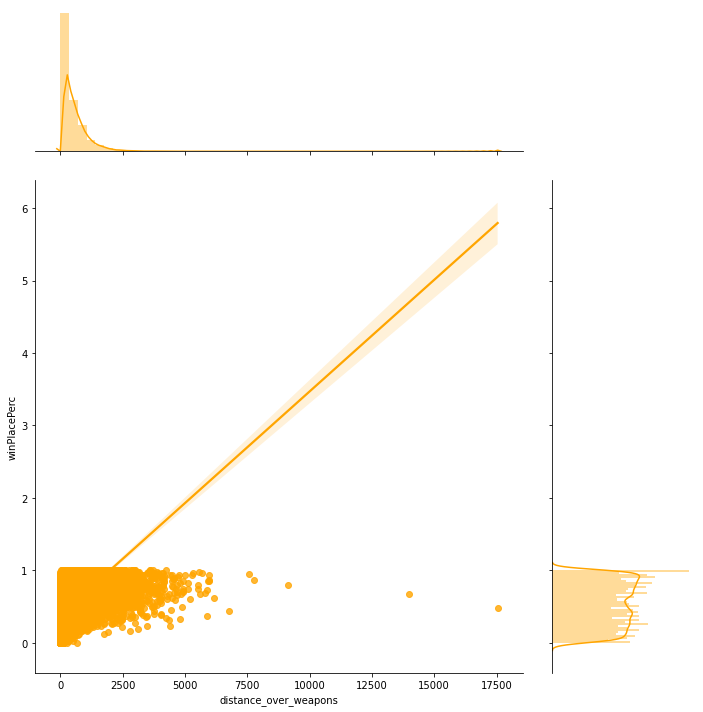

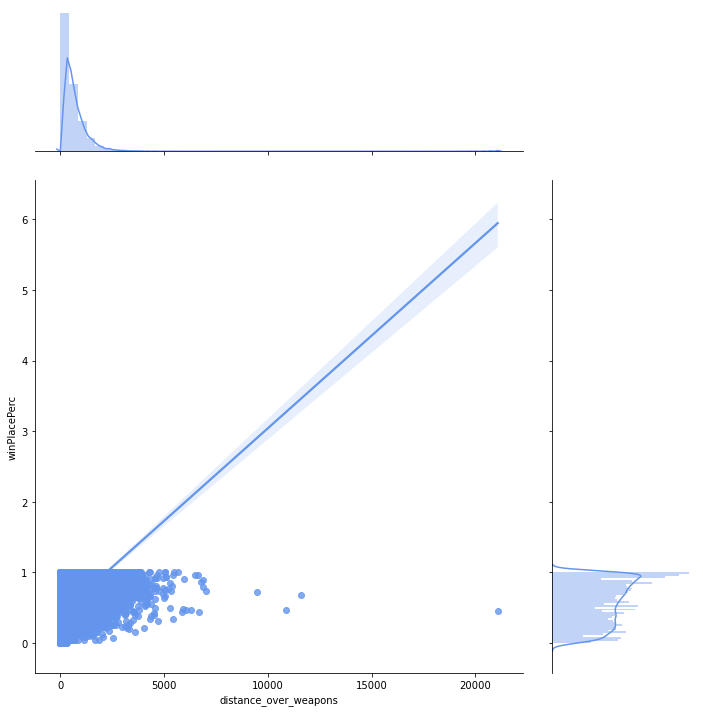

In [68]:
sns.jointplot(x="distance_over_weapons", y="winPlacePerc", data=data1, height=10, ratio=3, color="limegreen",kind='reg')
sns.jointplot(x="distance_over_weapons", y="winPlacePerc", data=data2, height=10, ratio=3, color="orange",kind='reg')
sns.jointplot(x="distance_over_weapons", y="winPlacePerc", data=data3, height=10, ratio=3, color="cornflowerblue",kind='reg')
plt.show()

- 单排、双排、四排获得能源型物资所需移动平均距离水平对比

In [69]:
print("单排获得能源型物资所需移动平均距离水平：",data1['distance_over_heals'].describe())
print("双排获得能源型物资所需移动平均距离水平：",data2['distance_over_heals'].describe())
print("四排获得能源型物资所需移动平均距离水平：",data3['distance_over_heals'].describe())

单排获得能源型物资所需移动平均距离水平： count    50000.000000
mean       469.191262
std       1131.769562
min          0.000000
25%          0.000000
50%          0.000000
75%        384.682143
max      25748.500000
Name: distance_over_heals, dtype: float64
双排获得能源型物资所需移动平均距离水平： count    50000.000000
mean       636.767732
std       1282.775289
min          0.000000
25%          0.000000
50%          0.000000
75%        740.420125
max      18825.580000
Name: distance_over_heals, dtype: float64
四排获得能源型物资所需移动平均距离水平： count    50000.000000
mean       797.598094
std       1399.148976
min          0.000000
25%          0.000000
50%         98.045455
75%       1040.541667
max      21079.300000
Name: distance_over_heals, dtype: float64


#### (5)移动距离

#### rideDistance
- 与winPlacePerc的散点图和回归拟合

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


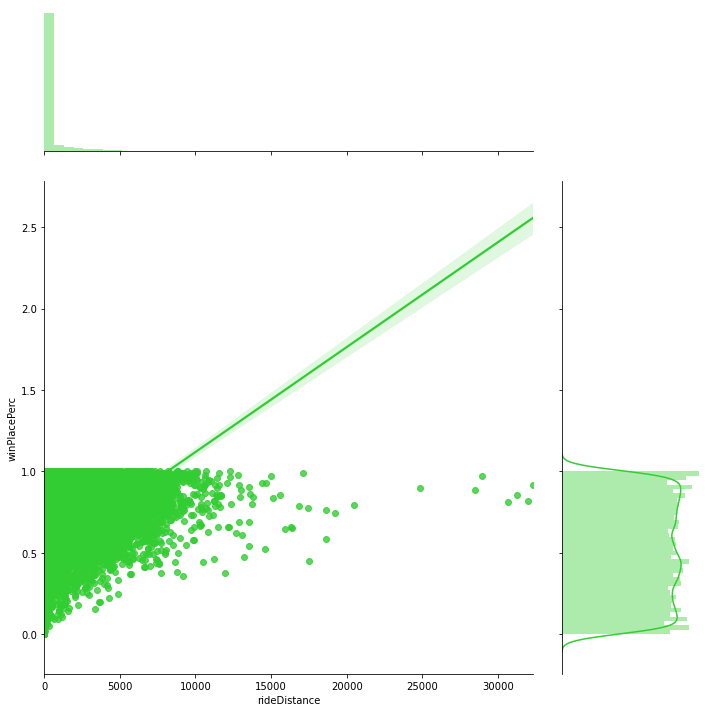

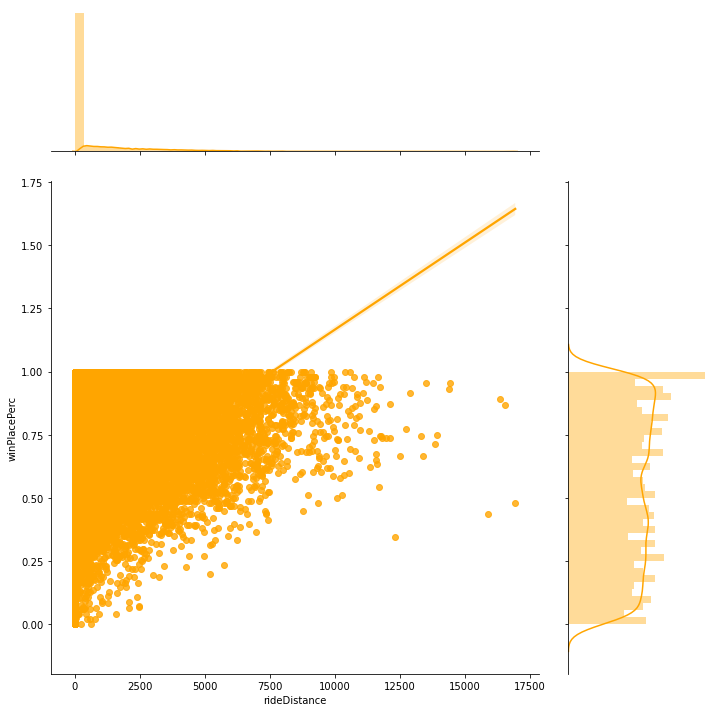

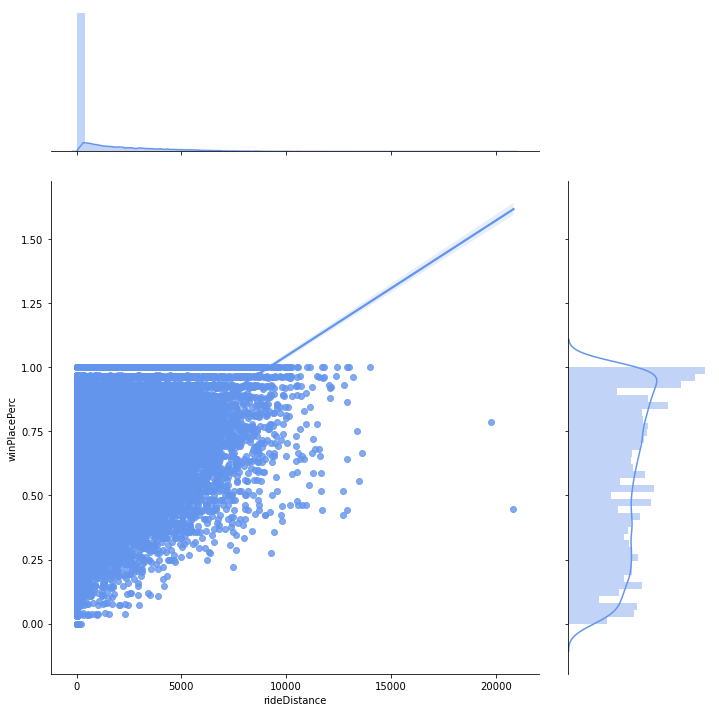

In [70]:
sns.jointplot(x="rideDistance", y="winPlacePerc", data=data1, height=10, ratio=3, color="limegreen",kind='reg')
sns.jointplot(x="rideDistance", y="winPlacePerc", data=data2, height=10, ratio=3, color="orange",kind='reg')
sns.jointplot(x="rideDistance", y="winPlacePerc", data=data3, height=10, ratio=3, color="cornflowerblue",kind='reg')
plt.show()

- 单排、双排、四排不同骑行距离与winPlacePerc的关系比对

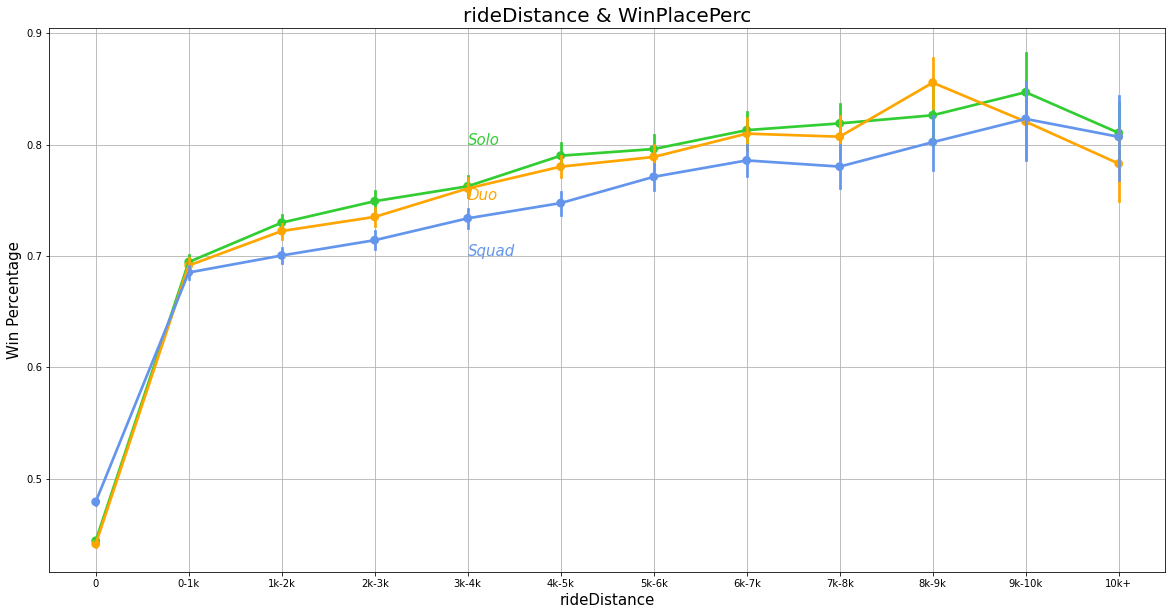

In [71]:
data_cut1['rideDistance_cut'] = pd.cut(data_cut1['rideDistance'], [-1,0,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000,40000], labels=["0","0-1k","1k-2k","2k-3k","3k-4k","4k-5k","5k-6k","6k-7k","7k-8k","8k-9k","9k-10k","10k+"])
data_cut2['rideDistance_cut'] = pd.cut(data_cut2['rideDistance'], [-1,0,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000,40000], labels=["0","0-1k","1k-2k","2k-3k","3k-4k","4k-5k","5k-6k","6k-7k","7k-8k","8k-9k","9k-10k","10k+"])
data_cut3['rideDistance_cut'] = pd.cut(data_cut3['rideDistance'], [-1,0,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000,40000], labels=["0","0-1k","1k-2k","2k-3k","3k-4k","4k-5k","5k-6k","6k-7k","7k-8k","8k-9k","9k-10k","10k+"])
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='rideDistance_cut',y='winPlacePerc',data=data_cut1,color='limegreen',alpha=0.8)
sns.pointplot(x='rideDistance_cut',y='winPlacePerc',data=data_cut2,color='orange',alpha=0.8)
sns.pointplot(x='rideDistance_cut',y='winPlacePerc',data=data_cut3,color='cornflowerblue',alpha=0.8)
plt.text(4,0.8,'Solo',color='limegreen',fontsize = 15,style = 'italic')
plt.text(4,0.75,'Duo',color='orange',fontsize = 15,style = 'italic')
plt.text(4,0.7,'Squad',color='cornflowerblue',fontsize = 15,style = 'italic')
plt.xlabel('rideDistance',fontsize = 15,color='black')
plt.ylabel('Win Percentage',fontsize = 15,color='black')
plt.title('rideDistance & WinPlacePerc',fontsize = 20,color='black')
plt.grid()
plt.show()

- 单排、双排、四排有无骑行的占比

单排：


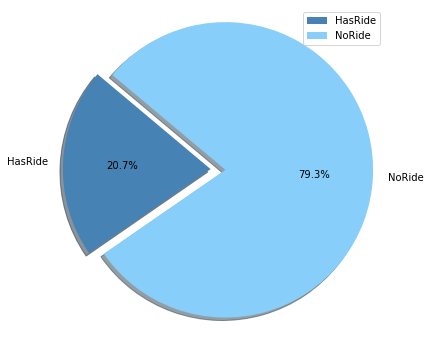

双排：


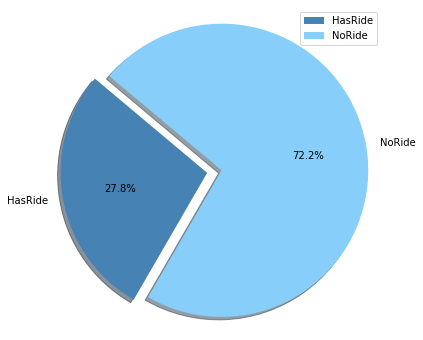

四排：


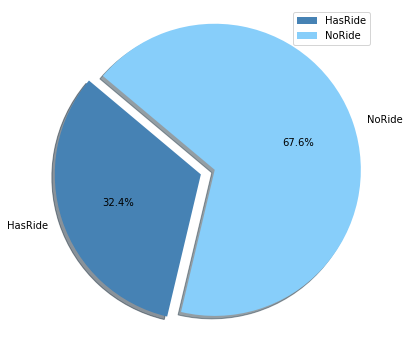

In [72]:
print("单排：")
HasRide=data1.rideDistance[data1.rideDistance>0].count()
NoRide=data1.rideDistance[data1.rideDistance == 0].count()
num=data1.rideDistance.count()
labels = 'HasRide', 'NoRide'
sizes = [HasRide/num, NoRide/num]
colors = ['steelblue', 'lightskyblue']
explode = (0.1, 0)  # explode 1st slice
# Plot
plt.figure(figsize=(6,6))
plt.pie(sizes,explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.legend()
plt.show()
print("双排：")
HasRide=data2.rideDistance[data2.rideDistance>0].count()
NoRide=data2.rideDistance[data2.rideDistance == 0].count()
num=data2.rideDistance.count()
labels = 'HasRide', 'NoRide'
sizes = [HasRide/num, NoRide/num]
colors = ['steelblue', 'lightskyblue']
explode = (0.1, 0)  # explode 1st slice
# Plot
plt.figure(figsize=(6,6))
plt.pie(sizes,explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.legend()
plt.show()
print("四排：")
HasRide=data3.rideDistance[data3.rideDistance>0].count()
NoRide=data3.rideDistance[data3.rideDistance == 0].count()
num=data3.rideDistance.count()
labels = 'HasRide', 'NoRide'
sizes = [HasRide/num, NoRide/num]
colors = ['steelblue', 'lightskyblue']
explode = (0.1, 0)  # explode 1st slice
# Plot
plt.figure(figsize=(6,6))
plt.pie(sizes,explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.legend()
plt.show()

- 单排、双排、四排有无骑行对吃鸡的影响

单排：


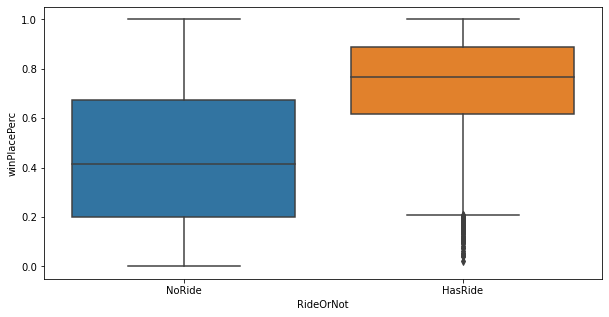

双排：


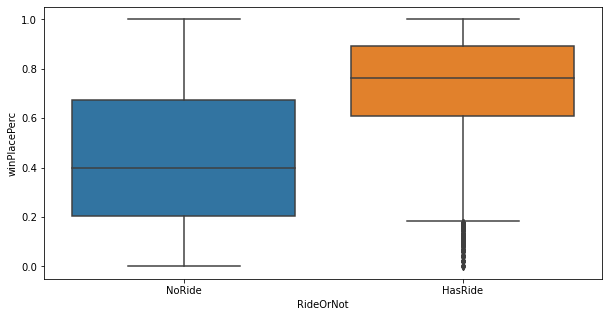

四排：


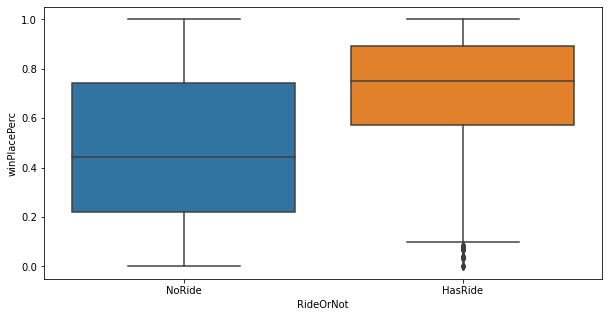

In [73]:
print("单排：")
data_cut1['RideOrNot'] = data1['rideDistance'].apply(lambda x: 'NoRide' if x==0 else 'HasRide')
plt.figure(figsize=(10,5))
sns.boxplot(x="RideOrNot", y="winPlacePerc", data=data_cut1)
plt.show()
print("双排：")
data_cut2['RideOrNot'] = data2['rideDistance'].apply(lambda x: 'NoRide' if x==0 else 'HasRide')
plt.figure(figsize=(10,5))
sns.boxplot(x="RideOrNot", y="winPlacePerc", data=data_cut2)
plt.show()
print("四排：")
data_cut3['RideOrNot'] = data3['rideDistance'].apply(lambda x: 'NoRide' if x==0 else 'HasRide')
plt.figure(figsize=(10,5))
sns.boxplot(x="RideOrNot", y="winPlacePerc", data=data_cut3)
plt.show()

#### swimDistance
- 与winPlacePerc的散点图和回归拟合

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


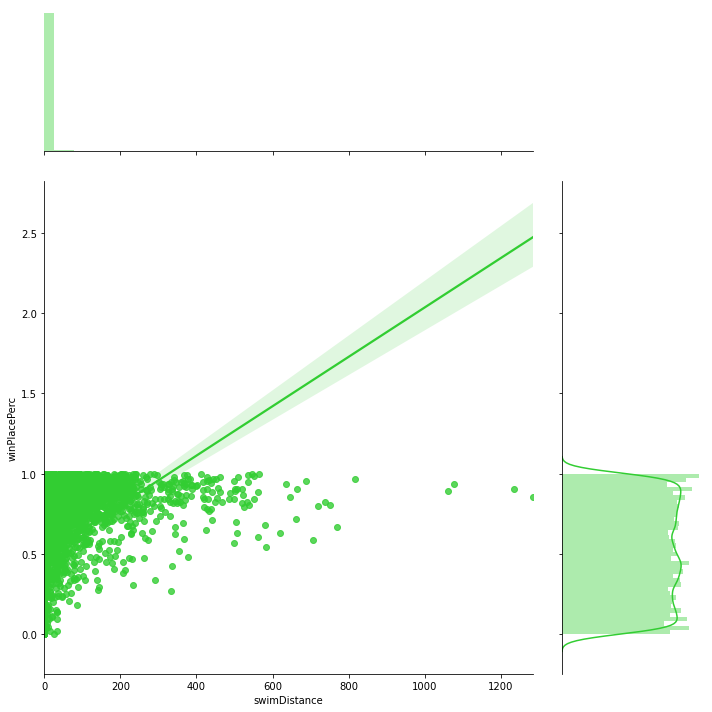

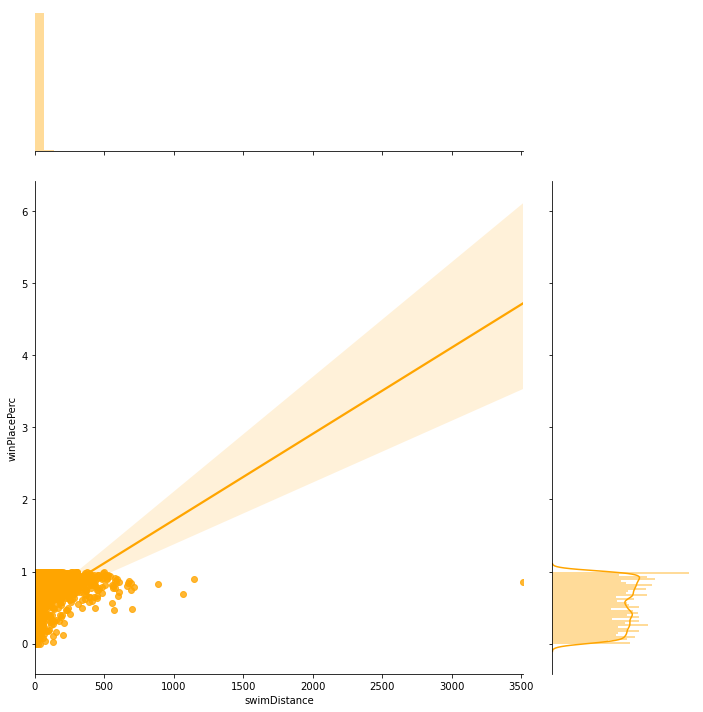

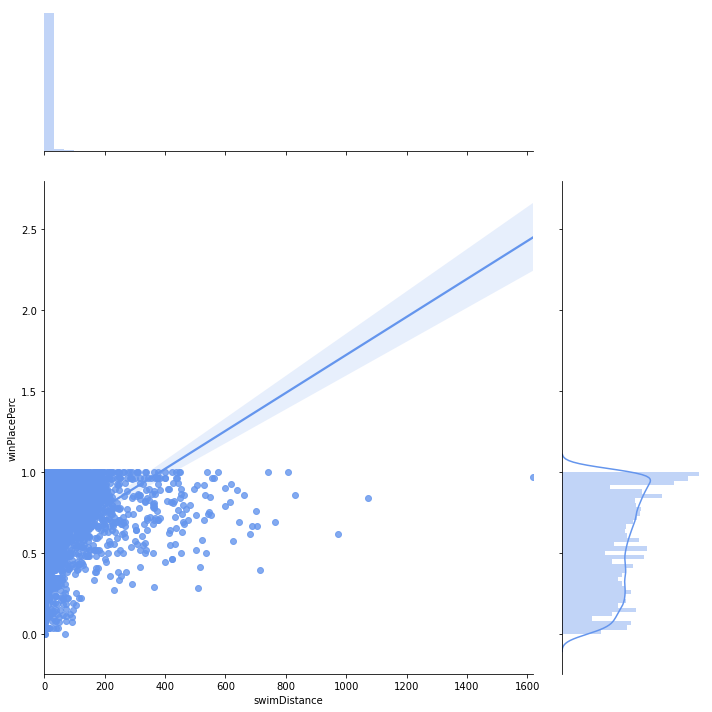

In [74]:
sns.jointplot(x="swimDistance", y="winPlacePerc", data=data1, height=10, ratio=3, color="limegreen",kind='reg')
sns.jointplot(x="swimDistance", y="winPlacePerc", data=data2, height=10, ratio=3, color="orange",kind='reg')
sns.jointplot(x="swimDistance", y="winPlacePerc", data=data3, height=10, ratio=3, color="cornflowerblue",kind='reg')
plt.show()

- 单排、双排、四排不同游泳距离与winPlacePerc的关系比对

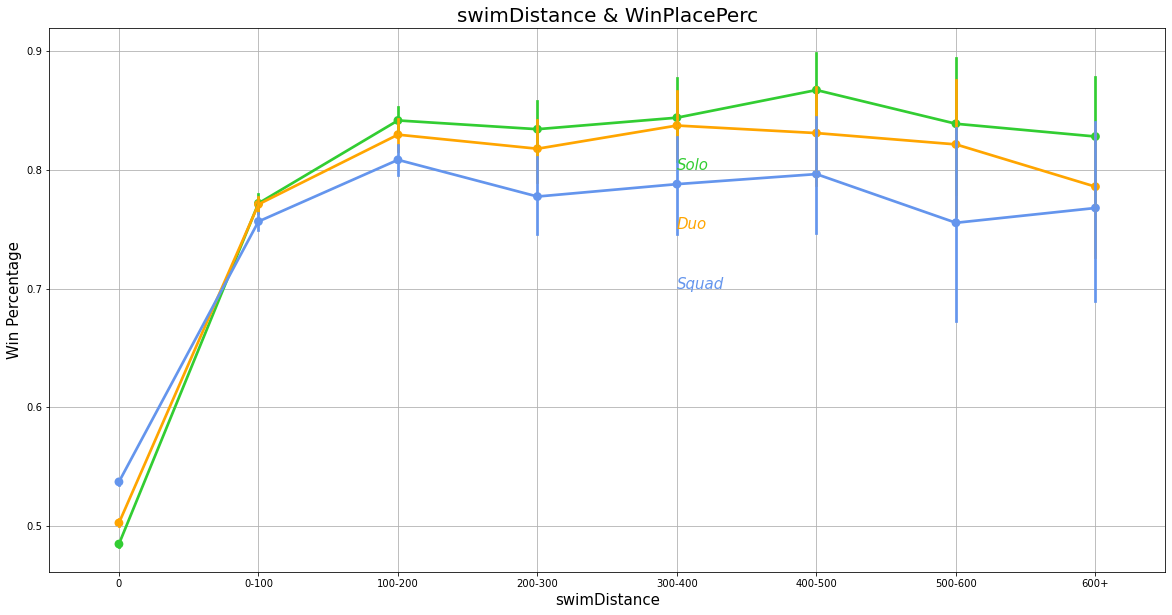

In [75]:
data_cut1['swimDistance_cut'] = pd.cut(data_cut1['swimDistance'], [-1,0,100,200,300,400,500,600,10000], labels=["0","0-100","100-200","200-300","300-400","400-500","500-600","600+"])
data_cut2['swimDistance_cut'] = pd.cut(data_cut2['swimDistance'], [-1,0,100,200,300,400,500,600,10000], labels=["0","0-100","100-200","200-300","300-400","400-500","500-600","600+"])
data_cut3['swimDistance_cut'] = pd.cut(data_cut3['swimDistance'], [-1,0,100,200,300,400,500,600,10000], labels=["0","0-100","100-200","200-300","300-400","400-500","500-600","600+"])
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='swimDistance_cut',y='winPlacePerc',data=data_cut1,color='limegreen',alpha=0.8)
sns.pointplot(x='swimDistance_cut',y='winPlacePerc',data=data_cut2,color='orange',alpha=0.8)
sns.pointplot(x='swimDistance_cut',y='winPlacePerc',data=data_cut3,color='cornflowerblue',alpha=0.8)
plt.text(4,0.8,'Solo',color='limegreen',fontsize = 15,style = 'italic')
plt.text(4,0.75,'Duo',color='orange',fontsize = 15,style = 'italic')
plt.text(4,0.7,'Squad',color='cornflowerblue',fontsize = 15,style = 'italic')
plt.xlabel('swimDistance',fontsize = 15,color='black')
plt.ylabel('Win Percentage',fontsize = 15,color='black')
plt.title('swimDistance & WinPlacePerc',fontsize = 20,color='black')
plt.grid()
plt.show()

- 单排、双排、四排有无游泳对吃鸡的影响

单排：


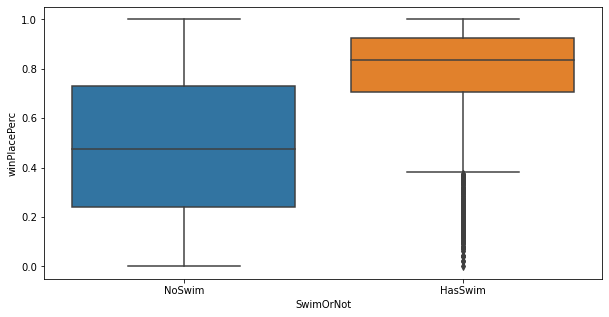

双排：


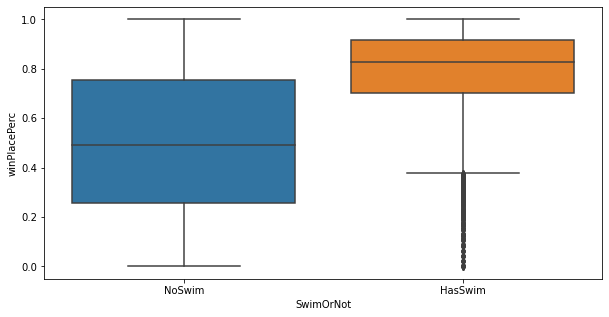

四排：


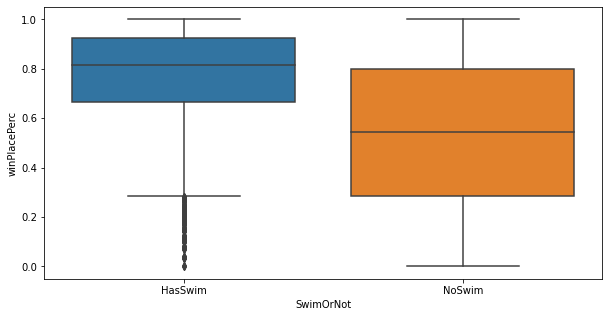

In [150]:
print("单排：")
data_cut1['SwimOrNot'] = data1['swimDistance'].apply(lambda x: 'NoSwim' if x==0 else 'HasSwim')
plt.figure(figsize=(10,5))
sns.boxplot(x="SwimOrNot", y="winPlacePerc", data=data_cut1)
plt.show()
print("双排：")
data_cut2['SwimOrNot'] = data2['swimDistance'].apply(lambda x: 'NoSwim' if x==0 else 'HasSwim')
plt.figure(figsize=(10,5))
sns.boxplot(x="SwimOrNot", y="winPlacePerc", data=data_cut2)
plt.show()
print("四排：")
data_cut3['SwimOrNot'] = data3['swimDistance'].apply(lambda x: 'NoSwim' if x==0 else 'HasSwim')
plt.figure(figsize=(10,5))
sns.boxplot(x="SwimOrNot", y="winPlacePerc", data=data_cut3)
plt.show()

#### walkDistance
- 与winPlacePerc的散点图和回归拟合

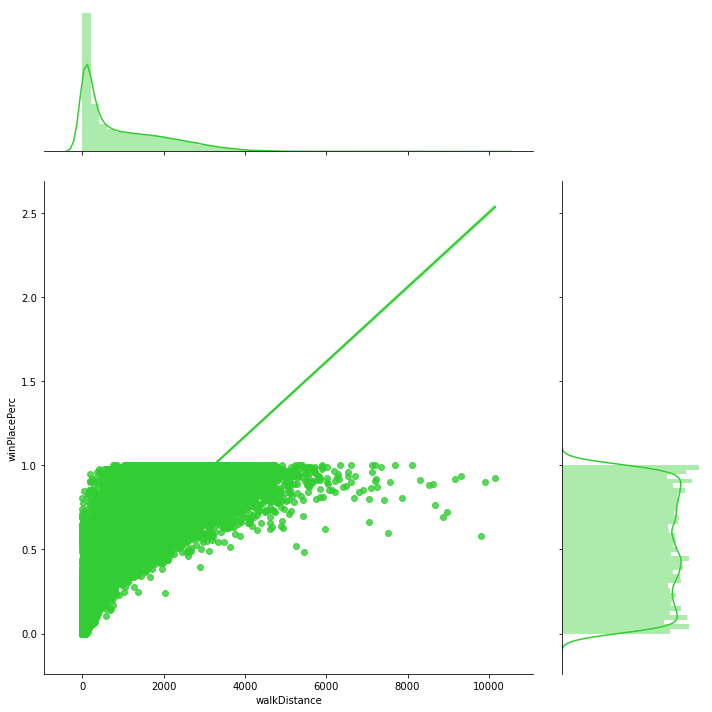

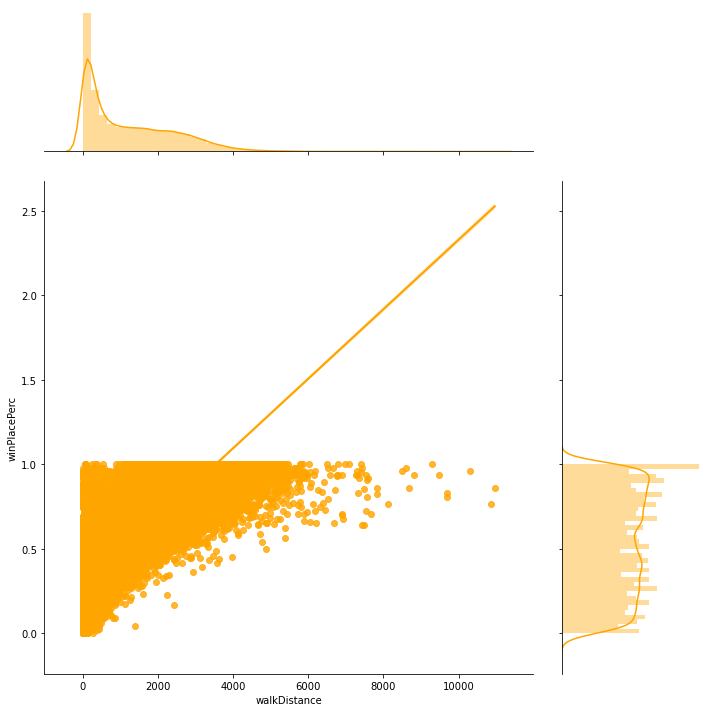

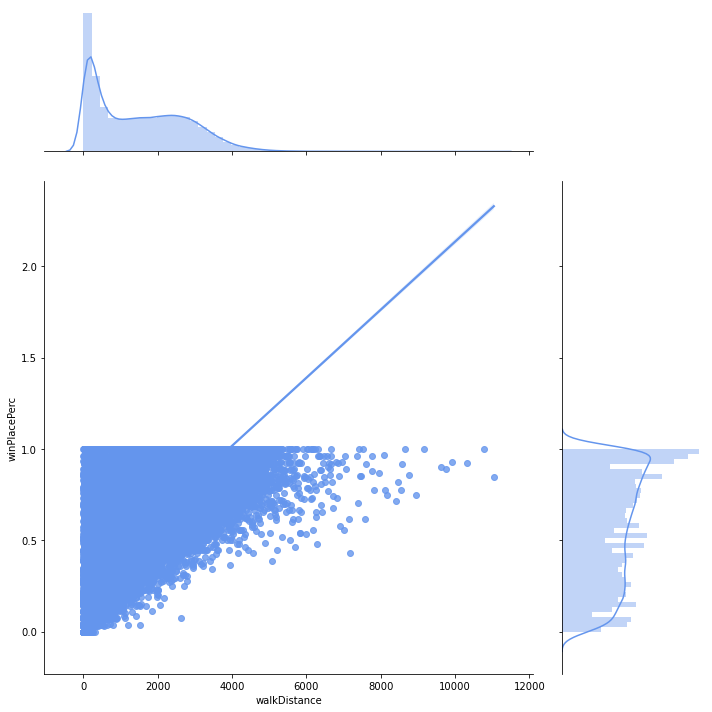

In [77]:
sns.jointplot(x="walkDistance", y="winPlacePerc", data=data1, height=10, ratio=3, color="limegreen",kind='reg')
sns.jointplot(x="walkDistance", y="winPlacePerc", data=data2, height=10, ratio=3, color="orange",kind='reg')
sns.jointplot(x="walkDistance", y="winPlacePerc", data=data3, height=10, ratio=3, color="cornflowerblue",kind='reg')
plt.show()

- 单排、双排、四排不同步行距离与winPlacePerc的关系比对

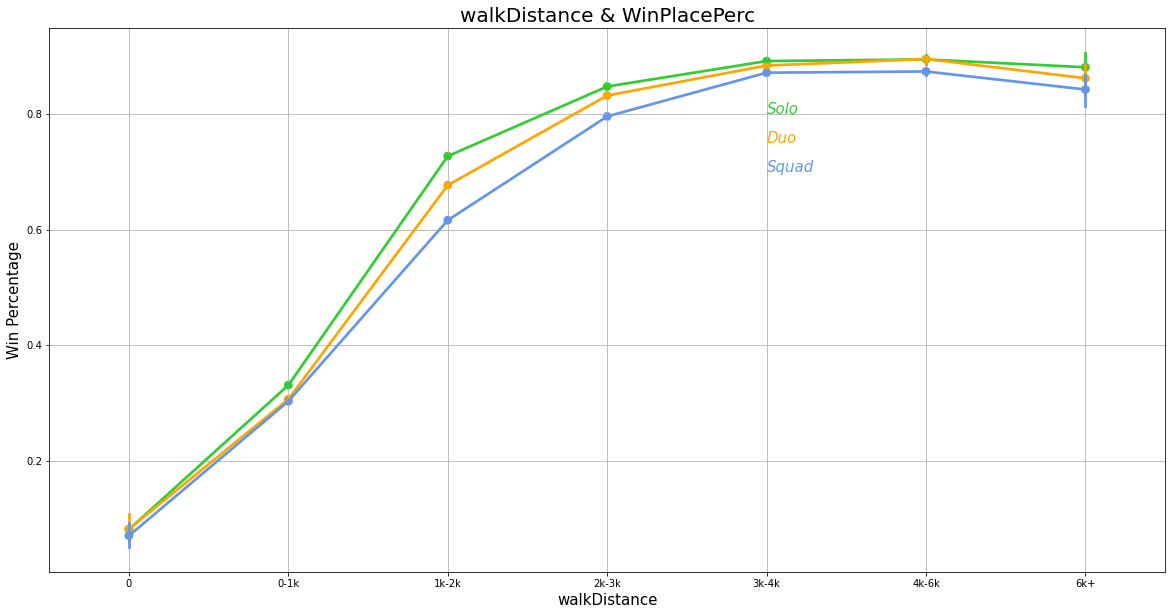

In [78]:
data_cut1['walkDistance_cut'] = pd.cut(data_cut1['walkDistance'], [-1,0,1000,2000,3000,4000,6000,40000], labels=["0","0-1k","1k-2k","2k-3k","3k-4k","4k-6k","6k+"])
data_cut2['walkDistance_cut'] = pd.cut(data_cut2['walkDistance'], [-1,0,1000,2000,3000,4000,6000,40000], labels=["0","0-1k","1k-2k","2k-3k","3k-4k","4k-6k","6k+"])
data_cut3['walkDistance_cut'] = pd.cut(data_cut3['walkDistance'], [-1,0,1000,2000,3000,4000,6000,40000], labels=["0","0-1k","1k-2k","2k-3k","3k-4k","4k-6k","6k+"])
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='walkDistance_cut',y='winPlacePerc',data=data_cut1,color='limegreen',alpha=0.8)
sns.pointplot(x='walkDistance_cut',y='winPlacePerc',data=data_cut2,color='orange',alpha=0.8)
sns.pointplot(x='walkDistance_cut',y='winPlacePerc',data=data_cut3,color='cornflowerblue',alpha=0.8)
plt.text(4,0.8,'Solo',color='limegreen',fontsize = 15,style = 'italic')
plt.text(4,0.75,'Duo',color='orange',fontsize = 15,style = 'italic')
plt.text(4,0.7,'Squad',color='cornflowerblue',fontsize = 15,style = 'italic')
plt.xlabel('walkDistance',fontsize = 15,color='black')
plt.ylabel('Win Percentage',fontsize = 15,color='black')
plt.title('walkDistance & WinPlacePerc',fontsize = 20,color='black')
plt.grid()
plt.show()

#### totalDistance
- 与winPlacePerc的散点图和回归拟合

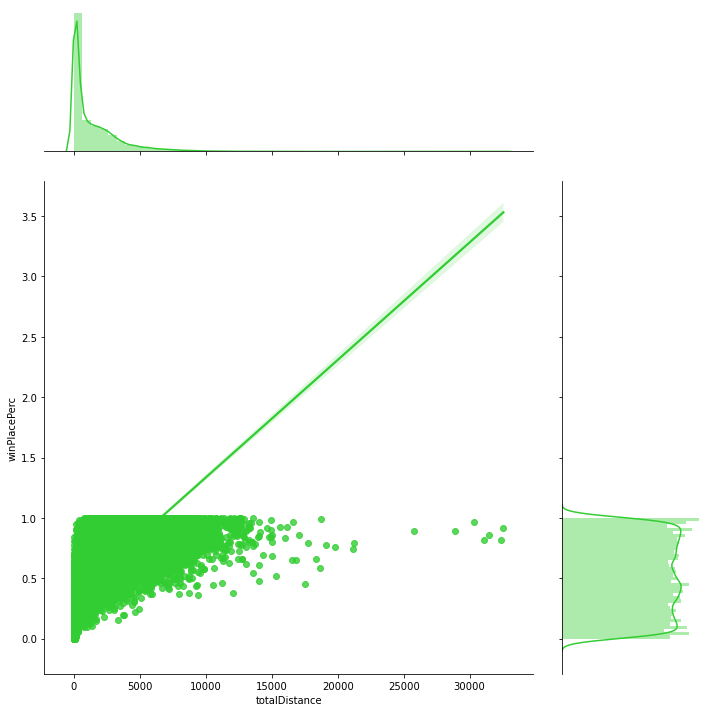

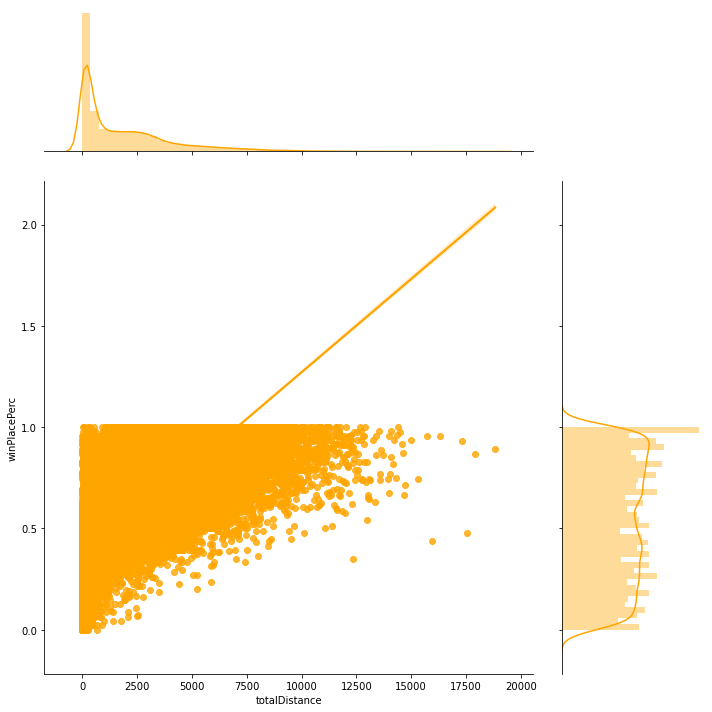

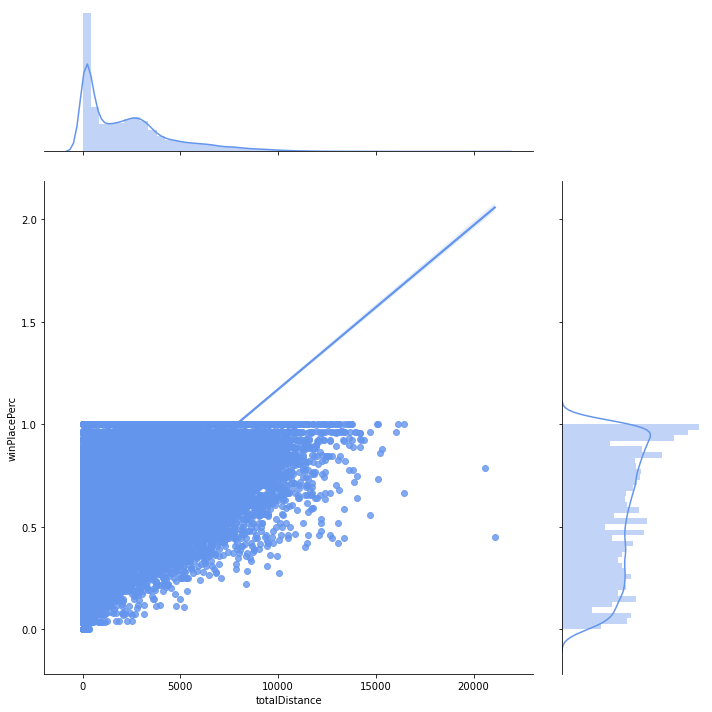

In [79]:
sns.jointplot(x="totalDistance", y="winPlacePerc", data=data1, height=10, ratio=3, color="limegreen",kind='reg')
sns.jointplot(x="totalDistance", y="winPlacePerc", data=data2, height=10, ratio=3, color="orange",kind='reg')
sns.jointplot(x="totalDistance", y="winPlacePerc", data=data3, height=10, ratio=3, color="cornflowerblue",kind='reg')
plt.show()

- 单排、双排、四排不同总移动距离与winPlacePerc的关系比对

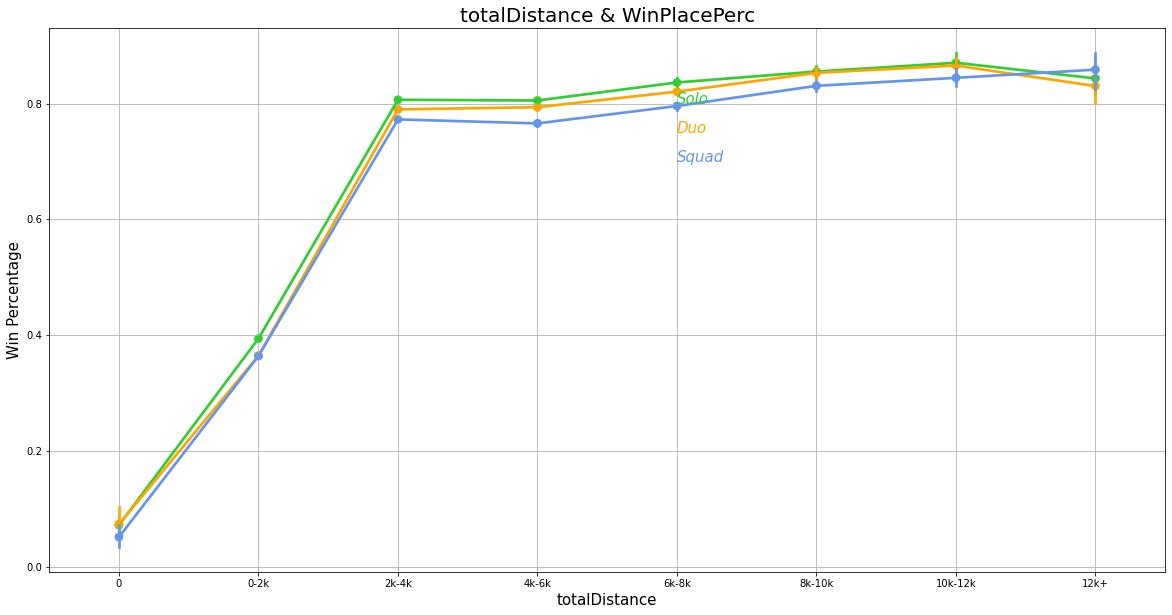

In [80]:
data_cut1['totalDistance_cut'] = pd.cut(data_cut1['totalDistance'], [-1,0,2000,4000,6000,8000,10000,12000,40000], labels=["0","0-2k","2k-4k","4k-6k","6k-8k","8k-10k","10k-12k","12k+"])
data_cut2['totalDistance_cut'] = pd.cut(data_cut2['totalDistance'], [-1,0,2000,4000,6000,8000,10000,12000,40000], labels=["0","0-2k","2k-4k","4k-6k","6k-8k","8k-10k","10k-12k","12k+"])
data_cut3['totalDistance_cut'] = pd.cut(data_cut3['totalDistance'], [-1,0,2000,4000,6000,8000,10000,12000,40000], labels=["0","0-2k","2k-4k","4k-6k","6k-8k","8k-10k","10k-12k","12k+"])
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='totalDistance_cut',y='winPlacePerc',data=data_cut1,color='limegreen',alpha=0.8)
sns.pointplot(x='totalDistance_cut',y='winPlacePerc',data=data_cut2,color='orange',alpha=0.8)
sns.pointplot(x='totalDistance_cut',y='winPlacePerc',data=data_cut3,color='cornflowerblue',alpha=0.8)
plt.text(4,0.8,'Solo',color='limegreen',fontsize = 15,style = 'italic')
plt.text(4,0.75,'Duo',color='orange',fontsize = 15,style = 'italic')
plt.text(4,0.7,'Squad',color='cornflowerblue',fontsize = 15,style = 'italic')
plt.xlabel('totalDistance',fontsize = 15,color='black')
plt.ylabel('Win Percentage',fontsize = 15,color='black')
plt.title('totalDistance & WinPlacePerc',fontsize = 20,color='black')
plt.grid()
plt.show()

- 单排、双排、四排的0移动距离玩家的探究

In [81]:
# 对于移动总距离为0玩家的探究
print("单排中{} 名玩家 ({:.4f}%) 走了0米. 这意味着他们落地成灰了或者他们是断线了（更有可能）".format(len(data1[data1['totalDistance'] == 0]), 100*len(data1[data1['totalDistance']==0])/len(data1)))
print("双排中{} 名玩家 ({:.4f}%) 走了0米. 这意味着他们落地成灰了或者他们是断线了（更有可能）".format(len(data2[data2['totalDistance'] == 0]), 100*len(data2[data2['totalDistance']==0])/len(data2)))
print("四排中{} 名玩家 ({:.4f}%) 走了0米. 这意味着他们落地成灰了或者他们是断线了（更有可能）".format(len(data3[data3['totalDistance'] == 0]), 100*len(data3[data3['totalDistance']==0])/len(data3)))

单排中794 名玩家 (1.5880%) 走了0米. 这意味着他们落地成灰了或者他们是断线了（更有可能）
双排中116 名玩家 (0.2320%) 走了0米. 这意味着他们落地成灰了或者他们是断线了（更有可能）
四排中252 名玩家 (0.5040%) 走了0米. 这意味着他们落地成灰了或者他们是断线了（更有可能）


#### (6)载具损毁
#### vehicleDestroys
- 与winPlacePerc的散点图和回归拟合

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


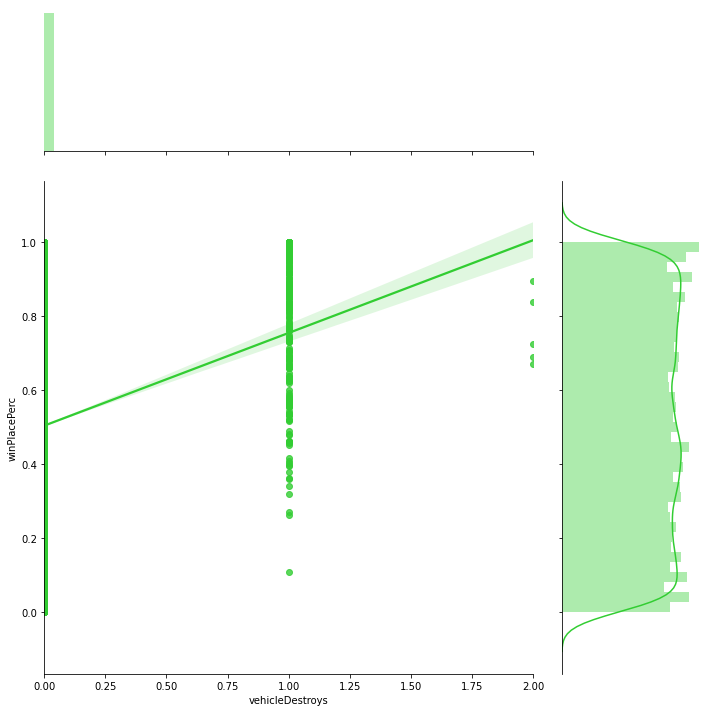

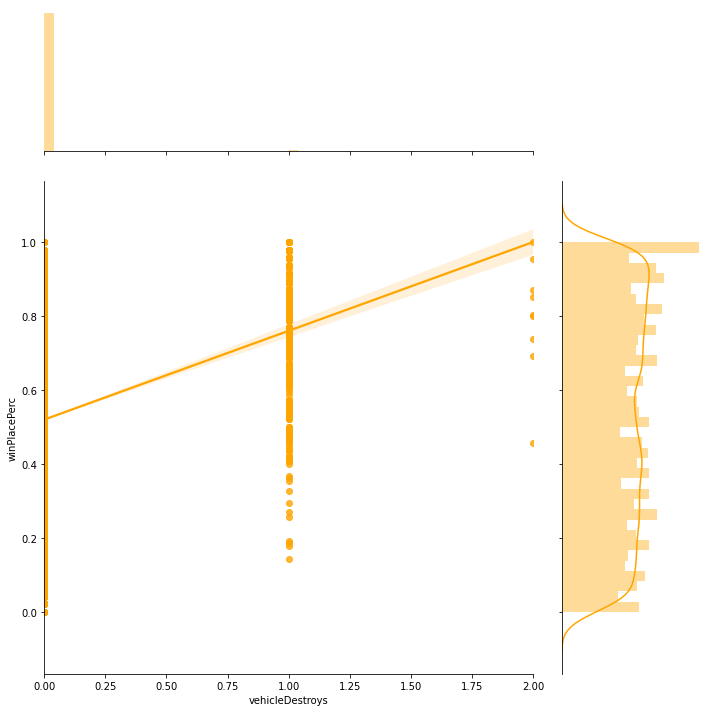

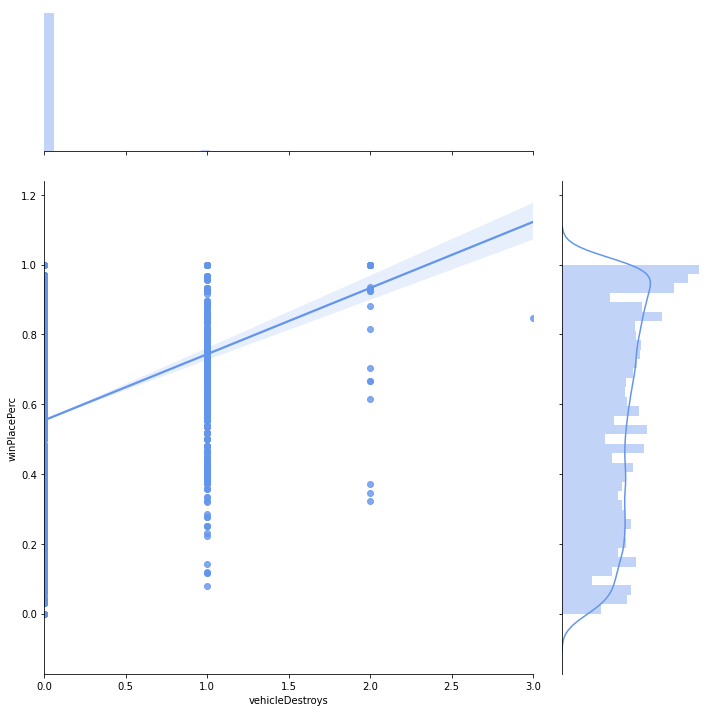

In [82]:
sns.jointplot(x="vehicleDestroys", y="winPlacePerc", data=data1, height=10, ratio=3, color="limegreen",kind='reg')
sns.jointplot(x="vehicleDestroys", y="winPlacePerc", data=data2, height=10, ratio=3, color="orange",kind='reg')
sns.jointplot(x="vehicleDestroys", y="winPlacePerc", data=data3, height=10, ratio=3, color="cornflowerblue",kind='reg')
plt.show()

- 单排、双排、四排有无载具损毁的占比

单排：


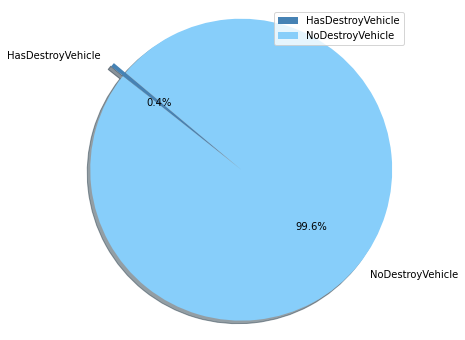

双排：


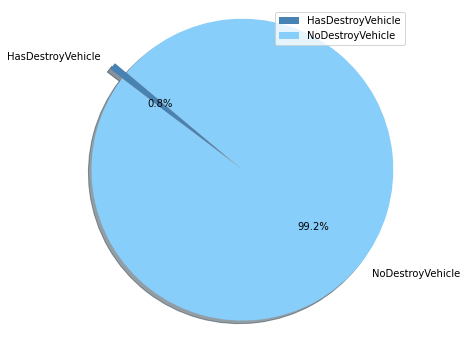

四排：


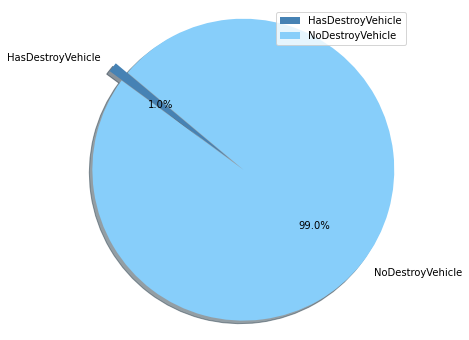

In [83]:
print("单排：")
HasDestroyVehicle=data1.vehicleDestroys[data1.vehicleDestroys>0].count()
NoDestroyVehicle=data1.vehicleDestroys[data1.vehicleDestroys == 0].count()
num=data1.vehicleDestroys.count()
labels = 'HasDestroyVehicle', 'NoDestroyVehicle'
sizes = [HasDestroyVehicle/num, NoDestroyVehicle/num]
colors = ['steelblue', 'lightskyblue']
explode = (0.1, 0)  # explode 1st slice
# Plot
plt.figure(figsize=(6,6))
plt.pie(sizes,explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.legend()
plt.show()
print("双排：")
HasDestroyVehicle=data2.vehicleDestroys[data2.vehicleDestroys>0].count()
NoDestroyVehicle=data2.vehicleDestroys[data2.vehicleDestroys == 0].count()
num=data2.vehicleDestroys.count()
labels = 'HasDestroyVehicle', 'NoDestroyVehicle'
sizes = [HasDestroyVehicle/num, NoDestroyVehicle/num]
colors = ['steelblue', 'lightskyblue']
explode = (0.1, 0)  # explode 1st slice
# Plot
plt.figure(figsize=(6,6))
plt.pie(sizes,explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.legend()
plt.show()
print("四排：")
HasDestroyVehicle=data3.vehicleDestroys[data3.vehicleDestroys>0].count()
NoDestroyVehicle=data3.vehicleDestroys[data3.vehicleDestroys == 0].count()
num=data3.vehicleDestroys.count()
labels = 'HasDestroyVehicle', 'NoDestroyVehicle'
sizes = [HasDestroyVehicle/num, NoDestroyVehicle/num]
colors = ['steelblue', 'lightskyblue']
explode = (0.1, 0)  # explode 1st slice
# Plot
plt.figure(figsize=(6,6))
plt.pie(sizes,explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.legend()
plt.show()

- 单排、双排、四排有无载具损毁对吃鸡的影响

单排：


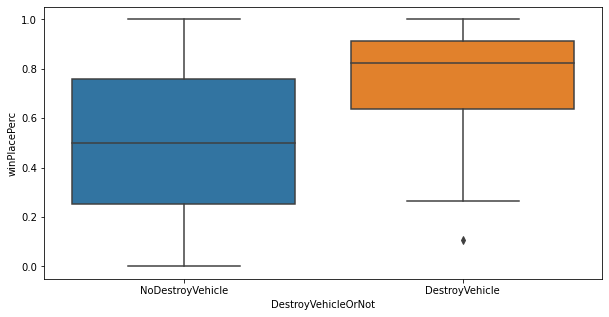

双排：


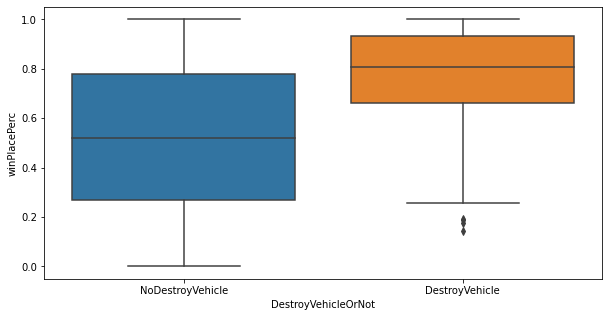

四排：


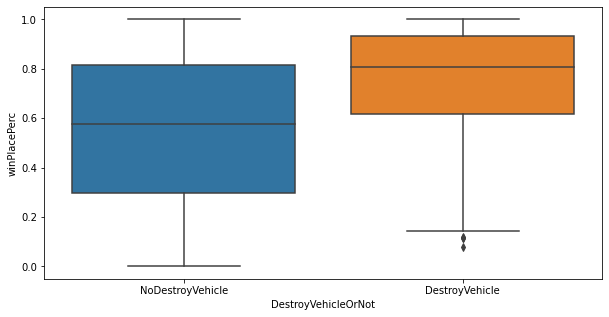

In [84]:
print("单排：")
data_cut1['DestroyVehicleOrNot'] = data1['vehicleDestroys'].apply(lambda x: 'NoDestroyVehicle' if x==0 else 'DestroyVehicle')
plt.figure(figsize=(10,5))
sns.boxplot(x="DestroyVehicleOrNot", y="winPlacePerc", data=data_cut1)
plt.show()
print("双排：")
data_cut2['DestroyVehicleOrNot'] = data2['vehicleDestroys'].apply(lambda x: 'NoDestroyVehicle' if x==0 else 'DestroyVehicle')
plt.figure(figsize=(10,5))
sns.boxplot(x="DestroyVehicleOrNot", y="winPlacePerc", data=data_cut2)
plt.show()
print("四排：")
data_cut3['DestroyVehicleOrNot'] = data3['vehicleDestroys'].apply(lambda x: 'NoDestroyVehicle' if x==0 else 'DestroyVehicle')
plt.figure(figsize=(10,5))
sns.boxplot(x="DestroyVehicleOrNot", y="winPlacePerc", data=data_cut3)
plt.show()

#### (7)技巧输出水平
#### skill
- 与winPlacePerc的散点图和回归拟合

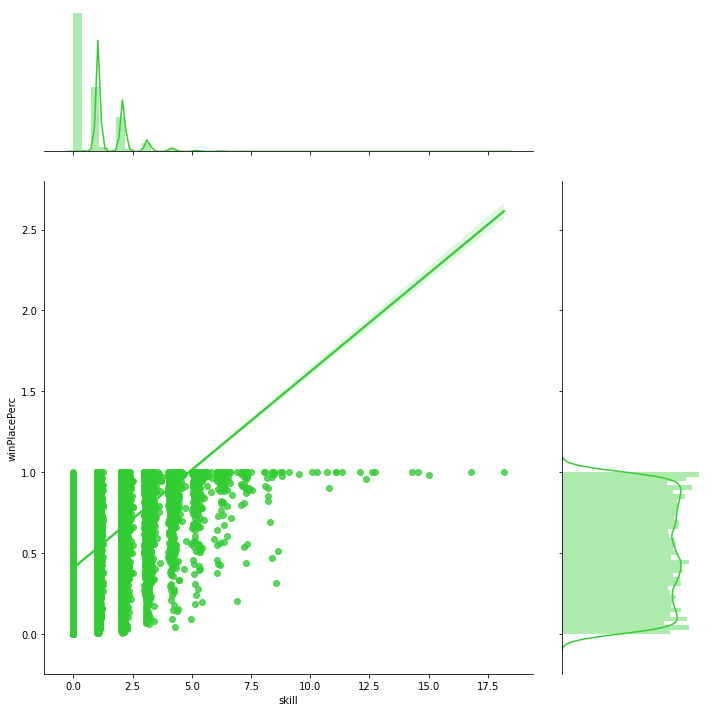

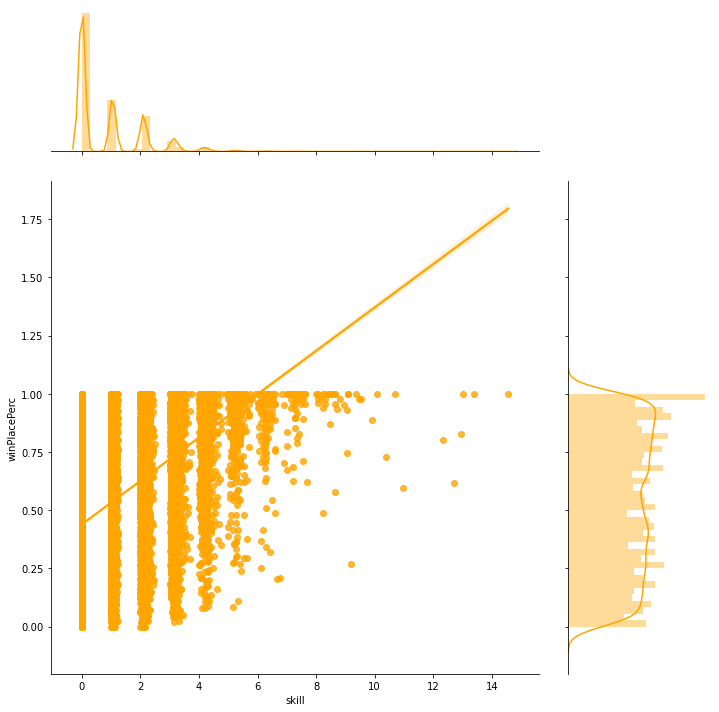

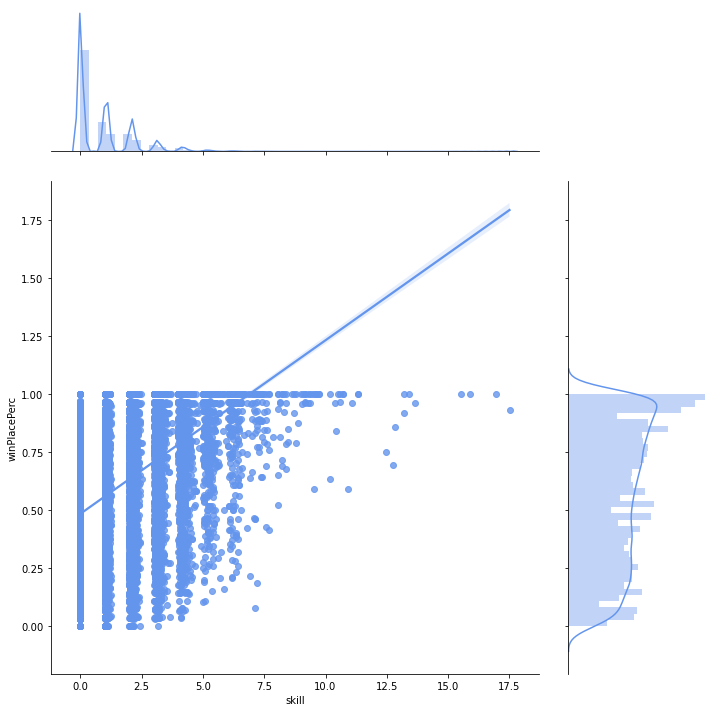

In [85]:
sns.jointplot(x="skill", y="winPlacePerc", data=data1, height=10, ratio=3, color="limegreen",kind='reg')
sns.jointplot(x="skill", y="winPlacePerc", data=data2, height=10, ratio=3, color="orange",kind='reg')
sns.jointplot(x="skill", y="winPlacePerc", data=data3, height=10, ratio=3, color="cornflowerblue",kind='reg')
plt.show()

- 单排、双排、四排不同技术输出水平与winPlacePerc的关系比对

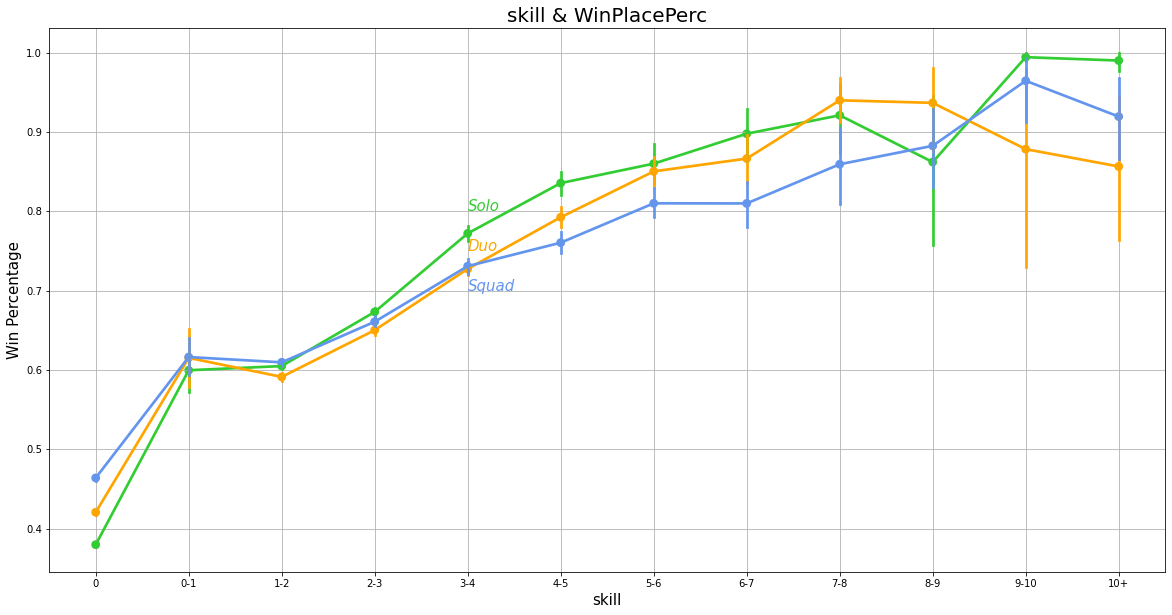

In [86]:
data_cut1['skill_cut'] = pd.cut(data_cut1['skill'], [-1,0,1,2,3,4,5,6,7,8,9,10,100], labels=["0","0-1","1-2","2-3","3-4","4-5","5-6","6-7","7-8","8-9","9-10","10+"])
data_cut2['skill_cut'] = pd.cut(data_cut2['skill'], [-1,0,1,2,3,4,5,6,7,8,9,10,100], labels=["0","0-1","1-2","2-3","3-4","4-5","5-6","6-7","7-8","8-9","9-10","10+"])
data_cut3['skill_cut'] = pd.cut(data_cut3['skill'], [-1,0,1,2,3,4,5,6,7,8,9,10,100], labels=["0","0-1","1-2","2-3","3-4","4-5","5-6","6-7","7-8","8-9","9-10","10+"])
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='skill_cut',y='winPlacePerc',data=data_cut1,color='limegreen',alpha=0.8)
sns.pointplot(x='skill_cut',y='winPlacePerc',data=data_cut2,color='orange',alpha=0.8)
sns.pointplot(x='skill_cut',y='winPlacePerc',data=data_cut3,color='cornflowerblue',alpha=0.8)
plt.text(4,0.8,'Solo',color='limegreen',fontsize = 15,style = 'italic')
plt.text(4,0.75,'Duo',color='orange',fontsize = 15,style = 'italic')
plt.text(4,0.7,'Squad',color='cornflowerblue',fontsize = 15,style = 'italic')
plt.xlabel('skill',fontsize = 15,color='black')
plt.ylabel('Win Percentage',fontsize = 15,color='black')
plt.title('skill & WinPlacePerc',fontsize = 20,color='black')
plt.grid()
plt.show()

### 4、各模式（单排、双排、四排）内进一步统计描述

#### (1)单排

##### 移动距离totalDistance与道具获得和道具使用
- 与boosts

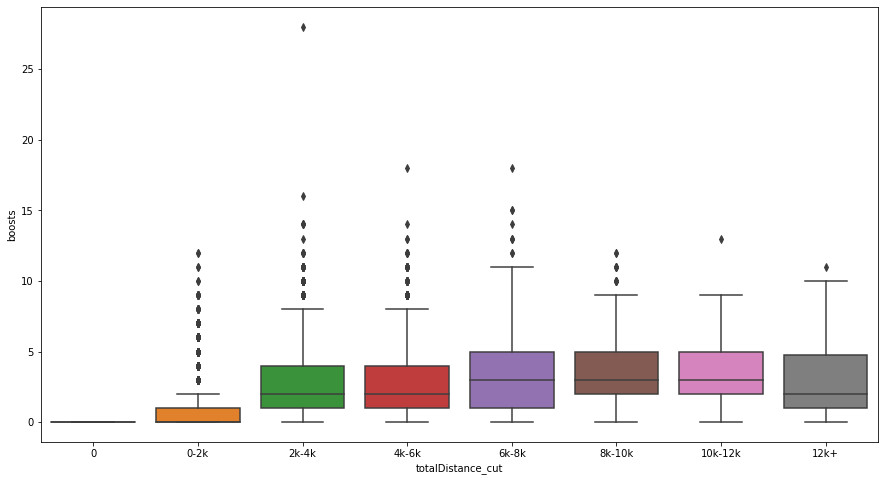

In [87]:
plt.figure(figsize=(15,8))
sns.boxplot(x="totalDistance_cut", y="boosts", data=data_cut1)
plt.show()

- 与weaponsAcquired

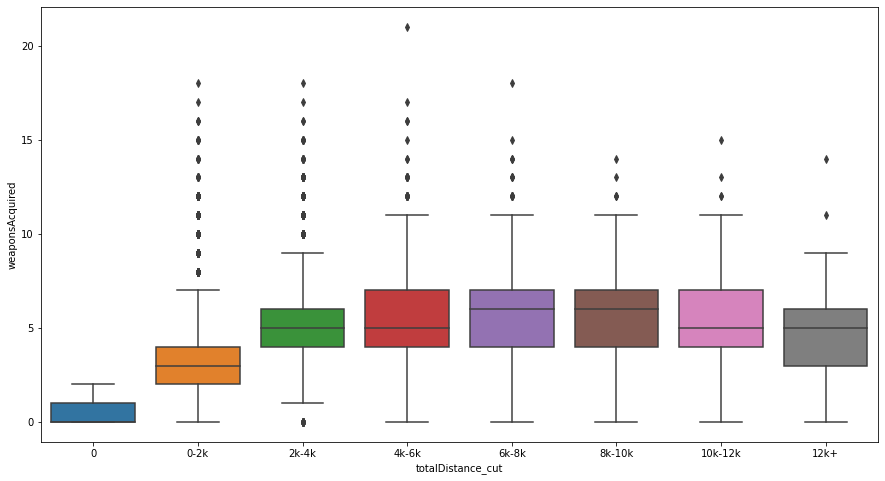

In [88]:
plt.figure(figsize=(15,8))
sns.boxplot(x="totalDistance_cut", y="weaponsAcquired", data=data_cut1)
plt.show()

- 与heals

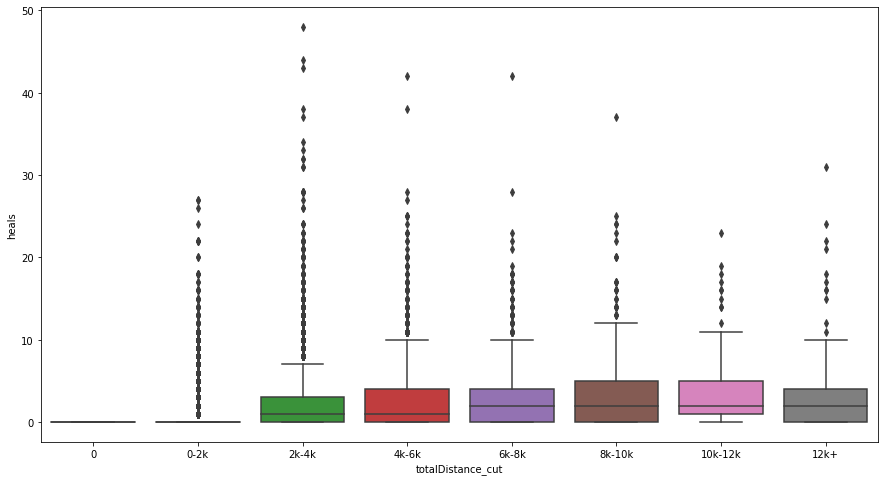

In [89]:
plt.figure(figsize=(15,8))
sns.boxplot(x="totalDistance_cut", y="heals", data=data_cut1)
plt.show()

#####  boosts对击杀水平、射击水平的作用

- 与headshotKills

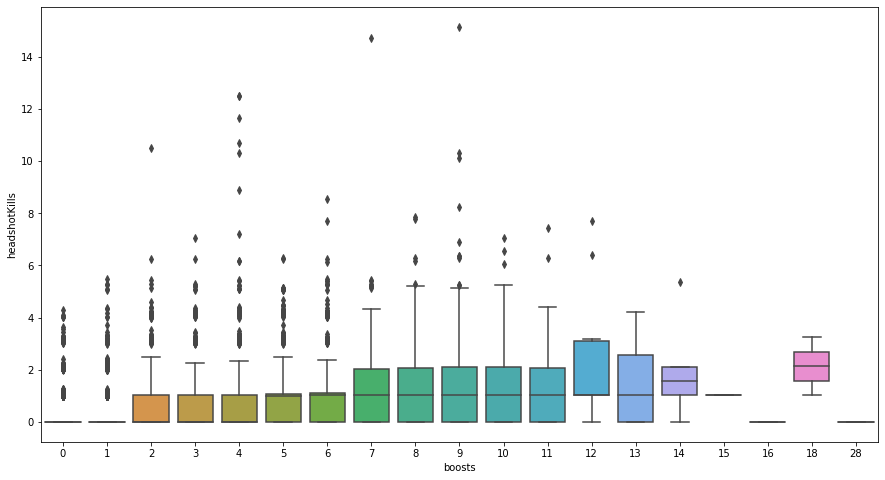

In [90]:
plt.figure(figsize=(15,8))
sns.boxplot(x="boosts", y="headshotKills", data=data_cut1)
plt.show()

In [91]:
print('有爆头击杀的玩家使用boosts情况：')
hasheadshotKills=data1[data1['headshotKills'] > 0]
print("{} 个有爆头击杀的玩家中 ({:.2f}%) 使用了boosts".format(len(hasheadshotKills),100*len(hasheadshotKills[hasheadshotKills['boosts']>0])/len(hasheadshotKills)))

有爆头击杀的玩家使用boosts情况：
9391 个有爆头击杀的玩家中 (74.74%) 使用了boosts


- 与killStreaks

In [92]:
print('有连杀的玩家使用boosts情况：')
hasKillStreaks=data1[data1['killStreaks'] > 0].copy()
print("{} 个有连杀的玩家中 ({:.2f}%) 使用了boosts".format(len(hasKillStreaks), 100*len(hasKillStreaks[hasKillStreaks['boosts']>0])/len(hasKillStreaks)))

有连杀的玩家使用boosts情况：
23276 个有连杀的玩家中 (65.26%) 使用了boosts


- 与killPlace

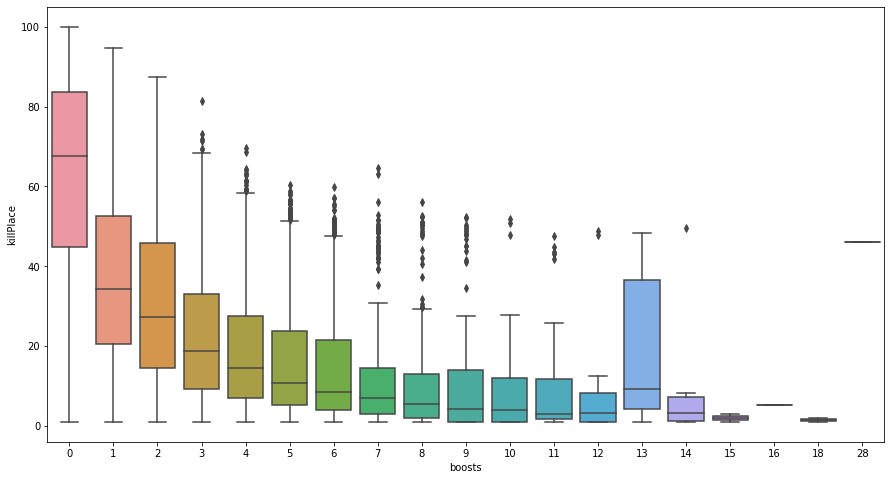

In [93]:
plt.figure(figsize=(15,8))
sns.boxplot(x="boosts", y="killPlace", data=data1)
plt.show()

- 与longestKill

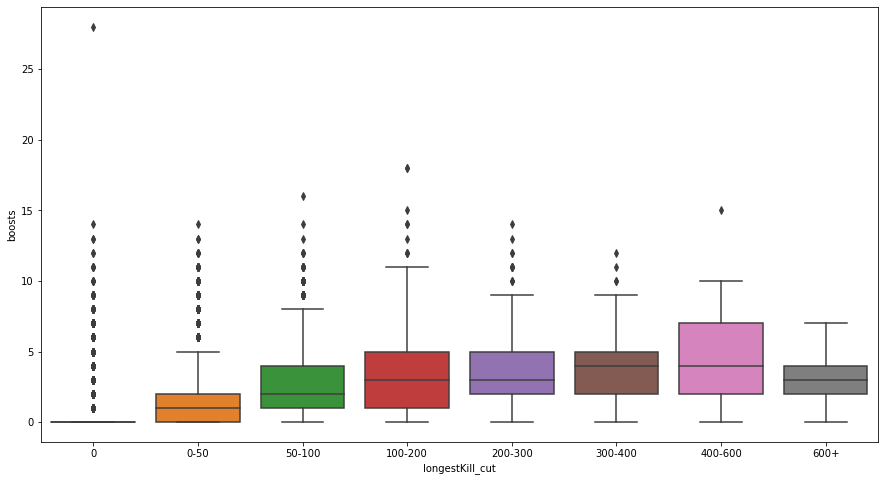

In [94]:
plt.figure(figsize=(15,8))
sns.boxplot(x="longestKill_cut", y="boosts", data=data_cut1)
plt.show()

##### weaponsAcquired对击杀水平、射击水平的作用

- 与headshotKills

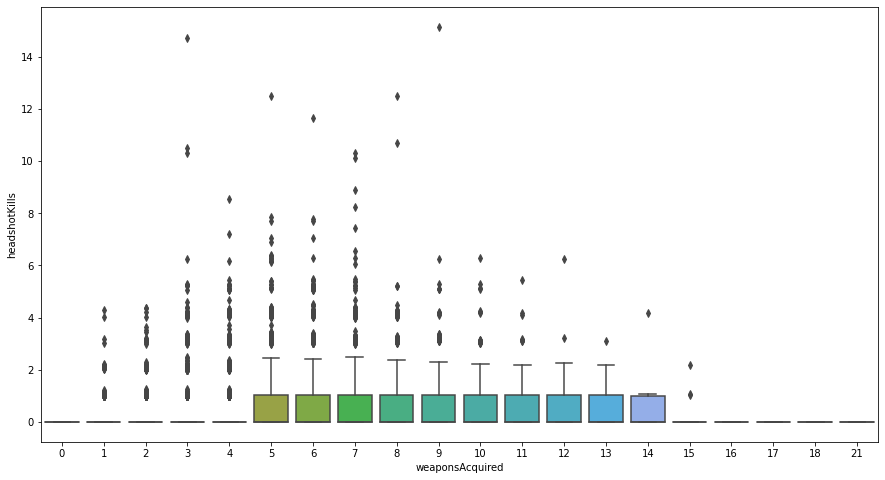

In [95]:
plt.figure(figsize=(15,8))
sns.boxplot(x="weaponsAcquired", y="headshotKills", data=data_cut1)
plt.show()

In [96]:
print('有爆头击杀的玩家获得武器数情况：')
hasheadshotKills=data1[data1['headshotKills'] > 0].copy()
print("{} 个有爆头击杀的玩家中 ({:.2f}%) 获得了4把及以上的武器".format(len(hasheadshotKills),100*len(hasheadshotKills[hasheadshotKills['weaponsAcquired']>3])/len(hasheadshotKills)))

有爆头击杀的玩家获得武器数情况：
9391 个有爆头击杀的玩家中 (69.77%) 获得了4把及以上的武器


- 与killStreaks

In [97]:
print('有连杀的玩家使用boosts情况：')
hasKillStreaks=data1[data1['killStreaks'] > 0].copy()
print("{} 个有连杀的玩家中 ({:.2f}%) 获得了4把及以上的武器".format(len(hasKillStreaks), 100*len(hasKillStreaks[hasKillStreaks['weaponsAcquired']>3])/len(hasKillStreaks)))

有连杀的玩家使用boosts情况：
23276 个有连杀的玩家中 (62.75%) 获得了4把及以上的武器


- 对killPlace

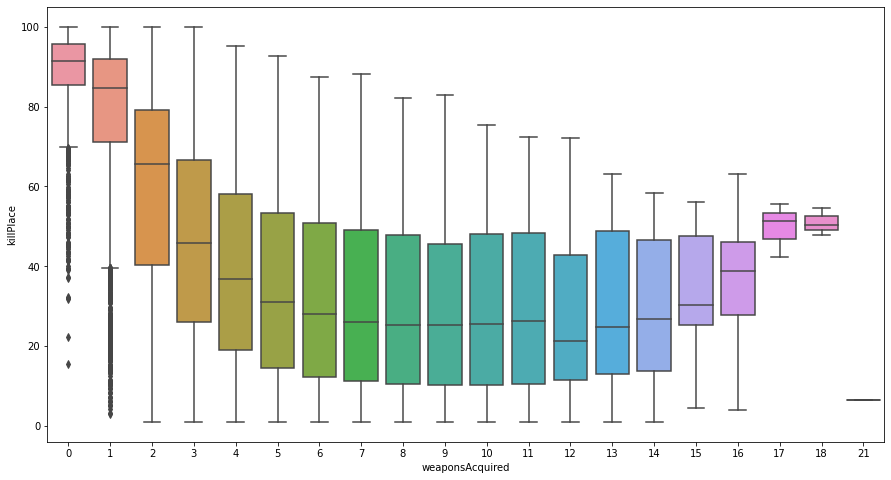

In [98]:
plt.figure(figsize=(15,8))
sns.boxplot(x="weaponsAcquired", y="killPlace", data=data1)
plt.show()

- 与longestKill

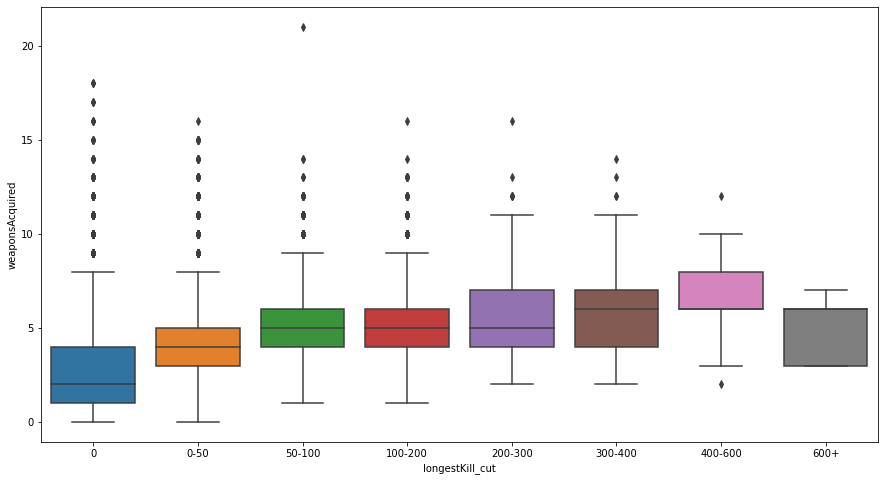

In [99]:
plt.figure(figsize=(15,8))
sns.boxplot(x="longestKill_cut", y="weaponsAcquired", data=data_cut1)
plt.show()

##### 技术性玩家的不同水平与killPlace之间的关系

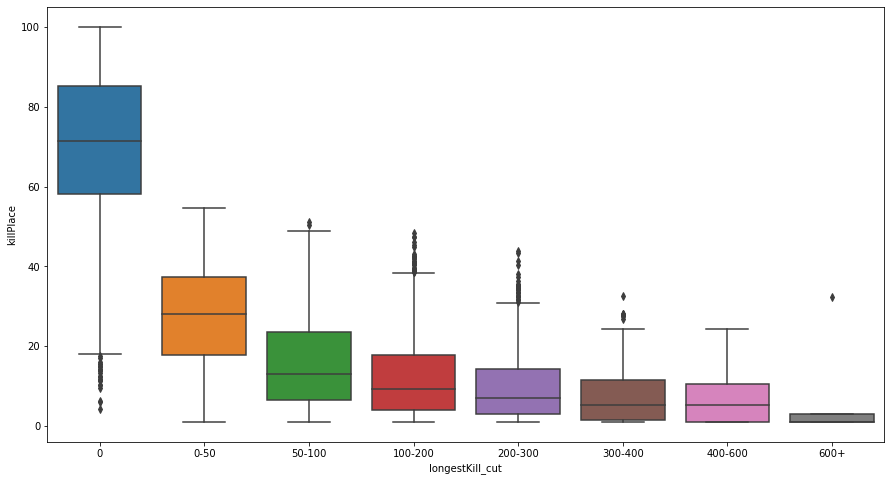

In [100]:
plt.figure(figsize=(15,8))
sns.boxplot(x="longestKill_cut", y="killPlace", data=data_cut1)
plt.show()

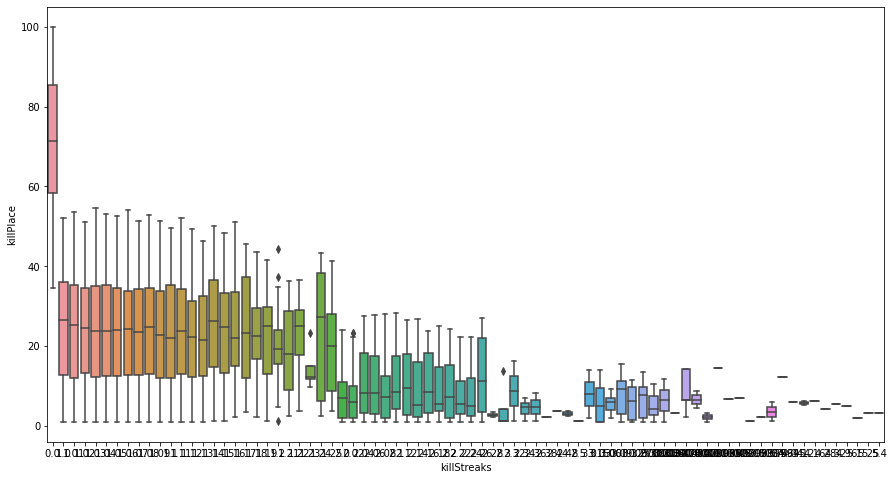

In [101]:
plt.figure(figsize=(15,8))
sns.boxplot(x="killStreaks", y="killPlace", data=data1)
plt.show()

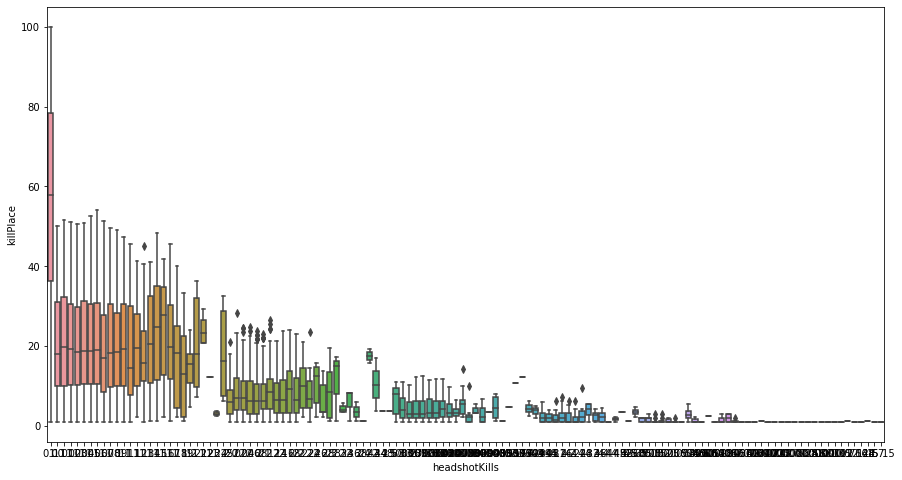

In [102]:
plt.figure(figsize=(15,8))
sns.boxplot(x="headshotKills", y="killPlace", data=data1)
plt.show()

#### (2)双排

#### playersInGroup与boosts、weaponsAcquired、heals、kills、damageDealt
- playersInGroup & boosts

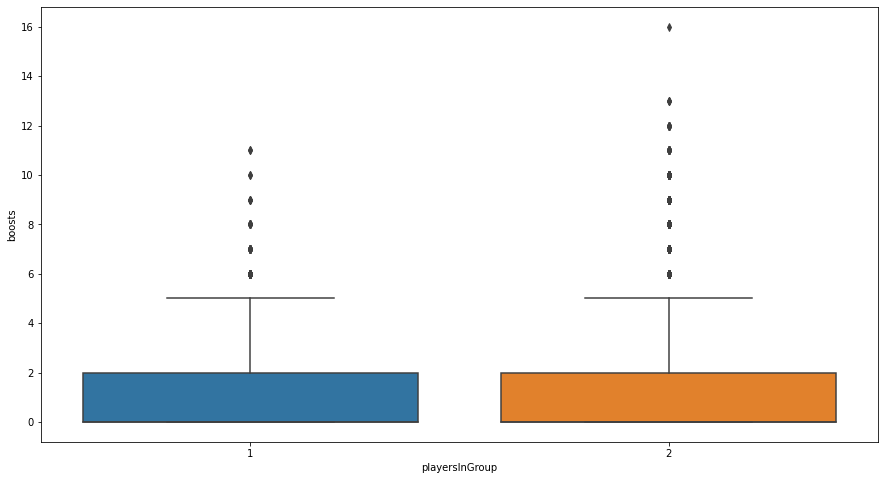

In [105]:
plt.figure(figsize=(15,8))
sns.boxplot(x="playersInGroup", y="boosts", data=data2)
plt.show()

- playersInGroup & weaponsAcquired

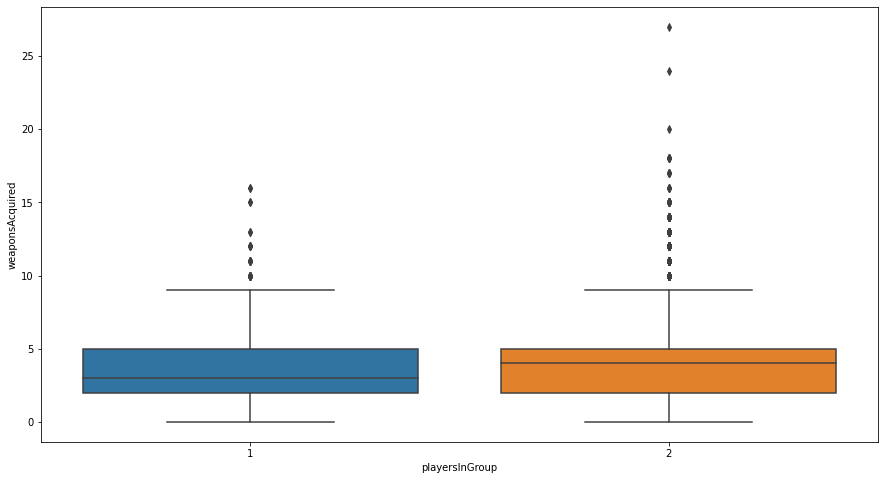

In [106]:
plt.figure(figsize=(15,8))
sns.boxplot(x="playersInGroup", y="weaponsAcquired", data=data2)
plt.show()

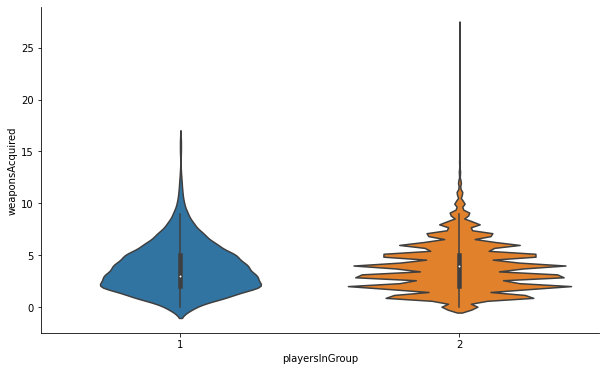

In [107]:
plt.figure(figsize=(10,6))
sns.violinplot(data2['playersInGroup'], data2['weaponsAcquired'])
sns.despine()
plt.show()

- playersInGroup & heals

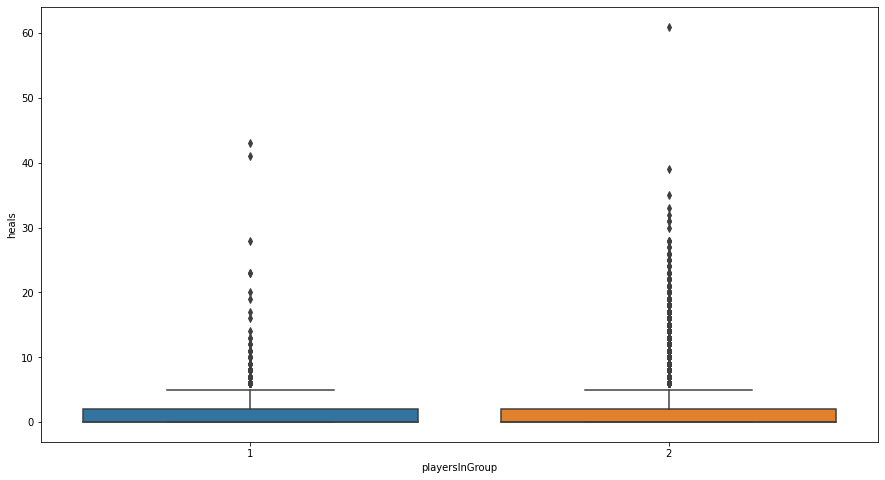

In [108]:
plt.figure(figsize=(15,8))
sns.boxplot(x="playersInGroup", y="heals", data=data2)
plt.show()

- playersInGroup & kills

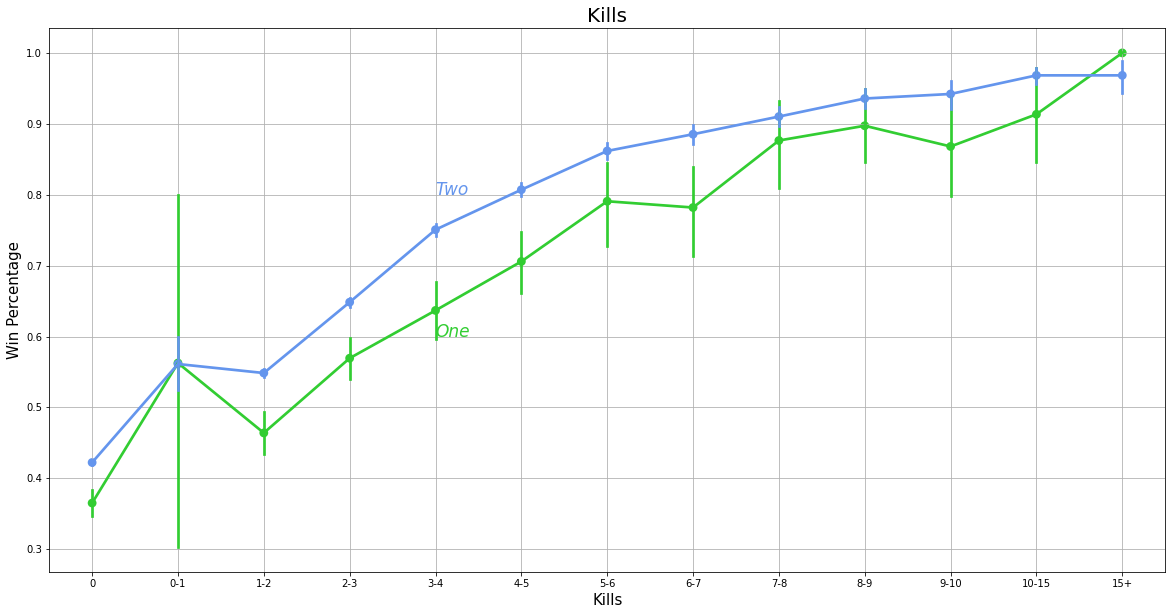

In [109]:
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='kills_cut',y='winPlacePerc',data=One2,color='limegreen',alpha=0.8)
sns.pointplot(x='kills_cut',y='winPlacePerc',data=Two2,color='cornflowerblue',alpha=0.8)

plt.text(4,0.6,'One',color='limegreen',fontsize = 17,style = 'italic')
plt.text(4,0.8,'Two',color='cornflowerblue',fontsize = 17,style = 'italic')

plt.xlabel('Kills',fontsize = 15,color='black')
plt.ylabel('Win Percentage',fontsize = 15,color='black')
plt.title('Kills',fontsize = 20,color='black')
plt.grid()
plt.show()

In [110]:
print('一人队中击杀伤害输出极低躺赢情况：')
No_kill = One2[One2['kills'] == 0]
print("{} 玩家 ({:.2f}%) 不用杀一个人就可以赢得比赛".format(len(No_kill[No_kill['winPlacePerc']==1]), 100*len(No_kill[No_kill['winPlacePerc']==1])/len(One)))

print('两人队中击杀伤害输出极低躺赢情况：')
No_kill=Two2[Two2['kills'] == 0]
print("{} 玩家 ({:.2f}%) 不用杀一个人就可以赢得比赛".format(len(No_kill[No_kill['winPlacePerc']==1]), 100*len(No_kill[No_kill['winPlacePerc']==1])/len(Two)))

一人队中击杀伤害输出极低躺赢情况：
0 玩家 (0.00%) 不用杀一个人就可以赢得比赛
两人队中击杀伤害输出极低躺赢情况：
84 玩家 (1.68%) 不用杀一个人就可以赢得比赛


- playersInGroup & damageDealt

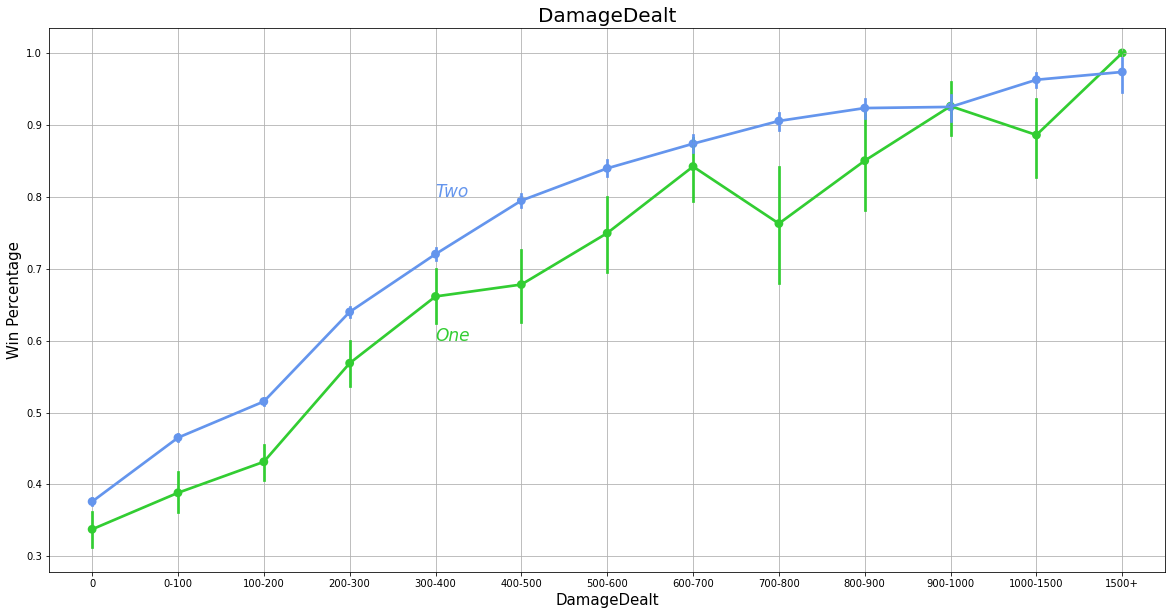

In [111]:
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='damageDealt_cut',y='winPlacePerc',data=One2,color='limegreen',alpha=0.8)
sns.pointplot(x='damageDealt_cut',y='winPlacePerc',data=Two2,color='cornflowerblue',alpha=0.8)

plt.text(4,0.6,'One',color='limegreen',fontsize = 17,style = 'italic')
plt.text(4,0.8,'Two',color='cornflowerblue',fontsize = 17,style = 'italic')

plt.xlabel('DamageDealt',fontsize = 15,color='black')
plt.ylabel('Win Percentage',fontsize = 15,color='black')
plt.title('DamageDealt',fontsize = 20,color='black')
plt.grid()
plt.show()

In [112]:
print('一人队中伤害输出极低躺赢情况：')
No_damage = One2[One2['damageDealt'] == 0]
print("{} 玩家 ({:.2f}%) 不用伤害一个人就可以赢得比赛".format(len(No_damage[No_damage['winPlacePerc']==1]), 100*len(No_damage[No_damage['winPlacePerc']==1])/len(One)))

print('两人队中伤害输出极低躺赢情况：')
No_damage = Two2[Two2['damageDealt'] == 0]
print("{} 玩家 ({:.2f}%) 不用伤害任何人就可以躺赢比赛".format(len(No_damage[No_damage['winPlacePerc']==1]), 100*len(No_damage[No_damage['winPlacePerc']==1])/len(Two)))

一人队中伤害输出极低躺赢情况：
0 玩家 (0.00%) 不用伤害一个人就可以赢得比赛
两人队中伤害输出极低躺赢情况：
19 玩家 (0.38%) 不用伤害任何人就可以躺赢比赛


#### totalDistance与heals、boosts、weaponsAcquired

- totalDistance & heals

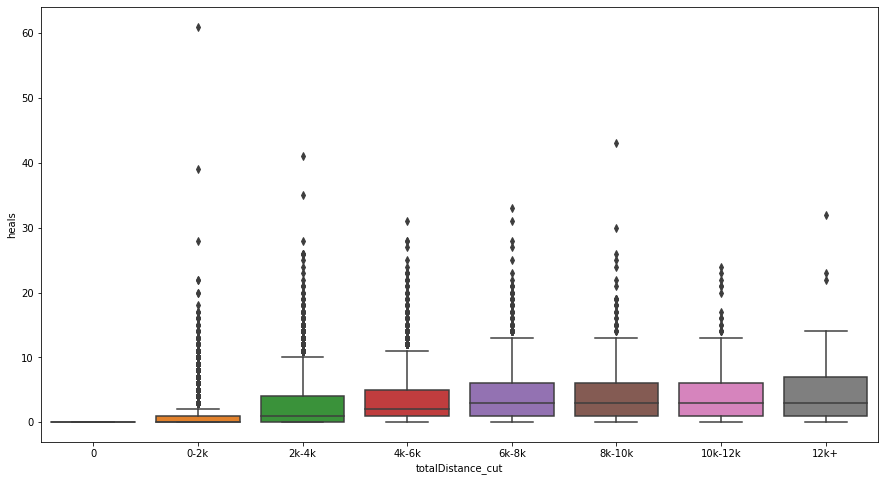

In [113]:
plt.figure(figsize=(15,8))
sns.boxplot(x="totalDistance_cut", y="heals", data=data_cut2)
plt.show()

- totalDistance & boosts

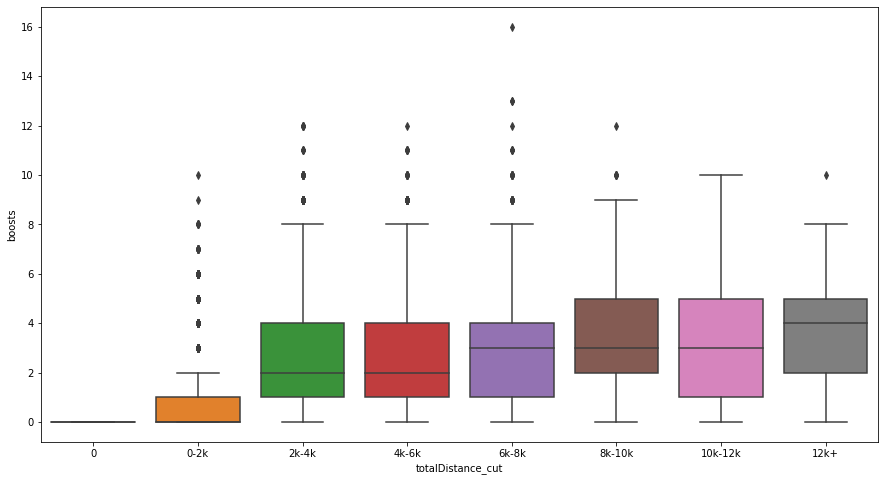

In [114]:
plt.figure(figsize=(15,8))
sns.boxplot(x="totalDistance_cut", y="boosts", data=data_cut2)
plt.show()

- totalDistance & weaponsAcquired

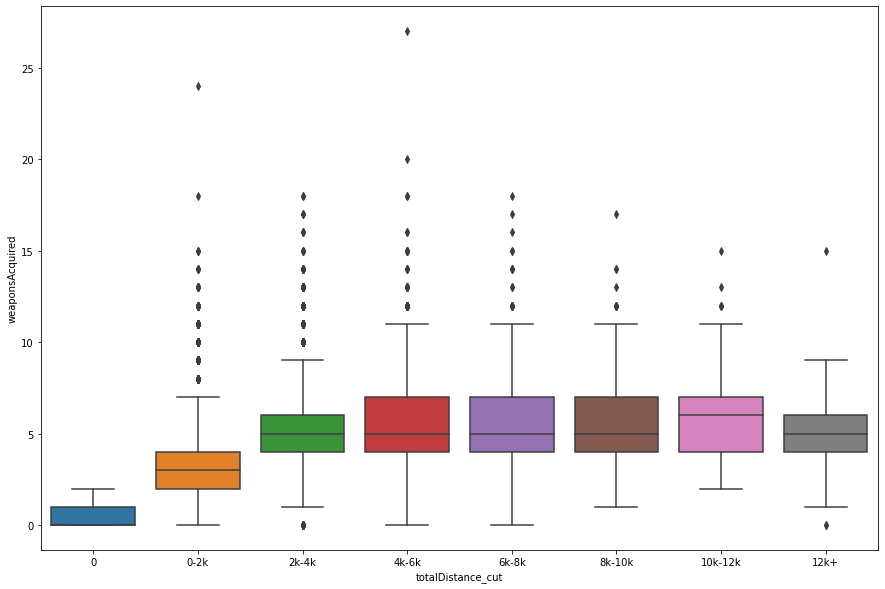

In [115]:
plt.figure(figsize=(15,10))
sns.boxplot(x="totalDistance_cut", y="weaponsAcquired", data=data_cut2)
plt.show()

#### boosts与damageDealt、DBNOs、kills、kill_rate、longestKill、killStreaks、headshotKills、headshot_rate

- boosts & damageDealt

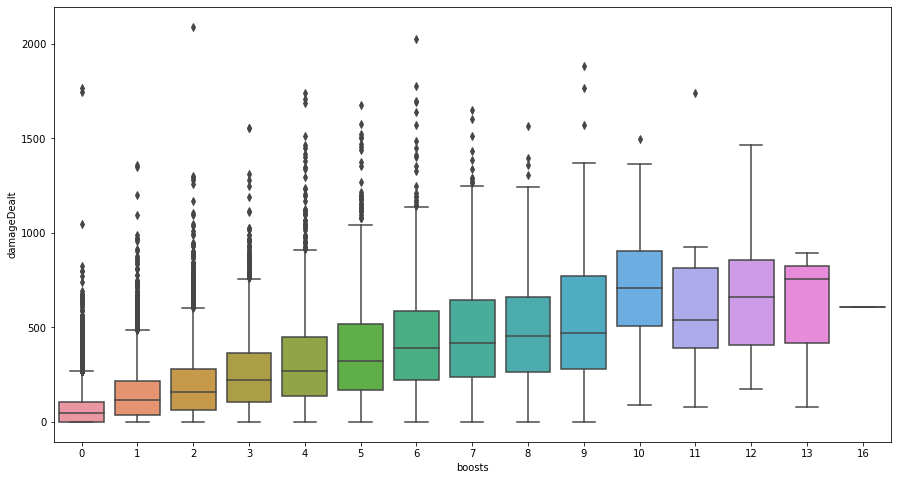

In [116]:
plt.figure(figsize=(15,8))
sns.boxplot(x="boosts", y="damageDealt", data=data2)
plt.show()

- boosts & DBNOs

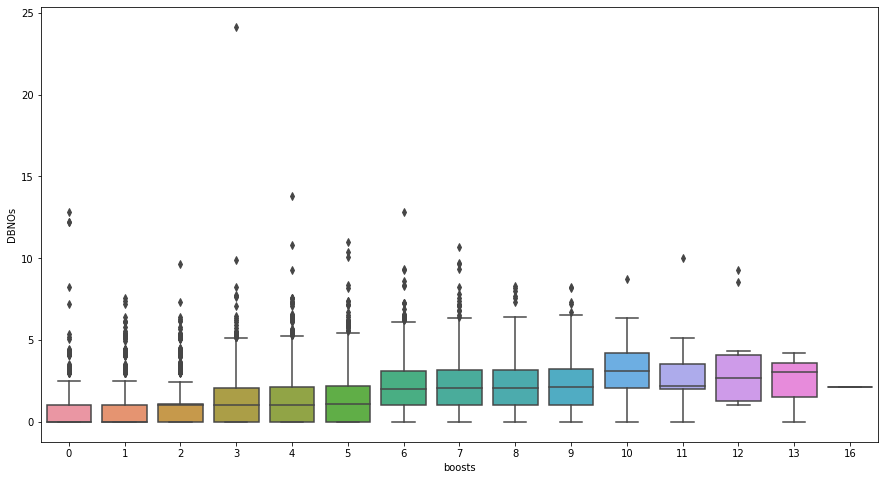

In [117]:
plt.figure(figsize=(15,8))
sns.boxplot(x="boosts", y="DBNOs", data=data2)
plt.show()

- boosts & kills

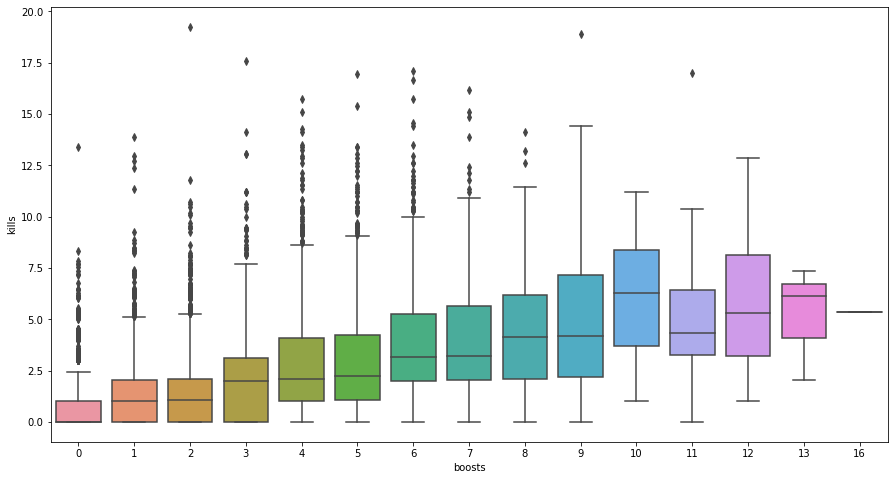

In [118]:
plt.figure(figsize=(15,8))
sns.boxplot(x="boosts", y="kills", data=data2)
plt.show()

- boosts & kill_rate

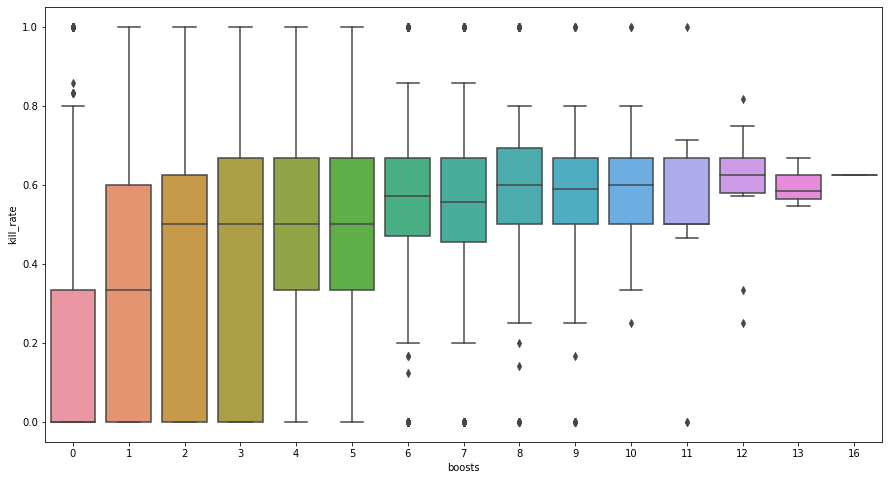

In [119]:
plt.figure(figsize=(15,8))
sns.boxplot(x="boosts", y="kill_rate", data=data2)
plt.show()

- boosts & longestKill

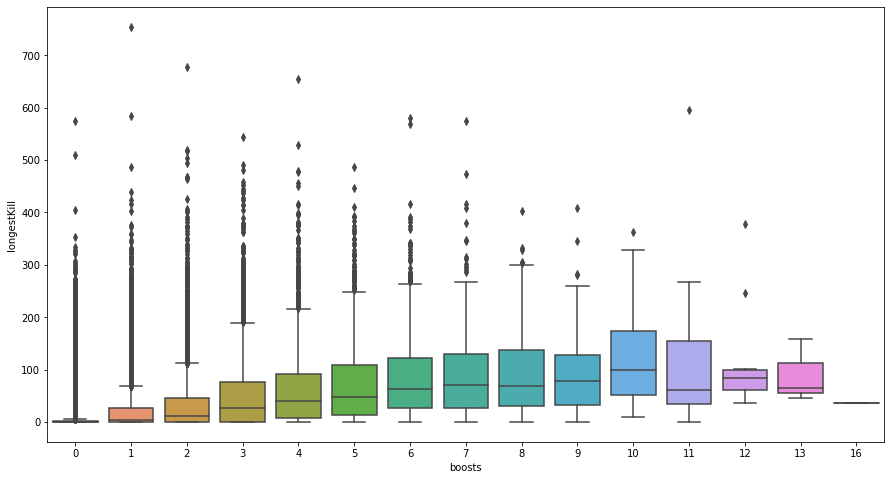

In [120]:
plt.figure(figsize=(15,8))
sns.boxplot(x="boosts", y="longestKill", data=data2)
plt.show()

- boosts & killStreaks

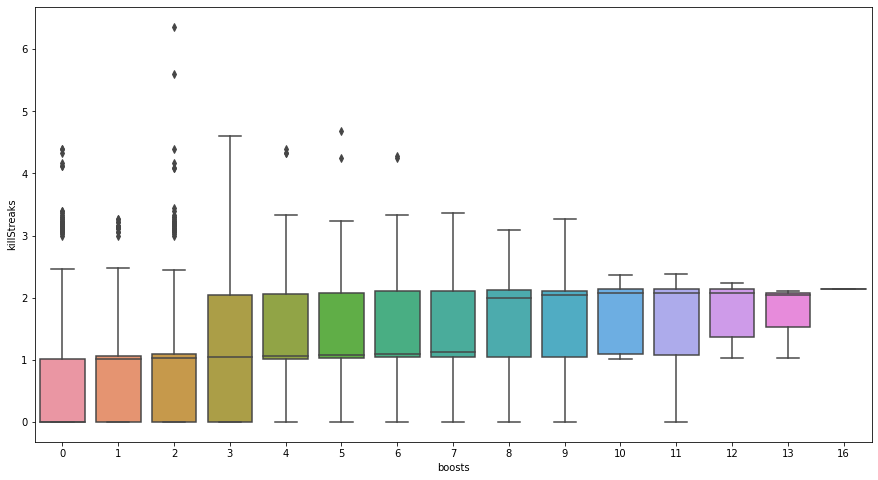

In [121]:
plt.figure(figsize=(15,8))
sns.boxplot(x="boosts", y="killStreaks", data=data2)
plt.show()

- boosts & headshotKills

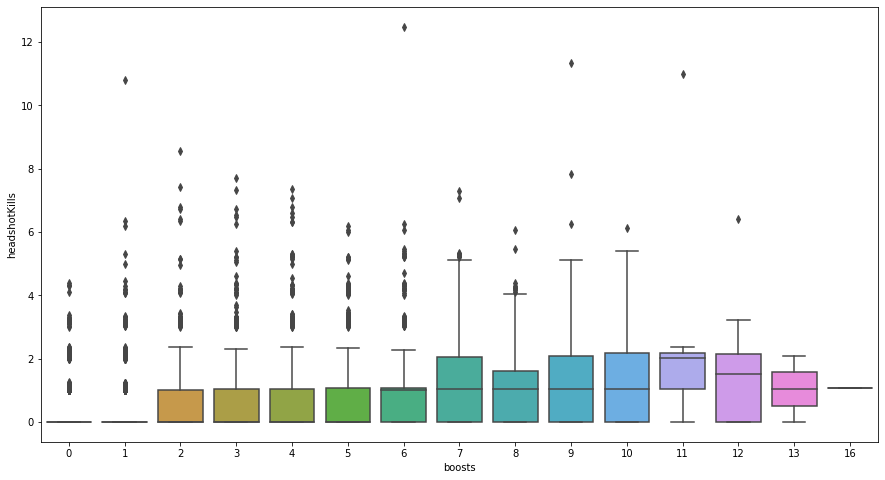

In [122]:
plt.figure(figsize=(15,8))
sns.boxplot(x="boosts", y="headshotKills", data=data2)
plt.show()

- boosts & headshot_rate

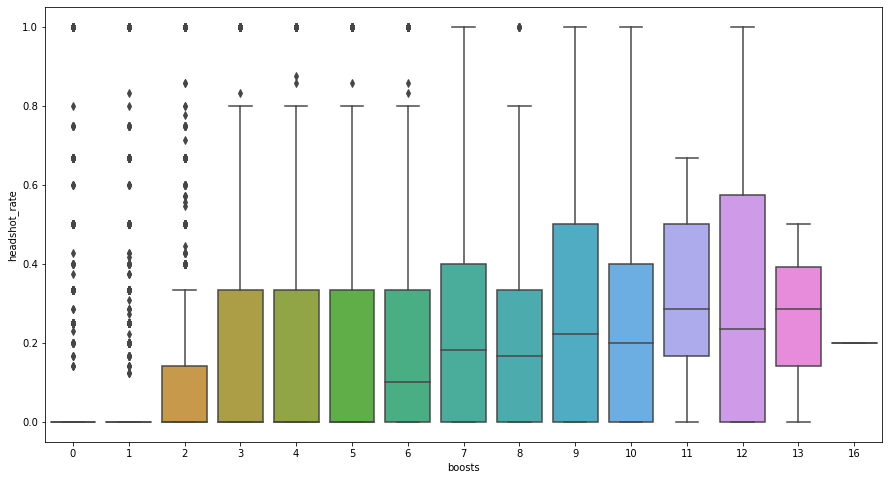

In [123]:
plt.figure(figsize=(15,8))
sns.boxplot(x="boosts", y="headshot_rate", data=data2)
plt.show()

#### weaponsAcquired & damageDealt、DBNOs、kills、kill_rate、longestKill、killStreaks、headshotKills、headshot_rate

- weaponsAcquired & damageDealt

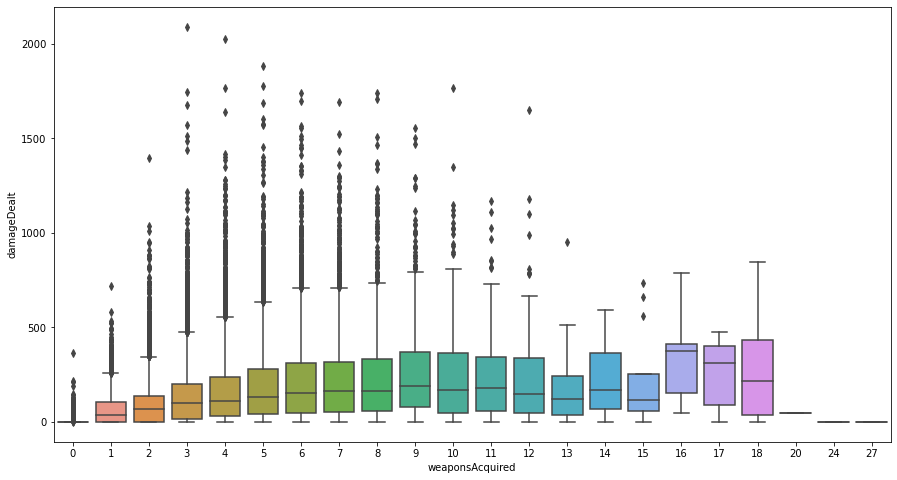

In [124]:
plt.figure(figsize=(15,8))
sns.boxplot(x="weaponsAcquired", y="damageDealt", data=data2)
plt.show()

- weaponsAcquired & DBNOs

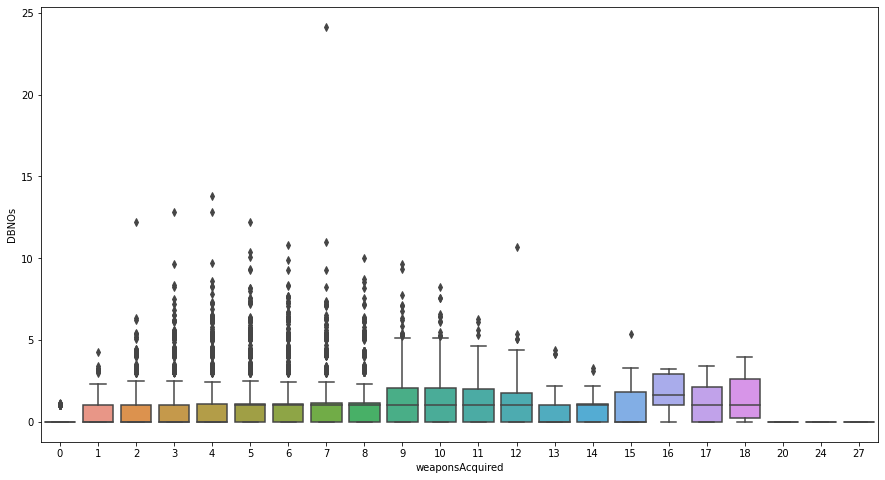

In [125]:
plt.figure(figsize=(15,8))
sns.boxplot(x="weaponsAcquired", y="DBNOs", data=data2)
plt.show()

- weaponsAcquired & kills

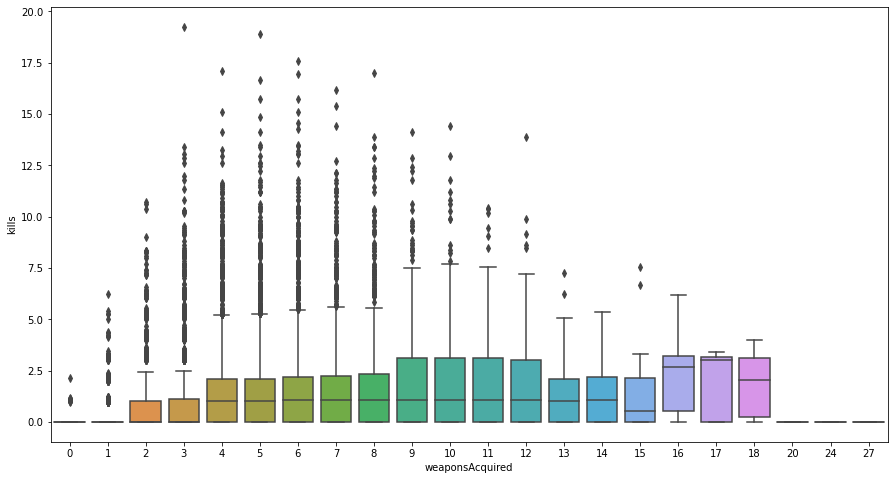

In [126]:
plt.figure(figsize=(15,8))
sns.boxplot(x="weaponsAcquired", y="kills", data=data2)
plt.show()

- weaponsAcquired & kill_rate

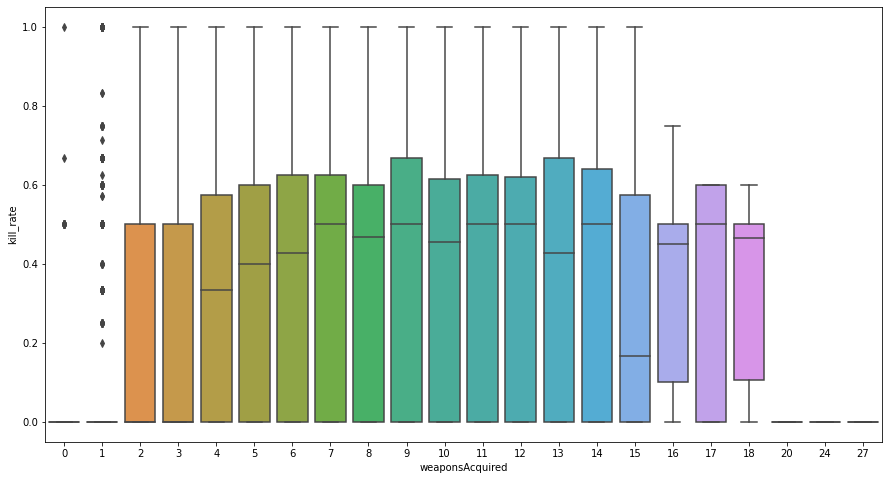

In [127]:
plt.figure(figsize=(15,8))
sns.boxplot(x="weaponsAcquired", y="kill_rate", data=data2)
plt.show()

- weaponsAcquired & headshotKills

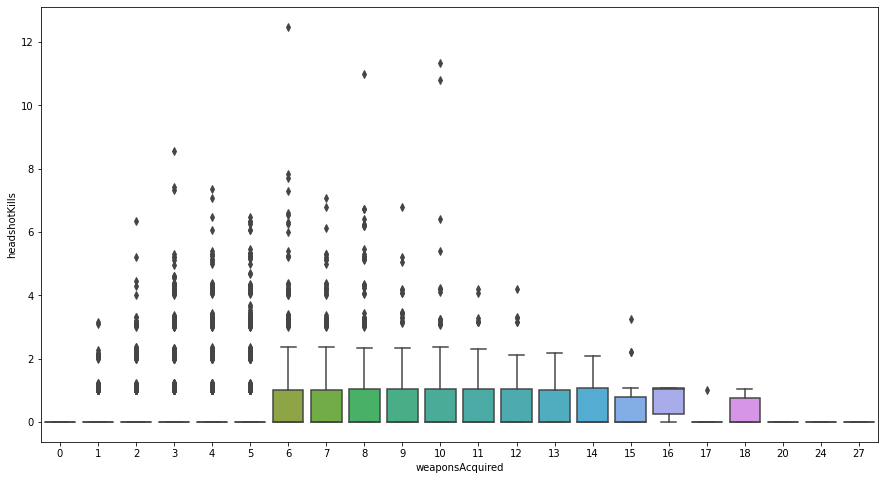

In [128]:
plt.figure(figsize=(15,8))
sns.boxplot(x="weaponsAcquired", y="headshotKills", data=data2)
plt.show()

- weaponsAcquired & headshot_rate

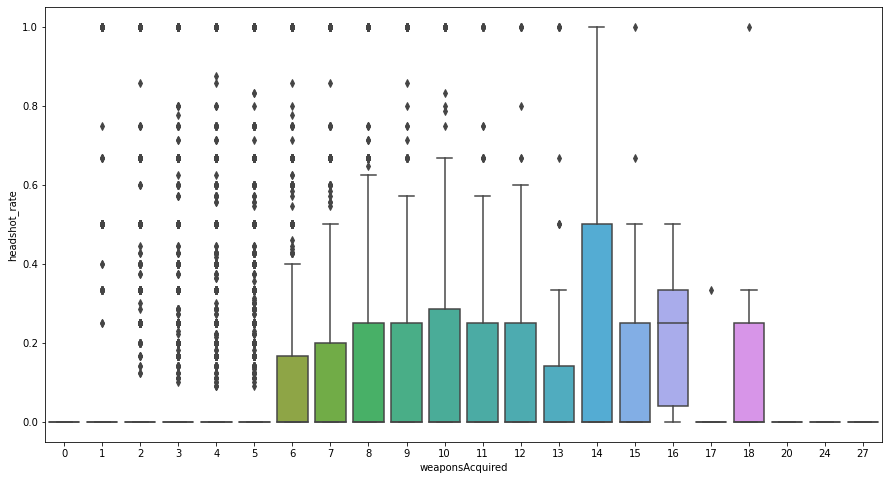

In [129]:
plt.figure(figsize=(15,8))
sns.boxplot(x="weaponsAcquired", y="headshot_rate", data=data2)
plt.show()

- weaponsAcquired & killStreaks

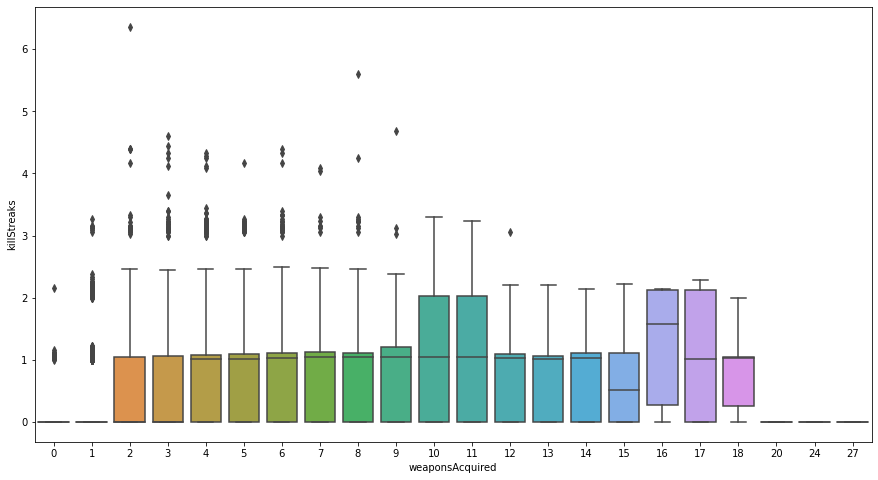

In [130]:
plt.figure(figsize=(15,8))
sns.boxplot(x="weaponsAcquired", y="killStreaks", data=data2)
plt.show()

- weaponsAcquired & longestKill

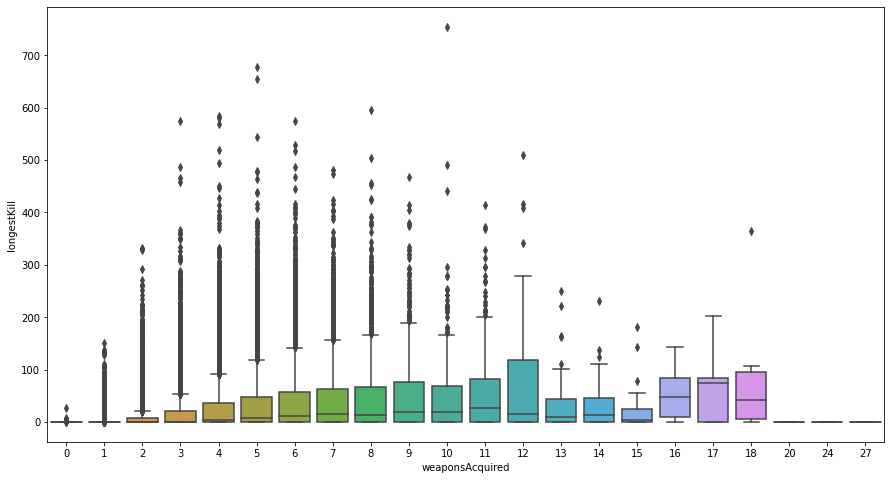

In [131]:
plt.figure(figsize=(15,8))
sns.boxplot(x="weaponsAcquired", y="longestKill", data=data2)
plt.show()

#### 技术性玩家的击杀水平

- longestKill & killPlace

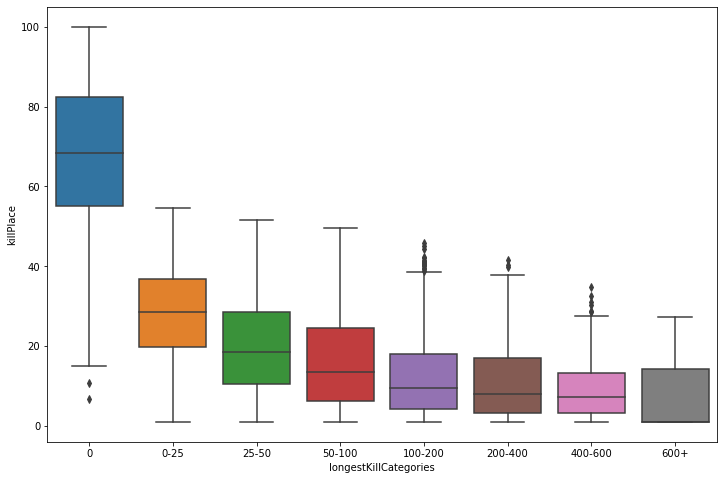

In [132]:
data_cut2['longestKillCategories'] = pd.cut(data_cut2['longestKill'], [-1,0, 25, 50, 100, 200, 400, 600, 1000], labels=['0','0-25','25-50','50-100', '100-200', '200-400','400-600','600+'])
plt.figure(figsize=(12,8))
sns.boxplot(x="longestKillCategories", y="killPlace", data=data_cut2)
plt.show()

- headshotKills & killPlace

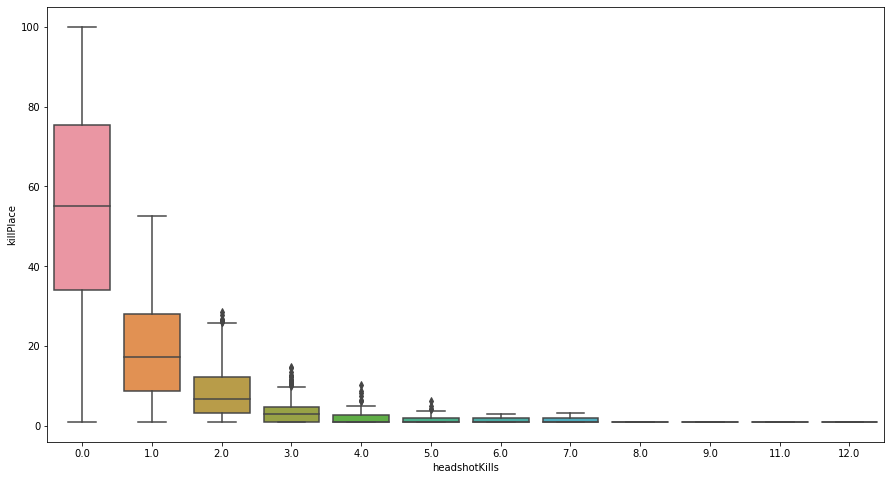

In [133]:
dataCopy = data2
dataCopy['headshotKills']=dataCopy['headshotKills'].round()

plt.figure(figsize=(15,8))
sns.boxplot(x="headshotKills", y="killPlace", data=dataCopy)
plt.show()

- killStreaks & killPlace

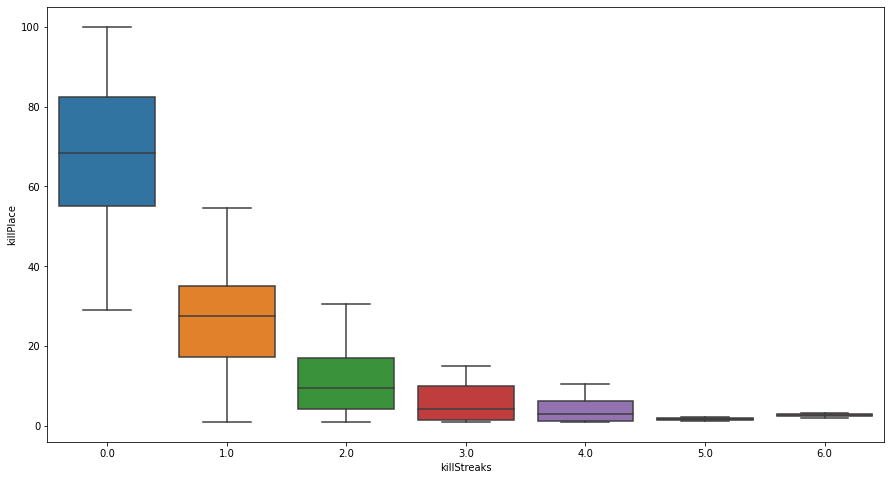

In [134]:
dataCopy['killStreaks']=dataCopy['killStreaks'].round()

plt.figure(figsize=(15,8))
sns.boxplot(x="killStreaks", y="killPlace", data=dataCopy)
plt.show()

#### 吃鸡队伍团队配合情况探究——assists、teamKills、revives

In [135]:
# 筛选出两人队伍的数据，单人玩家不存在团队配合
winner = Two2[Two2['winPlacePerc']==1]

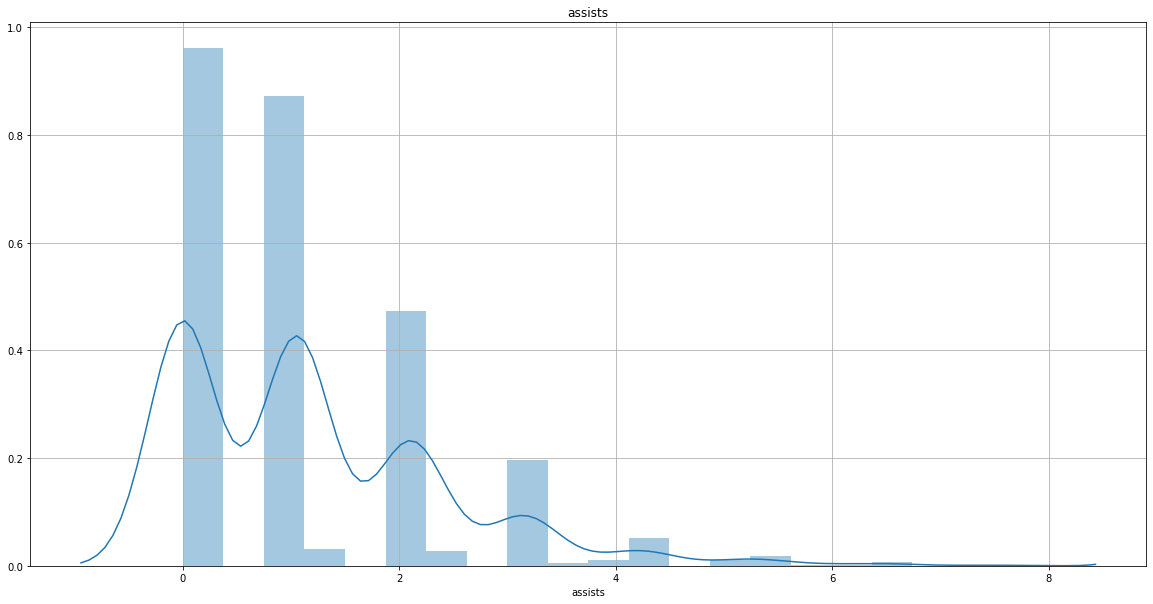

In [136]:
plt.figure(figsize=(20,10))
sns.distplot(winner['assists'])
plt.title('assists')
plt.grid()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


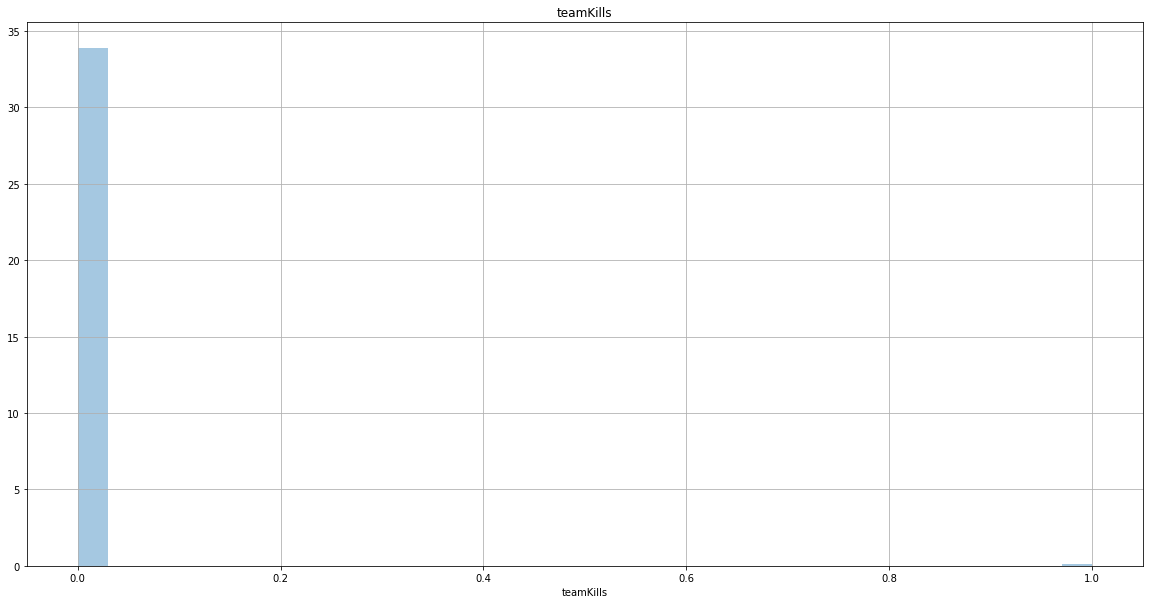

In [137]:
plt.figure(figsize=(20,10))
sns.distplot(winner['teamKills'])
plt.title('teamKills')
plt.grid()
plt.show()

In [138]:
winner['teamKills'].value_counts()

0    1202
1       4
Name: teamKills, dtype: int64

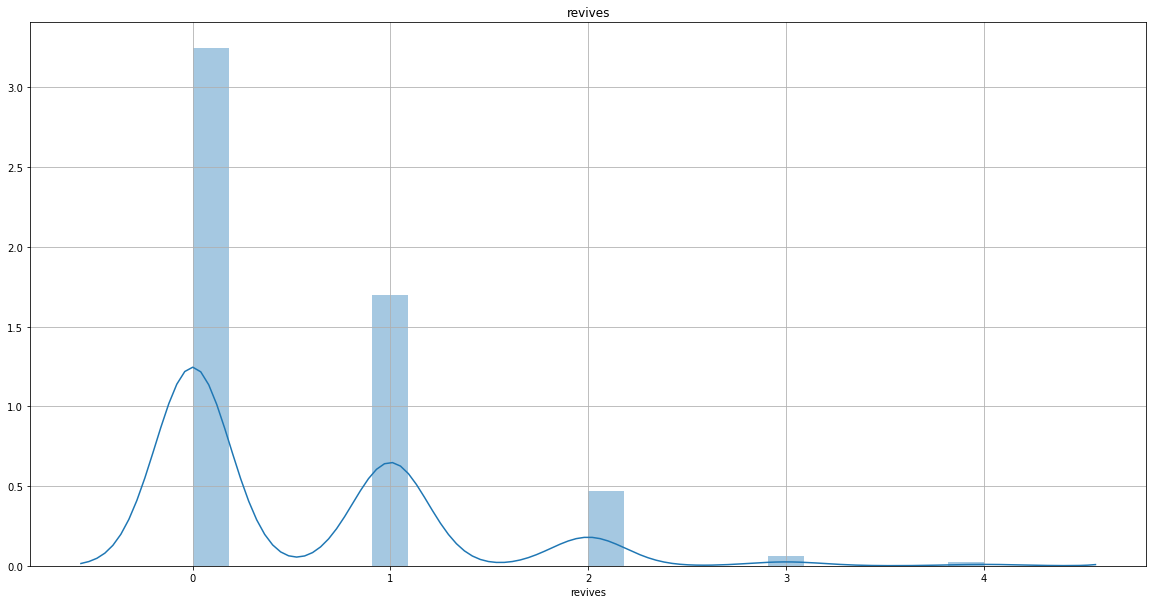

In [139]:
plt.figure(figsize=(20,10))
sns.distplot(winner['revives'])
plt.title('revives')
plt.grid()
plt.show()

#### (3)四排

- 不同队伍人数情况下kills与winPlacePerc之间的关系

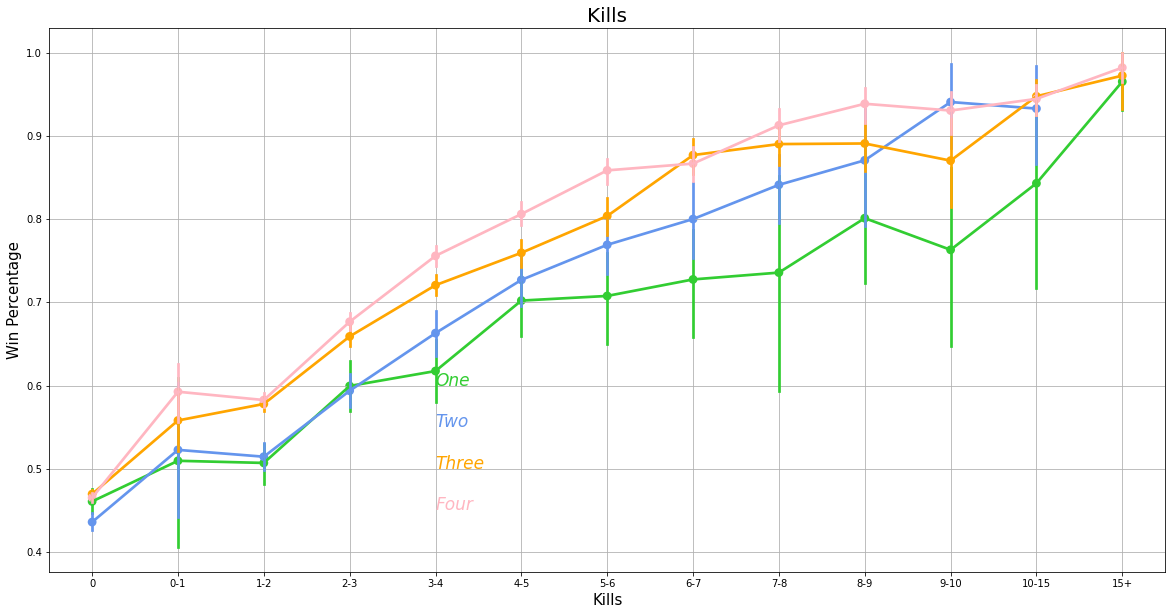

In [140]:
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='kills_cut',y='winPlacePerc',data=One,color='limegreen',alpha=0.8)
sns.pointplot(x='kills_cut',y='winPlacePerc',data=Two,color='cornflowerblue',alpha=0.8)
sns.pointplot(x='kills_cut',y='winPlacePerc',data=Three,color='orange',alpha=0.8)
sns.pointplot(x='kills_cut',y='winPlacePerc',data=Four,color='lightpink',alpha=0.8)

plt.text(4,0.6,'One',color='limegreen',fontsize = 17,style = 'italic')
plt.text(4,0.55,'Two',color='cornflowerblue',fontsize = 17,style = 'italic')
plt.text(4,0.5,'Three',color='orange',fontsize = 17,style = 'italic')
plt.text(4,0.45,'Four',color='lightpink',fontsize = 17,style = 'italic')

plt.xlabel('Kills',fontsize = 15,color='black')
plt.ylabel('Win Percentage',fontsize = 15,color='black')
plt.title('Kills',fontsize = 20,color='black')
plt.grid()
plt.show()

- 不同队伍人数情况躺赢吃鸡的情况对比

In [141]:
print('一人队中击杀伤害输出极低躺赢情况：')
No_kill = One[One['kills'] == 0]
print("{} 玩家 ({:.2f}%) 不用杀一个人就可以赢得比赛".format(len(No_kill[No_kill['winPlacePerc']==1]), 100*len(No_kill[No_kill['winPlacePerc']==1])/len(One)))

No_damage = One[One['damageDealt'] == 0]
print("{} 玩家 ({:.2f}%) 不用伤害任何人就可以躺赢比赛".format(len(No_damage[No_damage['winPlacePerc']==1]), 100*len(No_damage[No_damage['winPlacePerc']==1])/len(One)))

一人队中击杀伤害输出极低躺赢情况：
1 玩家 (0.04%) 不用杀一个人就可以赢得比赛
0 玩家 (0.00%) 不用伤害任何人就可以躺赢比赛


In [142]:
print('两人队中击杀伤害输出极低躺赢情况：')
No_kill=Two[Two['kills'] == 0]
print("{} 玩家 ({:.2f}%) 不用杀一个人就可以赢得比赛".format(len(No_kill[No_kill['winPlacePerc']==1]), 100*len(No_kill[No_kill['winPlacePerc']==1])/len(Two)))

No_damage = Two[Two['damageDealt'] == 0]
print("{} 玩家 ({:.2f}%) 不用伤害任何人就可以躺赢比赛".format(len(No_damage[No_damage['winPlacePerc']==1]), 100*len(No_damage[No_damage['winPlacePerc']==1])/len(Two)))

两人队中击杀伤害输出极低躺赢情况：
6 玩家 (0.12%) 不用杀一个人就可以赢得比赛
0 玩家 (0.00%) 不用伤害任何人就可以躺赢比赛


In [143]:
print('三人队中击杀伤害输出极低躺赢情况：')
No_kill=Three[Three['kills'] == 0]
print("{} 玩家 ({:.2f}%) 不用杀一个人就可以赢得比赛".format(len(No_kill[No_kill['winPlacePerc']==1]), 100*len(No_kill[No_kill['winPlacePerc']==1])/len(Three)))

No_damage = Three[Three['damageDealt'] == 0]
print("{} 玩家 ({:.2f}%) 不用伤害任何人就可以躺赢比赛".format(len(No_damage[No_damage['winPlacePerc']==1]), 100*len(No_damage[No_damage['winPlacePerc']==1])/len(Three)))

三人队中击杀伤害输出极低躺赢情况：
92 玩家 (0.49%) 不用杀一个人就可以赢得比赛
22 玩家 (0.12%) 不用伤害任何人就可以躺赢比赛


In [144]:
print('四人队中击杀伤害输出极低躺赢情况：')
No_kill=Four[Four['kills'] == 0]
print("{} 玩家 ({:.2f}%) 不用杀一个人就可以赢得比赛".format(len(No_kill[No_kill['winPlacePerc']==1]), 100*len(No_kill[No_kill['winPlacePerc']==1])/len(Four)))

No_damage = Four[Four['damageDealt'] == 0]
print("{} 玩家 ({:.2f}%) 不用伤害任何人就可以躺赢比赛".format(len(No_damage[No_damage['winPlacePerc']==1]), 100*len(No_damage[No_damage['winPlacePerc']==1])/len(Four)))

四人队中击杀伤害输出极低躺赢情况：
304 玩家 (1.27%) 不用杀一个人就可以赢得比赛
99 玩家 (0.41%) 不用伤害任何人就可以躺赢比赛


#### 吃鸡队伍团队配合情况探究——assists、teamKills、revives

In [145]:
winner=data3[data3['winPlacePerc']==1]

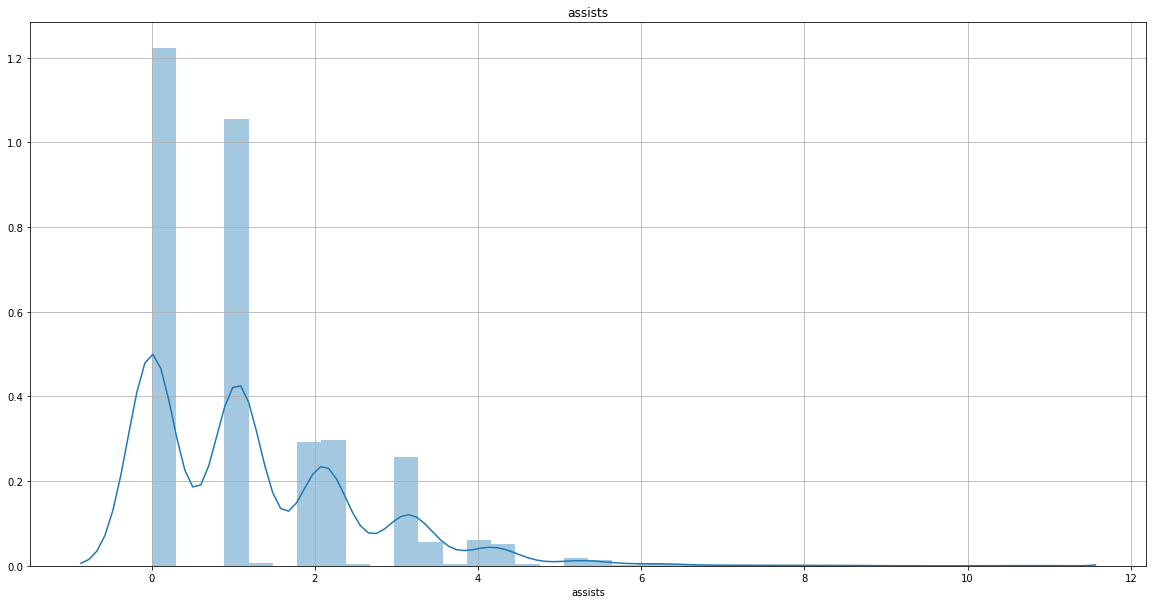

In [146]:
plt.figure(figsize=(20,10))
sns.distplot(winner['assists'])
plt.title('assists')
plt.grid()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


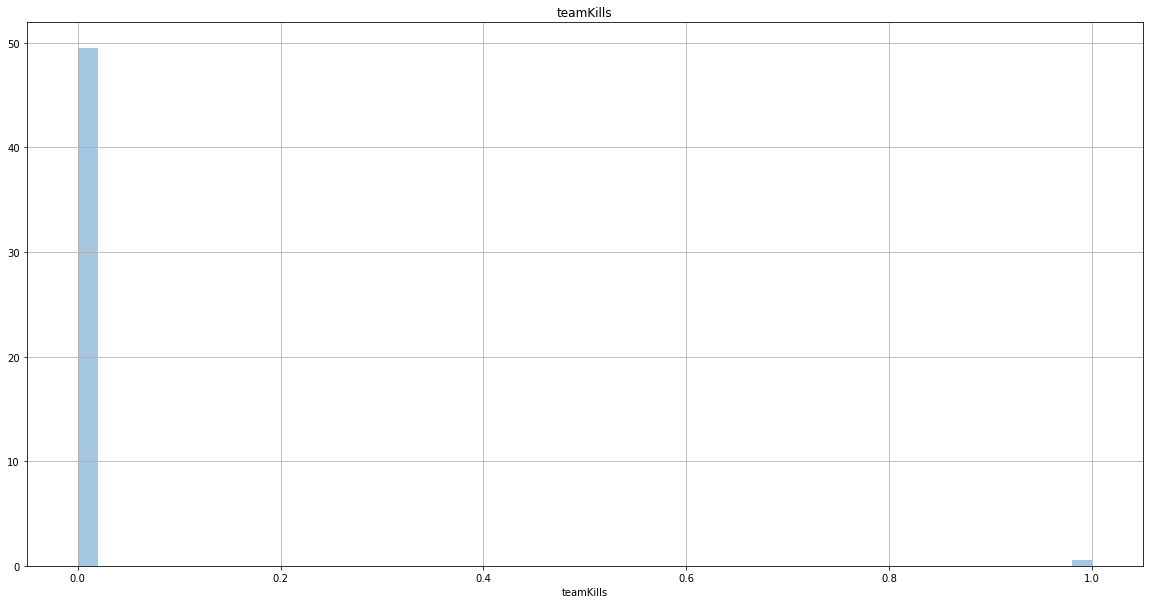

In [147]:
plt.figure(figsize=(20,10))
sns.distplot(winner['teamKills'])
plt.title('teamKills')
plt.grid()
plt.show()

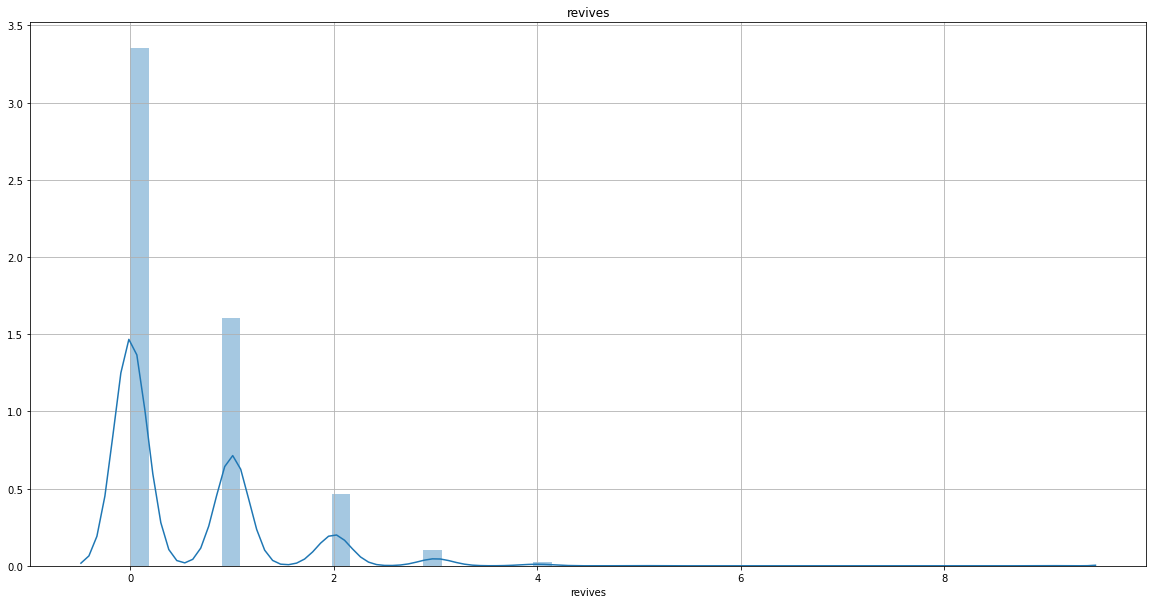

In [148]:
plt.figure(figsize=(20,10))
sns.distplot(winner['revives'])
plt.title('revives')
plt.grid()
plt.show()